# Mosaic & Sedona

> You can combine the usage of Mosaic with other geospatial libraries. In this example we combine the use of [Sedona](https://sedona.apache.org) and Mosaic.

## Setup

This notebook will run if you have both Mosaic and Sedona installed on your cluster.

### Install sedona

To install Sedona, follow the [official Sedona instructions](https://sedona.apache.org/1.5.0/setup/databricks/).

E.g. Add the following maven coorinates to a non-photon cluster [[1](https://docs.databricks.com/en/libraries/package-repositories.html)]. This is showing DBR 12.2 LTS.  

```
org.apache.sedona:sedona-spark-shaded-3.0_2.12:1.5.0
org.datasyslab:geotools-wrapper:1.5.0-28.2
```

__Note:__ See instructions for `SedonaContext.create(spark)` [[1](https://sedona.apache.org/1.5.0/tutorial/sql/?h=sedonacontext#initiate-sedonacontext)]. Also, notice we are downgrading pandas from default DBR version for Sedona. 

--- 
 __Last Update__ 28 NOV 2023 [Mosaic 0.3.12]

In [0]:
%pip install "pandas<=1.3.5" "shapely<= 1.8.4" "geopandas<=0.10.2" keplergl==0.3.2 pydeck==0.8.0 --quiet # <- Sedona 1.5 dep versions
%pip install "apache-sedona<1.6,>=1.5" --quiet                                                           # <- Sedona 1.5 series
%pip install "databricks-mosaic<0.4,>=0.3" --quiet                                                       # <- Mosaic 0.3 series [install last]

Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.


_Verify our Sedona dependency versions_

In [0]:
import pandas as pd
import shapely
import geopandas as gpd
import keplergl

print(f"pandas version? {pd.__version__}")
print(f"geopandas version? {gpd.__version__}")
print(f"shapely version? {shapely.__version__}")
print(f"kepler version? {keplergl.__version__}")

pandas version? 1.3.5
geopandas version? 0.10.2
shapely version? 1.8.4
kepler version? 0.3.2


_Main imports_

In [0]:
import pyspark.sql.functions as F

# -- setup mosaic
import mosaic as mos

mos.enable_mosaic(spark, dbutils)

# -- setup sedona
from sedona.spark import *

sedona = SedonaContext.create(spark)

# --other imports
import warnings

warnings.simplefilter("ignore")

_Setup simple DataFrame_

> Showing blending Mosaic calls (namespaced as `mos.`) with Sedona (sql) calls.

In [0]:
df = spark.createDataFrame([{'wkt': 'POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))'}])
(df
   # Mosaic
   .withColumn("mosaic_area", mos.st_area('wkt'))
   # Sedona
   .withColumn("sedona_area", F.expr("ST_Area(ST_GeomFromWKT(wkt))"))
   # Sedona function not available in Mosaic
   .withColumn("sedona_flipped", F.expr("ST_FlipCoordinates(ST_GeomFromWKT(wkt))"))
).show()

+--------------------+-----------+-----------+--------------------+
|                 wkt|mosaic_area|sedona_area|      sedona_flipped|
+--------------------+-----------+-----------+--------------------+
|POLYGON ((30 10, ...|      550.0|      550.0|POLYGON ((10 30, ...|
+--------------------+-----------+-----------+--------------------+



## Mosaic + Kepler

> Mosaic has the ability to render tables / views + dataframes with `%%mosaic_kepler` magic [[1](https://databrickslabs.github.io/mosaic/usage/kepler.html)].


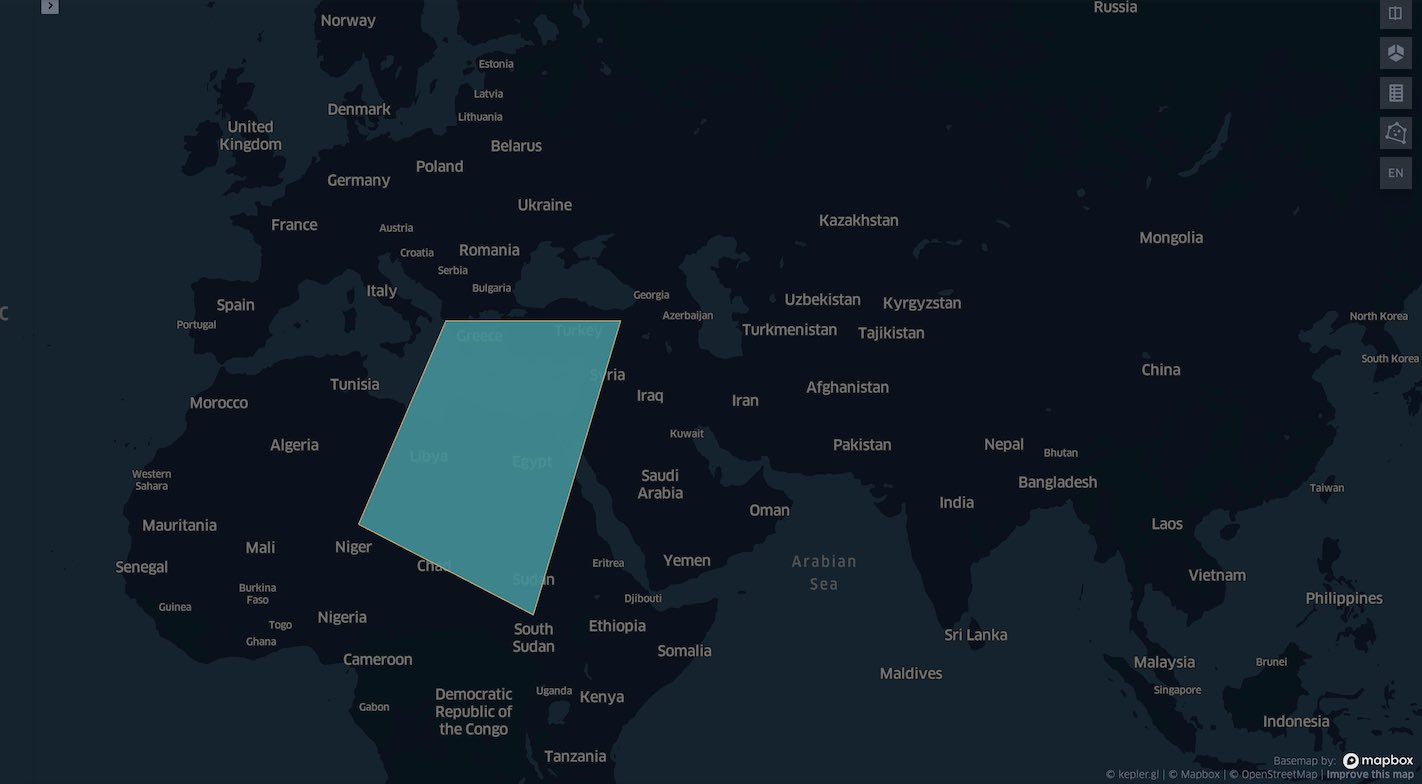

In [0]:
displayHTML("""<img src='data:image/jpeg;base64,/9j/4AAQSkZJRgABAgEASABIAAD/4QDoRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAAAAAACQAAAAAQAAAJAAAAABAAiQAAAHAAAABDAyMjGRAQAHAAAABAECAwCShgAHAAAAEgAAAMygAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAACxygAwAEAAAAAQAABiCkBgADAAAAAQAAAAAAAAAAQVNDSUkAAABTY3JlZW5zaG90AAD/4g0gSUNDX1BST0ZJTEUAAQEAAA0QYXBwbAIQAABtbnRyUkdCIFhZWiAH5wALABYACgARACNhY3NwQVBQTAAAAABBUFBMAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWFwcGwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFkZXNjAAABUAAAAGJkc2NtAAABtAAAAepjcHJ0AAADoAAAACN3dHB0AAADxAAAABRyWFlaAAAD2AAAABRnWFlaAAAD7AAAABRiWFlaAAAEAAAAABRyVFJDAAAEFAAACAxhYXJnAAAMIAAAACB2Y2d0AAAMQAAAADBuZGluAAAMcAAAAD5tbW9kAAAMsAAAACh2Y2dwAAAM2AAAADhiVFJDAAAEFAAACAxnVFJDAAAEFAAACAxhYWJnAAAMIAAAACBhYWdnAAAMIAAAACBkZXNjAAAAAAAAAAhEaXNwbGF5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbWx1YwAAAAAAAAAmAAAADGhySFIAAAASAAAB2GtvS1IAAAASAAAB2G5iTk8AAAASAAAB2GlkAAAAAAASAAAB2Gh1SFUAAAASAAAB2GNzQ1oAAAASAAAB2GRhREsAAAASAAAB2G5sTkwAAAASAAAB2GZpRkkAAAASAAAB2Gl0SVQAAAASAAAB2GVzRVMAAAASAAAB2HJvUk8AAAASAAAB2GZyQ0EAAAASAAAB2GFyAAAAAAASAAAB2HVrVUEAAAASAAAB2GhlSUwAAAASAAAB2HpoVFcAAAASAAAB2HZpVk4AAAASAAAB2HNrU0sAAAASAAAB2HpoQ04AAAASAAAB2HJ1UlUAAAASAAAB2GVuR0IAAAASAAAB2GZyRlIAAAASAAAB2G1zAAAAAAASAAAB2GhpSU4AAAASAAAB2HRoVEgAAAASAAAB2GNhRVMAAAASAAAB2GVuQVUAAAASAAAB2GVzWEwAAAASAAAB2GRlREUAAAASAAAB2GVuVVMAAAASAAAB2HB0QlIAAAASAAAB2HBsUEwAAAASAAAB2GVsR1IAAAASAAAB2HN2U0UAAAASAAAB2HRyVFIAAAASAAAB2HB0UFQAAAASAAAB2GphSlAAAAASAAAB2ABDAG8AbABvAHIAIABMAEMARAAAdGV4dAAAAABDb3B5cmlnaHQgQXBwbGUgSW5jLiwgMjAyMwAAWFlaIAAAAAAAAPMWAAEAAAABFspYWVogAAAAAAAAgwoAAD1u////vFhZWiAAAAAAAABL+gAAtCEAAArgWFlaIAAAAAAAACfSAAAOcAAAyJFjdXJ2AAAAAAAABAAAAAAFAAoADwAUABkAHgAjACgALQAyADYAOwBAAEUASgBPAFQAWQBeAGMAaABtAHIAdwB8AIEAhgCLAJAAlQCaAJ8AowCoAK0AsgC3ALwAwQDGAMsA0ADVANsA4ADlAOsA8AD2APsBAQEHAQ0BEwEZAR8BJQErATIBOAE+AUUBTAFSAVkBYAFnAW4BdQF8AYMBiwGSAZoBoQGpAbEBuQHBAckB0QHZAeEB6QHyAfoCAwIMAhQCHQImAi8COAJBAksCVAJdAmcCcQJ6AoQCjgKYAqICrAK2AsECywLVAuAC6wL1AwADCwMWAyEDLQM4A0MDTwNaA2YDcgN+A4oDlgOiA64DugPHA9MD4APsA/kEBgQTBCAELQQ7BEgEVQRjBHEEfgSMBJoEqAS2BMQE0wThBPAE/gUNBRwFKwU6BUkFWAVnBXcFhgWWBaYFtQXFBdUF5QX2BgYGFgYnBjcGSAZZBmoGewaMBp0GrwbABtEG4wb1BwcHGQcrBz0HTwdhB3QHhgeZB6wHvwfSB+UH+AgLCB8IMghGCFoIbgiCCJYIqgi+CNII5wj7CRAJJQk6CU8JZAl5CY8JpAm6Cc8J5Qn7ChEKJwo9ClQKagqBCpgKrgrFCtwK8wsLCyILOQtRC2kLgAuYC7ALyAvhC/kMEgwqDEMMXAx1DI4MpwzADNkM8w0NDSYNQA1aDXQNjg2pDcMN3g34DhMOLg5JDmQOfw6bDrYO0g7uDwkPJQ9BD14Peg+WD7MPzw/sEAkQJhBDEGEQfhCbELkQ1xD1ERMRMRFPEW0RjBGqEckR6BIHEiYSRRJkEoQSoxLDEuMTAxMjE0MTYxODE6QTxRPlFAYUJxRJFGoUixStFM4U8BUSFTQVVhV4FZsVvRXgFgMWJhZJFmwWjxayFtYW+hcdF0EXZReJF64X0hf3GBsYQBhlGIoYrxjVGPoZIBlFGWsZkRm3Gd0aBBoqGlEadxqeGsUa7BsUGzsbYxuKG7Ib2hwCHCocUhx7HKMczBz1HR4dRx1wHZkdwx3sHhYeQB5qHpQevh7pHxMfPh9pH5Qfvx/qIBUgQSBsIJggxCDwIRwhSCF1IaEhziH7IiciVSKCIq8i3SMKIzgjZiOUI8Ij8CQfJE0kfCSrJNolCSU4JWgllyXHJfcmJyZXJocmtyboJxgnSSd6J6sn3CgNKD8ocSiiKNQpBik4KWspnSnQKgIqNSpoKpsqzysCKzYraSudK9EsBSw5LG4soizXLQwtQS12Last4S4WLkwugi63Lu4vJC9aL5Evxy/+MDUwbDCkMNsxEjFKMYIxujHyMioyYzKbMtQzDTNGM38zuDPxNCs0ZTSeNNg1EzVNNYc1wjX9Njc2cjauNuk3JDdgN5w31zgUOFA4jDjIOQU5Qjl/Obw5+To2OnQ6sjrvOy07azuqO+g8JzxlPKQ84z0iPWE9oT3gPiA+YD6gPuA/IT9hP6I/4kAjQGRApkDnQSlBakGsQe5CMEJyQrVC90M6Q31DwEQDREdEikTORRJFVUWaRd5GIkZnRqtG8Ec1R3tHwEgFSEtIkUjXSR1JY0mpSfBKN0p9SsRLDEtTS5pL4kwqTHJMuk0CTUpNk03cTiVObk63TwBPSU+TT91QJ1BxULtRBlFQUZtR5lIxUnxSx1MTU19TqlP2VEJUj1TbVShVdVXCVg9WXFapVvdXRFeSV+BYL1h9WMtZGllpWbhaB1pWWqZa9VtFW5Vb5Vw1XIZc1l0nXXhdyV4aXmxevV8PX2Ffs2AFYFdgqmD8YU9homH1YklinGLwY0Njl2PrZEBklGTpZT1lkmXnZj1mkmboZz1nk2fpaD9olmjsaUNpmmnxakhqn2r3a09rp2v/bFdsr20IbWBtuW4SbmtuxG8eb3hv0XArcIZw4HE6cZVx8HJLcqZzAXNdc7h0FHRwdMx1KHWFdeF2Pnabdvh3VnezeBF4bnjMeSp5iXnnekZ6pXsEe2N7wnwhfIF84X1BfaF+AX5ifsJ/I3+Ef+WAR4CogQqBa4HNgjCCkoL0g1eDuoQdhICE44VHhauGDoZyhteHO4efiASIaYjOiTOJmYn+imSKyoswi5aL/IxjjMqNMY2Yjf+OZo7OjzaPnpAGkG6Q1pE/kaiSEZJ6kuOTTZO2lCCUipT0lV+VyZY0lp+XCpd1l+CYTJi4mSSZkJn8mmia1ZtCm6+cHJyJnPedZJ3SnkCerp8dn4uf+qBpoNihR6G2oiailqMGo3aj5qRWpMelOKWpphqmi6b9p26n4KhSqMSpN6mpqhyqj6sCq3Wr6axcrNCtRK24ri2uoa8Wr4uwALB1sOqxYLHWskuywrM4s660JbSctRO1irYBtnm28Ldot+C4WbjRuUq5wro7urW7LrunvCG8m70VvY++Cr6Evv+/er/1wHDA7MFnwePCX8Lbw1jD1MRRxM7FS8XIxkbGw8dBx7/IPci8yTrJuco4yrfLNsu2zDXMtc01zbXONs62zzfPuNA50LrRPNG+0j/SwdNE08bUSdTL1U7V0dZV1tjXXNfg2GTY6Nls2fHadtr724DcBdyK3RDdlt4c3qLfKd+v4DbgveFE4cziU+Lb42Pj6+Rz5PzlhOYN5pbnH+ep6DLovOlG6dDqW+rl63Dr++yG7RHtnO4o7rTvQO/M8Fjw5fFy8f/yjPMZ86f0NPTC9VD13vZt9vv3ivgZ+Kj5OPnH+lf65/t3/Af8mP0p/br+S/7c/23//3BhcmEAAAAAAAMAAAACZmYAAPKnAAANWQAAE9AAAApbdmNndAAAAAAAAAABAAEAAAAAAAAAAQAAAAEAAAAAAAAAAQAAAAEAAAAAAAAAAQAAbmRpbgAAAAAAAAA2AACuAAAAUgAAAEPAAACwwAAAJoAAAA2AAABQAAAAVEAAAjMzAAIzMwACMzMAAAAAAAAAAG1tb2QAAAAAAAAGEAAAoEQAAAAA2ZNdgAAAAAAAAAAAAAAAAAAAAAB2Y2dwAAAAAAADAAAAAmZmAAMAAAACZmYAAwAAAAJmZgAAAAIzMzQAAAAAAjMzNAAAAAACMzM0AP/AABEIAxAFjgMBIgACEQEDEQH/xAAfAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgv/xAC1EAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGRoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T19vf4+fr/xAAfAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgv/xAC1EQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2wBDAAQEBAQEBAcEBAcJBwcHCQ0JCQkJDRANDQ0NDRATEBAQEBAQExMTExMTExMXFxcXFxcbGxsbGx4eHh4eHh4eHh7/2wBDAQUFBQgHCA0HBw0gFRIVICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICD/3QAEAFn/2gAMAwEAAhEDEQA/APkDNGaSiu04hc0ZpKKAFU8/jX0B4TjVvDOnMR1tk/lXz8vB/GvYfDvi7QLDQrKyupyksMKo67HOCBzyBihFRNzRr+a71C+0+QrcR2smFuYxhcsSfKYdN6DgkZHrg8V5p49ATxK6j/n3h/m9ehxeM/CcCeXDOEXJOFicDJOScBe55NeX+LtSs9W1xr2xcvEYY0DEFeV3Z4PPcUFSZzeaM0lFBmLmjNJRQAuaM0lFAC5ozSUUALmjNJRQAuaM0lFAC5ozSUUALmjNJRQAuaQkgZxmiigCjC9zJKQ5Kgc4x+lX80lFA2xc0ZpKKBC5ozSUUALmjNJRQAuaM0lFAC5ozSUUALmopphCm4jNSVl3qsJdx6EcUio6srM7ucscmm5NTy2l1Bbx3U0bJFNkxuR8rY64PtRc2tzZuIrqNomKhwGGDtPQ/Q1N0a2IMmjJpOvSimAuTRk0lH9KAFyaMmkooAXJoyaSigBcmjJpKKAFye1b4JxzWHCpaVcDODnFblNGcxc0ZpKKZAuaxbggTMF45rZrKvECy7h/EM0mXHcq5NGTSUUjQXJoyaSigQuTRk0lFAxcmjJpKKAFyaXcabT0ikkzsUnFBL7CbjRuNIQVOGGD70lIgduNSwJ5sgQnAwTUFW7MqJueuOKEO5LbxtGzuT9zIIqhuOK3sAEnHXrWNPH5UpXt1H0ptBe5Fk0u402ikIduNJuNJRQA7caNxptFAC7jRk0lFBSdhcml3Gm0UBuO3GjcabRQSO3GjcabRQA7caNxptFADtxo3Gm0UAO3GjcabRQA7caNxptFADtxo3Gm0UAO3GjcabRQA7caNxptFADtxo3Gm0UAO3GkyaSigadhcml3Gm0UynqhcmjJpKKBpi5NGTSUUDFyaMmkooAXJoyaSigBcmjJpKKBXFyaMmkopCchcmjJpKKZQuTRk0lFAC5NGTSUUALuNLuNNopMzluO3GjcabRQIduNG402igB240bjTaKAHbjRuNNooA3PDkUVzr9jb3Ch45J1V1bkEHqCK7zXNLt4NL1SfUdNtrDyGxYyxYVpTuOBhWOQVAJzj6cV5xpF8umapbaiylxbyCTaDjOO2a2G8QxTWmp2F1CXhvpTcRYPMMpJO4eoxgEd/wAazknfQ0g0lqab+FrVfEc+iCaQpFaNch8LuJCq2DxjHOKW+8L2Flb2u6W6Z7kQ7bgIhtMykAjcPmG3Pc80+XxlZO0uox2JXUpbY2xm8zMYBAUsE9cAf41Si8R6TaaVLpllZzhLlUSZJZy0e0HLbB1Ut0z2qfeL902o/DtppviWx0+BrxJWuCnmXEUZjZQjHfGQCDyOh+tUdG8OWesTOkwv97XEkRlhjQwphiAWLcnPcL09qWHxjY2Rs4rC1n8i1uTclZ5vMbOwoFQnO1ec1DZeLbOCG2FzaSSSWdxJPCUlKIfMfeQ6jqR29e9FpBeJx95C9pdzWjHJhkeMkd9jFc/jiq+41Zv7kXl9PdqNomleTB7b2LY/DNVK1Rg9x240bjTaKYDtxo3Gm0UAO3GjcabRQA7caNxptFADtxo3Gm0UAO3GjcabRQA7caNxptFADtxo3Gm0UAO3GjcabRQA7caNxptFADtxo3Gm0UAO3GjcabRQA7caNxptFADtxo3Gm0hoHbsdFoRz52f9n+tdLFBNO2yBGkYDOEBJx9BXNaD/AMtv+A/1rutId447942KsLKQgqSCOV6Ec0FrYqnSdTCLIbabaxIHyNnjrxjI/GqTxvE5jkUqynBVhgj6it+5u7waNZuJpQxlnBIdsnBXGTnnFVvEH/Ibu/8AroP/AEFaLAcNrpx5OP8Aa/pWBuNb+vf8sf8AgX9K56kRLc//0Pj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAPeiiigAooooAKKKKACikZgo3NwBS0AFFFFABRRRQAVm3rZdUHYZP41pVkXeBOcccCkyo7np8clje+F9J8OajtjW+glMM5/5Zzq+Ez7Nuwfy71e1a1htNQ1HUbiCOe40/TLYxpKN6BiWUsR3xivJJ766ubeC1mctHbKyxLwNoY5IGOeT61op4k1yO+/tFbp/P8sRFyFO5F6KwIwR9RmsHTZ0cyPRrO20u8t7fW7yzg3zaddSywooVHMTptcDnGRxkdjWXosdv4rty01vbwy299BI4gQIPIK4K454yprjZ/Emt3M73M1wzO8LQHhQBG3VQAMAHHbn3qnp+q6hpZlNhM0XnJskwB8y+nIPr25p8jDmPQ9YsbEafdazZQRhNU+xpaJgAIZCd+3+6cVavobQaXqdvOLGS70pI5AtvbtEI3BztLE4dWHB/GvM5dV1Ceyg06WZjBbNuhTgBDyMgjnv3NX7rxTr97bva3V20kcieW6lU+Yf7WFBJ980vZsOZHZXNjp1s974rhhQ2c1ir20bKNgnmOzbjtsZc+2a8t6cdcdzXS6nr0VzpMGiafC8FtFIZmDvvZnb8BhRkkD1rmquCtuKTCiiirIsFFFFAN2Llj/rj/u1qVk2bbZwD/EMVrU0Zy3CiiimSFZd6wMgUdh/OtSsSYlpnJ9TSZcNyKiiikaBRRRQAUUUUATxJDINrsVb17VBRRQS3YkiQySBB+P0rbVVUbVGAKwlZkYMvBFbUT+ZGr9MimiGV7m2aU+YnXGCPWsxlKnawwfet+ql5Hvi3jqvP4UNAn0MqiiipAvWk7bxExyD0z2qe9AMOT1BGKzYn8tw+M47U6WZ5my3TsPSncb3uRUUUUhBRRRQxy3CiiigQUUUUAFFFFABRRRQFwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiiixSiFFFFOw+UKKKKBpBRRRQFgooooGFFFFAgooooC4UUUUAFFFFAJBRRRQDdgooooC9wooopXIuwooooG0FFFFBIUUUUBYKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKB36BRRRQIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoNFFAHQ6D/AMtv+A/1rrrG9axeRhGkqyxmJ0kBIKnBPQj0rhNMvobLzPNDHdjG32zWp/btn/df8h/jSLT0O5fW4Hto7c6fbYjZmAO7b82OgzweOeayb26e+u5LyUBWlbcQvQcAcflXOf27Z/3ZPyH+NH9u2f8Adf8AIf407juiDXv+WP8AwL+lc8K1NTvob3y/KDDbnO73xWXSIe5//9H4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAKfmB7rZkkAdOwIq5TPLTf5mPmxjNPoGwooooEFFFFABWZfY8wEddvNadV7mUxJlepOBkUio7mPRSk5JJ70lI1CiiigAooooAKKKKBMKKKKACiiigYVZguXjbDklf5VWooE1c3UdZFDr0NMkuI4mCv1PpVOxfDNH68irkkEUvLDn1HWmZtWepNVGe0DAvHncTnB6VepMDrTEnYwKK1prVZTvBwcY9qqJZzMfmwopWNFJFSnKjtyqk/StJbKJSCSTjsehq504FFhOfYyI7SWQbuFHvVsWUQHzEk/lVyiixLkystpCpzgn61mzRtG53DAJOK26rTTxIo3APnsMGhoE2ZFaFlKc+SenUVHPLBKnygqw6cfpVeF/LkD9h1pFW0Nyqd5IyKEXo2QapXEwmfcucAcVEzM5yxJ+tO4lEbRRRUiCiiigdh6RvIdqDJpHR4ztcYNOjleJtydTxzRJK8rbn64xxTsFiOiiikwYUUUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooBsKKKKACiiigAooooGlcKKKKZV7IKKKKBhRRRQMKKKKACiiiglXuFFFFFg5QooopMUuwUUUUEhRRRTuWmFFFFBQUUUUCaCiiikTfsFFFFMoKKKKVieVhRRRQF7aBRRRQSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFu0sJb3d5RUbMZ3Z71c/sK6/vp+Z/wq1oPSb/gP9a6eC3nupRDbI0jt0VRk0FpHHf2Fd/30/X/AAo/sK6/vp+Z/wAK9O/4RfUvtP2PKed5Pn7M9t23bnpn9Kwp7ee1lMNyjRuvVWGDRYLI4K7sJbLb5pU784257VUrode6Q/8AAv6Vz1BLP//S+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiq/mSfaNgGUHBPoasUDCiiigQUUUUAFFFFABVS9P7nHqRVumsqtjdzg5FA0YWCOo60lWbmZZmBXPAI5qtUmqCiiigLhUhjIjEvYkipIraSVdwwB71oi3TyRC3IHf3p2E5WMailIwSPQ4p8UTTPsX6k0hjArHoCfoKStuCMxR7Cc8msu5OZ3PvimJSuyCiiikUFFFWYrZ5D8wKrjOaBXLlmsYj3LyT1P8ASrdIqqo2qMClqjJsKKKKBBRVeS5SKQIwP1ps4aSaG3B2iR1Ukf7RA/TNK5SVx0lzFGdpOT7VXa++X5VwffpXRah4Ra2ums7SZnePe0j3ETQRKkf3nEhyGAJHT1zVb/hFrl7W3uLe4t5DOJWOJBtVYjhn3dCo7ntwOc1HtEaezMNb6QH5gCPbirK3kB65H4Vor4S1ZiDutlV2RY3aYBZDIMpsOPm3dunNRDw9NItsqSRxSTrIWFw4Rd0b7CFwCc565/lRzoPZmVc3Acr5THvnFUqsXdrNZXMlncjbJCxRx6EVXqrk3toFFFFITdwooooFcKKKKACiiimWtdQoop7Iyqrno3Q/0oCwyiiigEwooopEhRRRQIKKKKACiiigAooooAKKKKACiiigAooooGlcKKKKAsFFFFAgooooAKKKKACiiigLhRRRQUkwoooplhRRRQyZMKKKKBoKKKKAYUUUUib23CiiimUFFFFIm6CiiimVdBRRRQAUUUUAlYKKKKAsFFFFABRRRSIdgooooEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFM0SsFFFFDFIKKKKRAUUUUAFFFFABRRRQAUUUGgDodB/wCW3/Af616v4NurayN5cXcixIqJlmOO5ryjQf8Alt/wH+tdXZXTWVyl0iI7IcgSDcP/ANfvQmWtj0calK2p/wBuLaXBs/J8neFG7727fs+9t7dM1g+ML601A2lxZyLKuxwSvY5HB7g+1bP/AAnNp9l3+S/n9PL/AIfru9PwzXn9/ey6jdNdzKis3ZBgf/X+pqmxnJa9/wAsf+Bf0rnq6HXv+WP/AAL+lc8KgiW5/9P4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGsyoNzHA9TSghgCOhrLuA8tyYxk9Me1agAVQOw4oG0V5rkQuFIzxk1Eb5McKc1SmYvKxJzzx9KIYjM+0HHc0i+VW1NK3nM5bIAxVmmJGsa7UGBT6ZDCiiigQUUUUAFFFFABRRRQBiSwtC2GHHY9qirfIBGDyKznsXyShGOwNKxopdyjVm3gMzZb7o6/wCFSx2TE5lOB6CtBVVFCqMAUWE5DgABgUUUUyDEnG2Zx75qW0kWNmZzgY/Opr5D8sg6Dg1n0jVaouSXjuu1Rtz39qht4hLJtP3RyahqzFII4HP8THAoC1tiKXZ5jeX93tUdFFIZoW1tG6CR+c9B2rQqG3G2BB7VNVGTeoUUm4ZxkZ9KWgQUhIUFj0HNLSMAylT0IxQBnPeAtuRAcdC1T75Qsdy6/NFIsgA9FIP9KdHawpg4yferNKxd0tjSm8VwS341IWUiS72csl5MOW5IHy4A9sYIpG8XGT/W2URB+0KwR2QGO5O504HBzghuvHTmsC82pEEUAbjnis2s/Zo1U2zrZvFTSRW1vHarHFaTQyRIHJwIBgKSRznJJP6VZs/FcgPk/ZxyJMFZGRsvMZuGUZAycEfxDrXE0U+RBzM0dXuzf6pcXzAKZnLsoOQCeoBrOoopmUtwo68CinxuY3DrjI9aEhpDSrKcMCD70lSSyvK258fhUdDEwooooEFFFFA47hWpbwAIwYhlbGMVl1NFM8JyvIPUGqKauE8RhfbnIPIqGnySNK+9utMpCsFFFFFh27hRRRSICiiigAooooGrdQoooplXCiiigbVwooopWJ5QooopjSsFFFFA2gooopGYUUUUAFFFFABRRRQFgooooRUQoooplhRRRQJoKKKKAQUUUUDCiiigWgUUUUiWwooooJCiiigLhRRRQUnYKKKKY2wooopXE5BRRRQTcKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigEFFFFMu6CiiigLdwooopWFyhRRRRYOUKKKKCbBRRRQAUGiiixSRqaZfQ2XmeaGO7GNvtmtT+3bP8Auv8AkP8AGsKzsZb3d5RUbcZ3Z71c/sK6/vx/r/hQOzNH+3bP+7J+Q/xo/t2z/uv+Q/xrO/sK7/vp+v8AhR/YV3/fT9f8KQ9Rmp30N75flBhtznd74rLq3d2Etlt80qd+cbc9qqUyJH//1Pj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAprsVQsOwJp1NZdylT3GKAIpHSBTIRy3XHc1WuX8y2V/Uir5UMpVuQaybiBoAAGypPSkVErVLDKYSWAycYHpUVFI0LX2yf2/KpIruUuFfBBOOBzVGrlkmZC/90fzpiaVjUooopmQUUUUAFFFFABRRRQAUUUUAFFFUHvQGIRcgdzQNK5ammWFdzc56Ckhl85N+Mc4xWVLK0zbm/AVpWibYQf73NIpqyJJk8yJk9axK6Csm7TbMT2bmhhB9CrRRRSNAoopyjLAepAoFc3EG1APQCmTyGKIuvWnKdztjoOPxplwjPCyryTVGXUrWIB3yHls4zV+o4oxEgQdqkoBu7CoJ7hYcZGSe1T1j3TB5iQcgYFIcVdlmK83PiTCqelX65+uqEUCeHrK76TTXE0ROT8wTG0Afj2pOVtynC+xi3/8AB+NZ9enx+G9KGZ7t5nWNZ0kiZoiySRx7+qHAx6HnOM8VhQ+HrIxR6kssjWjxQPGWCktLLJ5ZjYDjC4O7HOKh1EaKDSONorvbzwzabNQn3PC8H2iSFR5axukDYIVM+YB2z0BrgqcZXBqwUUUVQgooooEwooopGYUUUUDS1CiiimaBRRRQAUUUUAFFFFAgoooosJxCiiikSu4UUUUy9wooooAKKKKBNhRRRQGoUUUUFBRRRQLqFFFFJkyCiiiglBRRRQV6BRRRTKSCiiigFboFFFFAm7BRRRQPUKKKKA9QoooosLlQUUUUrEuIUUUUyrBRRRRYOUKKKKVieUKKKKBJXCiiimWkFFFFIhIKKKKBtWCiiigQUUUUAFFFFABRRRQFgooooAKKKKACiiigAooooBBRRRQDCiiigAooooAKKKKENK4UUUUWG4hRRRTsNRCiiiiwcqCiiigYUUUUDCiiigAooooEFFFFIl6MKKKQ0yjodA6Tf8B/rXZ6Xp7and/ZVkWLCNIXYZAC9eBXGaB/y2/4D/WvSPCR26uW3bcW8p3Yzjgc474pAEmhafDHFLLqtuqzJ5kZKthlPcc9Ky9U07+zZ0iEqzLJGsquoIBVunWvQbu/VILVv7REe+ENu+zbt/P3sY+X6Vyvixt97buH8zNrGd+Nu7rzjtn0ptAea690h/4F/SueroNf/wCWP/Av6Vz9IT0P/9X4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsW4kd5GDHhSQB6VtVRuJk2PGgz6kdOTSZUTNooopGooBJAHU8Vs28Xkx7T1PJrMh8gZaYnjoBWpHNHKPkP4d6aIkS0UUUzMKKKKACiiigAooooAKcUkVd7I4XGdxUgY+pGKik/wBW3+6f5V6ZqOuapZa7plhaznyZILUNAQpV/MJVsgjPT0PaolJrYuMU9zzN2CIXPIA7ViuI937rOPevZLzRdEsBPdzR2kiS3skSrdzGJEReoTAOWznHoKx7u08L6RYJe29rFqUct89vG7SNt8vbu6rwxXkA1HtUaKnY8wrTtrhCqwnII49q7u90vQ9FXW7mSzW6WxuYFhjkdgAsqqSCRyQC3etJ9I8Otqb6RBYCIy2JvVn8xi8bEZCqDxtFHtBuFzz+o5IROvl4JJIC4GTk8DA75rvtH0i0u7WKz1K2tYZ5bMzqwmb7VnbkOY8YAPpmoM6TY3ej21vZhri7jtLh5mdvkLMPuryCTg5p+17IlUn3PL5I5IZGilUo6nDKwwQR2Iplek+K9Ns9OtrvUWEd1PfX8qpKhJWBUJJX/roehz0/DnzuKJ5ThB06mnGVypKxFT1RirOP4Bmr5sV7OfyqxFCsSbOueTV2M3JbiwJ5cSr3xk/U1LRRTMwooooAimO2Fz7GsStyb/VP/umsOkzSAVr2mvaxY2psrS5aOEkkoApGW69VJ5+tY+4EZBGPWlqWk9y72NxvEuvPIkrXkhaMllOE4JXaT93ByDg5zmqR1PUDAlqZm8qOUzqnGBITncOOufw9qoUEgDJo5UO7NhvEGtPDJbtdOY5d5dSF+bzOXzxn5jyQDiseiihJLYVwooopsiQUUUUg6ahRRRQSFFFFMtIKKKKCgooooAKKKKACiiigQUUUUAgooooE4hRRRQFuwUUUUDV+oUUUUDCiiigAooooAKKKKACiiiglahRRRSJasFFFFMtBRRRQMKKKKBBRRRQMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiiglpLUKKKKBp3CiiigT0CiiigHqFFFFKwlEKKKKY2tAooopIUQooooBbhRRRTYSCiiikSFFFFABRTkUu4UDOTVmVbeFygUufr0osOxUooOO1FAgooooAKKKKACiiimaIKKKKACiiigEFFFFAMKKKKAQUUUUDCiiigQUUUUib2CiiimNO4UGikNAzodA/5bf8B/rXe+H76307UftFyzIhidNyjcQWxg4/CvNdMvobLzPNDHfjG0ema1f7ds/7r/kP8aQM9el1+ykjiRNVuUMaBWYQDLn+8crgH6cVzPiG/t9QvI5beRpQkKxs7rtLMM5OK4f+3bP+7J+Q/wAaP7ds/wC6/wCQ/wAaLgV9f/5Y/wDAv6VzwrU1O+hvfL8oMNmc7h64rLFNDP/W+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACio5ZPKjL+nT61kyXE0gwx49BSKUbmyRkYPeqcsAjg8uPuw6/WqaXMyKFUjA9RV+1mMynf94H9KB2aInhH2XMgwyDrWdXcaXb29zYa008Su1vp5liZhkq+T8y+h461Nomj2WpeHwsqBZZdUjtxMAN6oyjIBPbPOKhzsaRjdXOBp0blWDxnp6V2WpeHtHj07UZ9LubiWbTGCzrMiqrAsVyhUZ4IPX/A11NzpekC/wBWOreZM1tp8coZEjG1So+ZBwA46A9Mdal1CuQ8/jfegcdxmnkgcmuw0zwjDcWtoxe7Bvg0kTRxq0UaEnZ5pPOSOu3p+tW9M0PTbDUdMj1WaU3Vw4kEKIrQgZIAcnk5x2qvaIy9mzhKKsXgC3tyqjAFxMAPQCRgBVerRDVgooopiCiiigBCAwKnuMV06+L9bVUCfZg0aCNJBCPMAAwMMWPP4VzNFJxT3KUmtjVttb1C0gkt1ENxHK5lZLqPzF3nqw5BBPesa/1vULqBbK4WJESc3IWNNuHYYOOcbcdBUlZd7/rh/uipcEVGb2Na58R398l4t2EKXrxyTbFxlowAmOTgYHPXNXIPEl/NqH28bBMtv9mGV+Xy8Y6Z6+9c7bFGVoGBy3cVLDbyQTAnlSCMijkQ3Jm1D4v1e1EaItuZIYvswmeLMpjAxtZ85IqvFqd7cz2t87Jvso44ogF7RHK7ueT69M1mXC2zIZFI3ex6/hU9oAIQQuM9ff3oUEDm7FiXWtVlivbaVFaO+l86VShIEgP3k5+U/nxVKyWRdwZSAcdavUU1FLYlzb3CimIHAw5yc9fan1RAUUUUAFFFNZlRSzHAFACkZBHrVmTTZp/CUUtpbvLKt5MrtGhZtoj4BKgnGaz/ALXb/wB79DVJL68hDJbzzRoxJ2pIyg59QCBUTV9jWnpueqmyslvsG28511O2jMhP3VaBG5AGNuTjB4JOetYNzomm39vNe2UEiSmG8ZYg7OTJBIqhgPQhjlcYrhhe3qlis8oLY3EOwzjpnnnHbPTtSJd3cZDRzSIVJKlXYEFupBB4J74696z9m+5rzI9KHhHTRLJBJC6h0wkgkkLJIsIkbKhSgAJ/jIz0HSkg0PSE1Qw2kUkT2d3aoXMhfeJ1BPysMLjPFebi9vV3bZ5hvO5sSMNx9W55PuaQXd0GLCaTJIJO9skjoSc9R2PbtRyPuHMjt73w/aJol1fSRFLiOMXCOruwZWk2gEFQgJHYEkd64CrDXd20fktNKY+fkLtt55Py5xyfaq9XFNbkt3CiiiqJCiiigAooooFbW4UUUUDCiiigYUUUUAFFFFBLQUUUUBFBRRRQNBRRRQMKKKKAClAJOAMmkqWGURMXxk4wKBEZBU4YYPoaSnu7SNvc5NMoAKKKKBhRRRQAUUUUCCiiikiUFFFFAbsKKKKZYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRU6W7vH5uQF96goEFFFFAwooooFYKKKKACiiigAooopENWCiiimikwooooGFFFFIh+QUUUUXGpBRRRQS3cKKKKACiiigaQUUUUDb6BRRRQSFFFFABRRRQAVprEsNszHkleTWfHG0rhF6mtG8bbCEHcgflVIp9EZdFFFIsKKKKACiiigTdgooopGYUUUUXK5gooooJbuFFFFABRRRQAUUUUBct2lhLe7vKKjZjO73q5/YV1/fT8z/AIVa0HpN/wAB/rXZ6fpN7qhkFmqnygCxZgoGf/1UFpaHBf2Fd/30/X/Cj+wrv++n6/4V6fBbeH0tpLW4uQ90/wDq5lDeUh7Dd3GepxisO6tZ7KYwXK7GHI7gjsQehB9RQNHAXdhLZbfNKnfnG3PaqldDr3SH/gX9K56i4m9bH//X+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKTcvTI/OlrCeNo2w4wetIpK5o3ix7Azk5HAA71l0UUjRKwVNbuySrt7nB+lQ12Hh/RYr621CXDyTW9p50Kx5yXJIAwOTn0obtqG+hLpOprpks3nQi4guITBPETt3IfQ9iK0h4gsrZLS30i0aC2guVunV5N7yMvQFjnAx05pt1o1rZzWGmTAy307o1whYiNFc4WM453HuR0/EU0+HyftFxNc2tjbxXT22ZXbAZeQFyMkY9eeMms24t6glJKyMFtcQQ6xbmJgdTbIOf8AV4dn59euK1X8XWs+qXd1dWrvb3totrLErgMAoxkN05pk/haYT3iX0sFqtns824kJKfP9zbjk7qbJ4JuYJZRdXttFDBGjyTuWCDzD8gHAySOfbNJ8hachY/E2mS2UFnqNpPJ9kUxwNBO0ZMecqr4xnA4yKvWHiawYWNxc2by3OnAJEwlKqUByN4xkkDp61FqPhON7m1trCSGNBYLdXNyXJiHJBcH0PYCq9r4RvWuovsdzb3EM8Mskc6kiM+Vjcp4ypGf50LlB83QzJpPOnlnxjzZHkx6b2LY/DNR11CeF3kWGZNQsTDctsgl3nEkmcbAMdfeucngltp5LacbZInKMPQqcGtYyT0RhKLWrIqKKKokKKKKACiiigArOvtmV/vf0rRqhemMrjI3KenfBpFR3KMbmOQP6Hn6Vri4hYZDD8axafGVVwzDIBzigtq5p/ZYG+YqRnnGameWOLAc4z0qhLeO/Efy+vrVMkscsST70XJUW9zUW6DzCNBlT3q3WHHLJFnyzjPWr4vo9uSDn0ouDj2LtRyyLEm9vwHrWa93Mx+U7R7VXZmY5Yk/Wi4KHcsPeSvwvyj2qsSScknNJRSLSsbEVxG6jLANjkGo7qaMIY/vE+nasuincnlCiiikWFFFFABRRXR6NoMOqWNzqF1ex2cNqyK7SIz5L9Pukd6TdtWCVznKK6XUPDF5a3NrBYOL9b2MywPApG9QcHg9Me5qaw8KX8mptpuqJJaMLeS4UkA5EeOAQSCDnseKXOh8rOUorZt/DmvXVgNSgs5XgZN4ddp47kDO44+lLD4d1y4hFzDaStEyLIHGNpVzhSCTzk/jRzLuFmYtFaB0rUQ9zGYG3WYzcDjMY6fNz6+manvtA1rTbdbu/tZIYmIAZ9vU9BgEkZ9wKfMhWZkUUUUwCiiigVgooooGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAPjCFwJDhe5p0zq7AJ91RgZqKigQUUUUDCiiigAooooAKKKKBBRRRSM9wooopmiVgooooGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQA8OwQxg/KTnFMoooEFFFFAwooooAKKKKACiiigluwUUUUMUu4UUUUhJ2CiiimaBRRRQyWgooopEBRRRRYrl7BRRRQS1YKKKKdy1LuFFFFAWuFFFFIlqwUUUUCSCiilVWdgqjJNAJGhYx4BlPfgUy+J3IPY1eUJCgUkADjJrMupRJJhei8ZqhrVlaiiikaBRRRQAUUUUjNhRRRQIKKKKAsFFFFABRRRQAUUUUAFFFBoG1Y6HQf+W3/Af613luZbPRp7hdyG6kSBSMjKqC7Y9j0rg9A/5bf8B/rXdprt4LOLT5UhmgiGFSRM8fXIPHYihFLYWCGGGK21O8tg9qd0TKknzO6g/MQen0HHFWre/kXw5d2xUMnmrHHu5KB8kgfTHHvVHfotz9+OW0b1jPmx/wDfLYYfga0LjT1t/DjTQ3EcyPdK2VyDgLtxg85B5I9KYzzbX/8Alj/wL+lc/XQa/wD8sf8AgX9K58UiZH//0Pj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAD6ViSRSoxDgk9cjmtuqd5KUUIpwW6/SkVFmXRRRSNQrs/DmqJp9hqALvHLcWhhgaPOQ4JI5H3evWuMrXtARAM9yTQ1fQlu2p2lxrVhez6dqt0WW9t5EW62oSJI0bIkBAxux1HX9Kz9W1zTr3S7m1t3O+XUZbldykDy3UgHJ6HJ6daxOe1Ys8TRv8+PmyeKn2aGp30PadN1W01O91S+05ZLjfHbIsce1ZGCAhiEl+XAPfrWRrU+mQx3ej6rezo975N35kiCV4pE48t1hwOijG2vJ++e46GjgdKj2eppznpj+ItAdjp3my/ZZtLWwefyzvVlJw2zqQc84/xqTT/EehaVBb6XDO88UUNyXnMTLmSfoFQ5OBzkmvL6Kfs0LnO7tNUtRpGkWxLb7S7aab5TgIXDcHucDoKp6rcxXuqXV5BkxzTO6ZGDgnjIPIrnVuxGipGucDnPrViG6WVthG09verUUncyk20W6KKKszCgkAZNFUxKLpHiUYOO9A0hTewg4GT7gVBNdh02xZBzyao9Diilc05USLNIjbwxJ9+aYxLEs3U80lFIYUUUUDCiiigAooooAKKKKACikyCcA8+lLQAUUUUAFFFFABRRRQAV6P4MkmGh6nDZtai4eSExrdkeWQPvZB64HT3rzikKq33gD9aUldWGnY9uXUdPi1O2jv5rX7bJp8ttKYpCIEclTGoIPybhkHGP5VWsriSxu4dPvIrS1iis7sxeVOZSN4XKkt0BPIGe3tXjeABgdKQKoGAAB7Cs/Z+ZXOew+FodOsU0u8h+zbGt8T3EtwRKkpUgxrHnGOnHTv1rndS1PyoPDcazHyYLeF5UVuAVkUncB3AHQ1wGBnOBnpmlpqmLnPXryNdOl13Vxd2xXUgq2ZSQMSxbIJHYDPNZXiqGGbTJNT1FYINRkmQYtp/MSdcYZynRSB3/AArzUAAkgAE9TQFVfugDPXAoVPrcOYWiiitCQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooEwooopImKCiiimWFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUjN9gooooEFFFFM0ugooopXJcgooooJCiiigadgoooplaMKKKKLA4hRRRSEnbRhRRRTKeoUUUUCtYVVZjtUZJrWtUWNCAQWz82P5VBa24K+ZJ36DpxVppIYExwAOgFNIh9kQ3hi2Yc/MOVFZdPkdpHLt1NMpNjvYKKKKC0FFFFAMKKKKASsFFFFIm19QooooYSCiiigkKKKKACiiigApDS0Uy1qaemX0Nl5nmhjvxjaPTNav8Abtn/AHZPyH+NYVpYS3u7yio2Yzuz3q5/YV3/AH0/X/CkUaP9u2f92T8h/jR/btn/AHX/ACH+NZ39hXf99P1/wo/sK7/vp+v+FADNTvob3y/KDDbnO73xWXVu7sJbLb5pU7s42+1VKDOW5//R+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAY8ixrufpWRPJ5shYdOg+las0bSxlFOM1jMjocOCDSZcBtABJwOamjt5ZOgwPU1pwwLCOOWPU0FOVjMW3mbopH1rZVQqhR0AxS0UEN3EJAGTxWXdypI4Cc7R1qW4gnll45Xt6CqbwyRkhgeOpHShjikR0UUUjQKKKKACrNmuZwfQE1XVSzBR1NbEECwr6k9TTRMmT0UUhIUZY4HvTMiKeURRknqeBWSkrxoUQ4z1Pen3EnmykjoOBUFI1itAooratPDmvX1v9rs7KaWI8h1AAP0yQT+GaltLcqxi0UN8rbW4OcYNJkD+VMBaKTIzjPbP4UZXG7Ix69qAFopAQRkHOelG5SMgjHrQAtFGaKACiiigD3SCxncaTCunWkunS2sZu5ZUTIJHJ3Fgc9OxrjpNC8M2jWi3r3Mh1OV/s7QFAkcRk2Rsd3LZDD1rl9Z1ltXW0RowgtbdbcDO4Nt/iII4PtWnZeJrSK1s4dRsFupNOz9mk81kwNwYBlAIYAgYrHla1Lujc1HRxZ6JZ6TMrzFNWniPkgeY67WxtzxkjGM8ZqyfBOnyvZusV3aLLdfZpY52jZsFCwZSmQORgg1z6eNL1Wt5miR5YL2S8LEnDGQFSmMcAA8Hk1Pb+Mbax2Lp+nJCiXf2wjzWcs+0qckjjOe3TFLlkO6Fl8PaLe2MsujPcLLbXkdnJ9o2kOZH8sMAvTB7elbK2Gg6dBr+n6f9oe4tbGRJHm2FGI6lQOVINcbb+IJbW0vLaKMbrq6S6D5+40b7wMY5GfcVqXXi22nW+eLTkhn1KForiUSs3Ld1UjA9T602pCujij1NJQeTmitiAooooAKKKKACiiigQUUUUDCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiikZbhRRRRYrlCiiiiwKIUUUU7DcQoooosHKgooopE27BRRRTKSCiiigoKKKKCWrhRRVqG185d24D2HJoQk7FWtG2gQR+dKM9xn0qQWkEfzOc4/vdKiubpGQxx856mj1Fe4yW8LptjBXPUmqVFFA7dgooooHZBRRRQO4UUUUDCiiigAooooAKKKKCWrhRRRSJasFFFFAgooooAKKKDQVFnQaB0m/4D/WuhJA5Jx9a57QP+W3/Af613+gsEkupCSpS2ZgwQOVOV5CnqaCzBBB6EUtdXbzWsqXz6gTJGxgj80oEZQxIDhR02nr6iszWrZrOe3tn27ktYgxXoT83I+tFhHC6/0h/wCBf0rn66DX/wDlj/wL+lc+KBSZ/9L4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqrLdxxtsxu+lFzOsaFAfmI/Ksn6Ui4x7ll5oyhSJNu481WrQWxyuXbBPp2pBYnPzMMewoKTRQorUWyjDZJJXHQ082cB7EfjRYXMjJVihDKcEVsW5mZN0vU9PpSpbxRnKrz6nmo7xisPHGSBQJu+hJJPFH95ufQcms6e5aUbQMLVaii5SjYKKKKRQh24O7gYOceles+ILS/v/ABfZaZDNPBaSwxJC8TMFVdrEkYIGcjmvJ66C08VeI7C2WztL6WOJBhV+U7R6AspIH41Eot7FJnf26aPoml2DTNCY7l5BcmS1adpdrlSm5fuEDgD1rN1W8stL0ewXTLaE/bPPTzpY8uIhLgAZwQ2COTzxXG2XiTXtOjaKxvJIkdi5UbSNx5J+YHBPtVG51K+u1iS5laRYSxjBx8pc7mxgdzyahU3fUfMj1y9ubaLUdbsvsVm0WnW32qAGEZ8wKpyxzzyenFZ7Qm8k07XYktbd306a4unaHemI2UbhEDy3PFecvrOqSS3E8lwzPdJ5c7ELl0xjaeMYwO2Kkg17WLVoGt7l0NsjRw42/KjHLKMjBBI5zmj2bDmR6n5WnzS2+qrFBcGbSrqZmMPlpI0bJsYxnpwfxFYL6pbCz0bxNfW0G97ia3uRHGFR4lJGSvIyo5FcbL4j1yd/Mmu5Hby3iydv3JMb1+70OB+XGKqxahIYoLO83TWkDlxCDt5b72GAyCfWj2bHzI7LWtLj8N6ReW7KrSXt7tt3wCRboA+R6ZztJrz2tzXNbfWZYMR+TDaxCGGPcX2qPVjySeM/SsOtIKy1IkwoooqhBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQIKKKKBhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUCTCiiigYUUUUCsFFFFAwooooAKKekbyNtQZNSTQNDgk5B9PWgVyCiiigYUUUUrENMKKKKZQVfgCJavIwznP6dKoVMZf3AhHrk0A0Q0UUUDClBIOQcH2pKKBWFLM33iT9aSiigLBRRRQAUUUUiGwooooEmFFFFMtO4UUUUFBRRRQAUUUUAFFFFBLVwooopEBRRRQNK4UhpaQ0zQ6HQP+W3/Af611EFzcWr+ZbSNGxGMoSDj04ritMvobLzPNDHfjG0ema1f7ds/7sn5D/GkB0Ut3dTljPK7l8BtxJzt6Z+meKieR5Mb2LbVCjJzgDoB7CsL+3bP+7J+Q/wAaP7ds/wC7J+Q/xoAg17/lj/wL+lc8K1NTvob3y/KDDbnO73xWXQZy3P/T+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApDkjAOPelooArRWyoSz/ADtnqamaONiGZRkd6fRQO4UUUjZKkLwccUCForMhuXjcrOSe30NWhdwH+L8xSKcWTPIkYy5ArNubgTAIg4Bzk1VZi7Fm6mkouWo2CiiikUFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAD0R5XEcSl2bgKoJJ+gHJp629w8jRJG7OudyhSSMdcjGRjvnp3ra8KHHibTj/08r/Wup8PceMdXB4Kw3272y461EpWKSueezWtzbiNp42QSoJIyf4lPRh6g1BivXW02ym0qx1a6Ed0bPRY2WyP3mJ4Dt/sL7VhXaaZaaRpSQ6fFNd6nbAmRiRtYsFBUDjcxbrxgCkqg+Q4EIzMFAJLEAD1J6VNc2tzZzta3cbRSocMjdQSM8/hXp15pOly6beAwafDdWMsIIsSxZS0m1kkJAzx39fpUmp2mlWEmuXz2MN01rdwRwpLkqBIi5B7kZOcUvaBynkuD0or1tdC0Rr+41AW8EcSaZDeLBKzCBZJSwO7GTsG3piuL8TJo++1m0prbe8R+0R2jFolkBGNucEBhzj2qlUu7CcbHMUUUVZIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBNBL5Mm7qOhqS4ufOAVRhevNVakWKR13IuQPSgVluR0UdOtFAwooooAKKKKACiiigAooooAKKKKACiiigAooooJlsFFFFIgKKKKLFcoUUUUygooooGFFFFABRSkEYyMZGRSUAFFFFABRRRSZEkFFFFNDjsFFFFBQ0ikxT6MUAMxRin0YosA0CnUUUjN7n/9T4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqIzQr1cfnSyxiWMoTjPesQgAkDn3pFRVzWS6jkk2DIz0J71PvTONwyPesGjFFyuQmuP9e/1qGimsdqM3oCfyFIpDqK9D1rQfCuiu1vcSag0ohEuURDHllyATj86xZ/B+q2kMc109tGJdmwNLgtvxyAR90Z+Y9veoU0Vys5aiup/4RLUXNv8AZZrW5S5l8hZIJd6CTaW2sQOOB6Gor7wrqlham7ZoJlWQQyCCQSMjscBWAAwSePrT50HKzm6K6qfwdq8E0dqWtmuJXCC3SUGVSRn5lxwABknJxVDU9AvNMgW7eSCeFnMRktpPMVXAyVbgYNHMgszEoooqhBRRRQAUUUUAFFFFABRRSgE9BQAlFOVJHJCKzEDJwCeB347U3BoAKKKKACiiigAooooAKKKKBMKKKKATCiiigY+OSSGRZoiVdGDKR1BByD+Brqbzxrr97ayWk0kSiZdsrxxhXcejMOue+AK5Oik4p7gmb0XiXVoLm3uonQPawfZo/l48v+6w/iqpc6ve3QtVcqosl2wbBjaNwYfXBAxWZRRyod2dRdeMNavIpIZTCFmKmTZEFLlSCGYjknI61Tu/EWqXqXSXDIReyJLNhcZaMAKRzx0HFYdFLkQXZ0MXijWYbqO8jkUPFALYDaCrRL0VlPBqjqmrXWrypLdLEhjXaqwoI1AJz0FZlFPlW4rsKKKKYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAWYrO6nhluIY2eOAAyMOig9CfrSyWN5FbR3ssTLDKSEkIwGI6geuK7XwiLI6HrY1EyC38qHzDFjfje3TNausWV9eeLNPtbMQGz8kNYBl3QiFUyxK/xEHkjv8ALWbnrYpRPKgQRkEY9aMjrmvV751vNP03VdHS1vLuS9a2R1tjEjgoTtaNjyFPOe35064uI7zWls7FLFRptvJJdXJgDRl1xvKxryQp4Xnrn05PaeQch5lZWN1qMjRWSGRlRpSARwifePJ7ZosbG61O4FrYoZZGUsFBAOAMk846CvZLOOwuLu01GIxD7Vpl75k8UJiVgrIA3lnngH8e1VNKgt9O1/SbGwRHtPsMkyXGBm4ZkO4k9QB029s0vaD5TxoEMMqc/Sp7a3mvJlt7VDLI5IVV5JIGTj8BmvQ4LrT9S0Sx1rVLKACC/WGRLaLYGhMe7btBOQDg+4FdNpcjya3ZajaNZT2VwJ44pIYPKcFULbGB7jHX6jvQ6nkHKeH5A6kc9PelJA5PFem6FcuYE1a/NjDFfXYgVDamQuwAUou04RePzyav6u1p4as5JtPtLZmGqSQKZow+2Mx7yo5GOeB6Cj2nSwuU8jorpvGNnbWPiO6t7RBHHlGVF4C7kBIHtmuZrRO6uS0FFFFMAooooAKKKKACiiigAooooAKKkjRXOGYL6ZqV7WVRuXDj2oFcrUUUUDCiiigAooooAKKKKACnxyPEdyHFMooEKzFiWY5J6mkoooGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAmrhRRRQCQUUUUDCiiigAooooAKlhWNpMSnA61FRQImnl818gYA4H0qGiigAooooAKKKKBbhRRRQUFFFFABRRRQyZBRRRSuLmCiiigN2f/9X4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqA20BzletT0UDM2SyYH90cj3qkylWKtwR1rfqjexps8zGGz+dKxUZdzNprglGUdSpA/EU6ikaHe+MPFd3ezyWWlXjNYyWyRlFACltuGByN3XHejUdU0W78U2F5ckT2UdvBHMMEj5Q24Y6kBiCR3rgqKj2aK5j2WDxFpFv5EdxfwTGO/WfdBCYkWIKw7D5iO/5VyVhrFjZ2GpguDJJqMNzEn99I5t59unrXD0UvZoOc9O/tHQLHxP/wAJTb36zRzylntxG3moJFwxOePl+mSOKyvEeopJp/2S21G1uonlD+Vb2/lEYHDMemR0xXDUU1DqHMFFFFWSFFFFABRRRQAV2ng/7PZG51u6mjhEAWKJpclS8hy3ABPCA8471xdHvSkrqwJ2PVU8Oacb0bI4pYI795JXJXH2WSLemckfKGOB7irGn2dnC1rcw2lvCZYZIljlQGSRzCW3Bw5DK3TkAjOK8hKqeoBx04pNqc/KOevHWs/ZvuXznpEa2MMyWaWsMDtpD3EsiZDeaUIKZzgAEfd9areJdKs7LSI5EihWZbhU8yFAgkjaItn77Fhu/iOD2xXBcf1pAqg5AAz1wKahZ3E5C0UUVoSFFFFABRRRQAUUUUAFFFFAgooooGFFFFABRRRQAUUUUAFFFFABRRRQAUVZhtXl5b5V9atfYogOS1OxLkjMoqzI9uE8uFc/7RqtSGgooooGFFFFABRRRQAUUUUAFFFFABRSqrOwVRkmr8djxmVvwFAm7GfRV97Fs/u2GPeontJUUtkHHPFOwuZFWiiikUFFFFABRRRQAUUUUAFFFFAFyC/vLa3mtIJCkVwAsqjGGA5APGeD6Yq1FrmrwRW8MVy6raOXgAx+7Y5BKnGeQTwcj2rJopcqC7Oibxb4jaRZWvZNyMXQ4T5SRtJA246EjpQ3izxG8qTteyF487G2oMbuCMBQCD6HNc7RS5V2HzM3JPEuvSyCaW7dnCPGCQvCSY3qAFxg4H5cYqK213V7OKGC2uGRLfd5QAU7N/DYyD1Hb8qyKKfKuwXZo2urajZRJBaTNGkcvnIqgcOBt3DIPOOPT2q3P4l165uYbua7cy25JiYBRsJ4JACgc98isOijlQrs6BPFXiGMytHeSL57b5MBOWwBkfL8pwMfLiqV3rGp38ZivJ2lUymYhgP9YRtLcAckcelZlFHKh3ZavL261C4a7vZDLK2NztjJwMDoAOlVaKKYgoopQrHkAnHpQAlFKqs33QT9KQgg4NABRRRyeBQAUUdODRQAUUUUAFSxTPCcr07ioqKBEkr+Y5fAGfSo6KKACiiigYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAoVj0BNAUtwoJ+leifDya1t5dTmvQDCtqgkz0ClyCfwBrpfCmgr4fu71b1cyTPLbW2ecxRoXL/jwD71m52uilE8Vor0Cz07QLC10a2v7R7qTVI1d5RKyeWHYKu1V4JGec1fuNG0DRIbVL60a7knvZrQt5rRgKsu1WwvBYAj0o9oHKeYUV6lbeGNLt5dSVoBdG1vVt0WaYwqsTKGLbuMsM/1qpqFl4W0yzuNZt7b7dbm6+y2yCdwhVI9zuWGSSTkDtwMd6PaIOQ88WKVkaVUYov3mAJAz0yegz70SwzQP5c6PG2AdrqVOD04IBr0/V9MtdH0LWobHcIZFsrhFc5Kh2Pyk98Ed6NQ0i3HiC7aS1F3BBBATJd3TxohZf4nOS2ew7UvaBynllFdP4u0u00jVxb2IKxSQRzBS2/aXzkBu444NcxWid1clqwUUUUwCiiigAooooAKKKKACiiigAooooAKKKKBBRRRQAUUUUDCiiigAooooE1cKKKKRCVwooopln//1vj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAprorqUboadRQBjz2zQjdnK9M1XrWvAxhyD0PNZNI1i7oKKKKRQUUUUAFFFFABRRRQAUUUUAFFFFABRRTlR3+6CfpQA2irTWjpH5jEDHJFVDnHHJ7CgSYZGcZGfSlr037G8t1pukW9qDpVzFbtJOkXLM4+ZjMBkNuwMZqPT9E0TUVheKxlKT3Mtu7LK58hYl4duxLdfm4xwKz9oXyHm1JkE49K9e0vw3pUElrLPbAzLLGr/NKY38yNmB+f5Tzj7uQDxWXBpVteWdlcXNqwijiuGeAtMXQ+eFAAQeY3vn6mj2och5tRWrrtlDp2s3dhb58uGUqm45OMA8nv1rKrRO+pLCuh0TQV1iC6upbuO0itFVpHkUsMMSB90j0rnq7vwpdwWei61LNHFN+6ixFN91/mbjA5P4VM3ZaDjuY+peGryymtY7R1vlvVL2724PzgdRg8giqs/h7XLa4jtJ7OVJZs+WhAy2Bk4IJBwOcZzXqEV7bS6rp95bSxW9nPp0tvaoML5EzYyp9MkcGmeH0k0WLTNO1mVPtJvpJlXzA5RPIZSxOTgM3v3rPnZfKjzgeFfEhkWIafcbnXco2jkDvnOB9CQfaq9p4f1u+klitLSWR4W2yAAAq3odxHNdSNQuP+ETx9ofzP7Vz/rG3bdufXOM8+ma6O+tbS71TVby3WO6nW6j/AHbXJgRYvKTMuVI3ENxntijnYuVHmlv4e1y7d4razmkaN/LcAcqwGcHJGDjnmn2+izE30d8k0MtnCZSgTOCP75z8q+9d94svQNM1prObDSX8DKY35YeQnIwckZFTancQST6u/mKzSaFGucglnwcj3P60c7Hyo84l8Pa5DZf2jLZyrb7d3mkDG09+uQPfFY9e121tYWEVw1t5bW02nOEuXuSzSuUyV8onAxj047dTXia52jPpVwlfcmSsLWha2yMnmSDOeg9qjt7USrvc8egrUAAGBWhlKXRFd4UWM+XGpOOBisnY/wDdP5VvUySVIl3OaCVIwiCODxSgFjtUZJ7VYuLjz8ADAH51HDKYX3Yz2NI0LkNmB803/fP+NXgqr0AH0pEcOodehp1UZNvqFULqOUbpFc7e4zV+sWeUyyFuw4FJjitSGiiikahRRRQAUUUUAFFFFABRRSqrMdqjJoASnKrOdqjJ9KlS2mcEhcY9eK0oYUiUYHzY5NMlysMtYTEpLjDE/pVqiimZt3CiikOSCB1oEYT7d7bemTim1aWzlL7W4A71FNE0L7TyOx9ak2uiKiiigYUUUUAFTxPEqlZU3ZPWoKKBFqUWxXfGcE9FqrRRQCCiiigYUUUUAFFFFABRRRQAUUUUAFFFFAE8EJmfByF7mtCWRLWMBB16CliKx2wOeAuc+9ZBZm5Ykn3pkbsmW5kQkrtG45PFMeVpDlguT3A5qOikVYnilRBh4w3v3qdJ7WNiyIc1RopisSSyGVy7d6joopDJIYxLIEJxmnTxeS+3ORjIqNWZGDKcEU+WZpiCwAx6UB1IqKKKBhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAaVjqc1hb3ltEqlb2HyJCeoXOePetv/hMtWa8tr2XY72tu1um4HBDjDMefvHA5rkqKlxTHdnVWHiy6srW2tntra5ayGLWWdCzxfQgjPNUbjxBfXcNtDPtb7NcPcq3dnd95z7Z/SsOijkQczPRtO8YxGO8N7NLZz3V19pMkMSzKfkCbdj5x0zn9ap3/jCGW6njgsoJ7KVkfyblBzIowZMKcKW7gf41wtFL2aHzM6O+8T6jqMN7DdBCL0x79oxtEX3VTngfnVt/GF9NPcS3Vvbzx3SRrJDKpKZiGFYDOcj9a5GinyIXMzV1fV7nWrpbu6VFdYkixGNq4TOOMnHWsqiiqStohBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUCCiiigSVgooooKP/X+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCne/6kf7wrLrSvj8ir6nP5Vm0max2CiiikUFFFFABRRRQAUUUUAFFFWVtJmXcAB7HrQK5Wopzo8Z2uMGm0AFatk5aLbj7pxn1rKrWs2BhwOoJzTQpbEs6eZEyjr1H1rPjtWeIuR8x+6On41q0UEJ2McXN3CvkLNKiqc7FdgoPrgHGfempcXEaskcsiq/3wrEBvqAcH8aku49km8dG5qrSsjVMn+1XRVUM0mFxtG9sDHIwM8Y7Y6Uv2u73+Z50u7kbt7Z5685zz39e9V6KVkFxzMzsXcliepJyfzNNq9pkdjLqMEepOY7ZnAlcdl9c9ucDPbrXat4ShvHM6ILS2AQI8MouVkMhIDq7lPlUD5h19BSc0nYaVzzykwM59K9CtfC+lW12tvf3PmvJayz7UQ7VVQ3z7geeV4HcdaqL4bgNs7WztOky2kkMmwiTbO7KRtDYyNvP6Y60vaIfKziMDngc9ff60m1AMBQAe2Biug17RV0aS38uRpEuIy67woZdrbSDtLL19DWDVJp6kvQMDOe/rSbV4GBx046fSlopgJgDoBRgeg9fxpaKAE2rnOBn1xTgrFSwHA6mkrWtIwkQY9W5/wAKEhN2CzUrDk9yTVqiiqMmwprIj/fAP1p1FAjJubdYQGUnBJ61VrXuYGmA2kDHY0sFusK88seppWNFLQq263DR4Rtq9sip4reRJfMd92Kt0UEuRnXKyxLw7FW4OaoVvsqsMMMj3qjNZgndDgeooHGXczqKc6NG21xg02kVdBRRRQUFFFFABRRRQAVoWUZ5lI9hVBSAwLDIzyK3I5EkXch4/lTREmPooopmYVHK/lxs46gUsm/YfL+9jis97mUKYpk5I+lIpK5XM0xbduOfapUvJlGGw31qrRSNLI0o7l8eZMQFPQd6juLiKWPaoJPv2qpI+9sgYAAAHsKZTFy9QooopFBVi3i8ze391Tj6mq9TRTGNHUDlhjPpQJkNFFFAwooooAKKKKACiiigAooooAKKKKACiiigAooooAeJGEbR9mplFFAgooooGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAm7BRRRQHmFFFFAz//Q+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKa7bELdcDNADiQOTVb7ZBnGT9ccVnvczSAgnAPYVBSuaKHc3POi/vr+dIJ4ScBxWJRRcOQ6DryKKwVZl+6SPpSFmb7xJ+pouLkN+isPzpcY3nH1qT7VPt27vx70XDkJL1syhf7o/nVOiikWlYKKKKBhRRV+1tkZRK/PoKBN2KJBAyQcHvSV0HbFQSW0Mg5XB9RTsTzmNT443lbag5q39hfP3hir0cSRLtT8T60WBy7FaKzCMHc5I5wOlXaKKZDdxrokg2uMisN12uy+hIrdBB6VQuYC86bBjeQue2ScCkyoPWxn0+OR423IcGujuPCWsW73sfl+YbHYJPKDPuL4wEwvzEZyfQc1i/2fqAh+0m3mEX/PTy22fXdjGPfNSpI0aLkNwkox0b0qxUd3o13p6Wt0uZRPbrdfIp+RG/vdce54FShXMfmhW2ZxuwdueuM9M+1NSTM5RsQTQrMuDwR0NZMkbRNsb9K3KQjII9aYlKxgUVoS2aiP8Ad5LDr71n0jRO5Pa3MtncJdQEB4zuXIDDPTkHg1snxRrLOWd4mUqqeSYkMQCncMR4wCCc565rn6KTSe47myuvaml1HeI6iSKIwIdi4EZySuMYxyakHiTV1kMscqoSIgAiBVUQkmNVA4ABJ4755rCoo5V2Hdmhf6nd6l5f2opiEFY1jQIqhjkgBeMZrPpDwM1203g5ks1uIrnLtFDIEeJkQ+cQFUS52lsnpik2ohZs4qiujtvDly8V3cXLBI7RbgMVOcyW4yy49PeibwtqVsFa5ktYgXEZ3zAbXK79rccHbz3o50HKznKK6b/hFNUjbNz5SRrKsZbzF+YsFICZ+8WDAr6+1V59AuVF3JA8TraNJvQyDzgsTbWYoOw74P0o50HKzBrch/1Sf7oqlZxKwLuMkHAzWjVoyk+gUUUUyAooooAKKKKACiiigAooooAimhWZcHgjofSsZ0aNijjBFb1RTQpMuG6joaTQ0+5iUVZmtXiG7II9qrUjVeQUUUUDCiiigAqzayMkoUchuDVap7bHnpn1oE9jZoooqjEKp3kZdA6jJX+VXKQjII9aBp2MCip54GgI7g96gqTUKKKKBhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQS7bMKKKKQmrhRRVq3t/OyzHCjj8aaBOx//0fj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDFnRY5Sq9OtQ1Yus+e2fb+VV6k2WwUUdeK7eLw/odpo1nqesz3a/bULobeNWRBngMWB+Y+lJysUlc4iiustPBur30MN1bGAR3I3QebKEZxngBcZ3e361VsPDGpahuWN7aJ1kMPlzyiNy68FQuDnmlzoOVnO0V1aeHJ5LCNBCVu5L42e53wu4KTtK4OOR96oNR8K6vpdm99ceS0cbhJBFIHaNmOAHAHGfxoU0HKzm6KKKoQUUUUAFatm+6Lb/dOKzERnbagya17eHyU2k5JOTTREtieiiimZhRRRQAVQuriSN/LTjjOav1nXy8q/tikVHcsWZJgGfU1cjAMsef76f+hCqtshSFQeD1P41PR0F1PTNS/tCa78TWumtKZj9neNInKtwBuK8jsOcdqsaHZSWiQJm5uLeWwJM7zD7PllJ8tYvbt3ryvJzuBIPqCc/nWVOksJADNsySvJ4J6/Q+/esXSZuqiZ6H/aiaVdeH5Zz/AKPNpccFwO3lycEn6HB+gNVNfiTRLez8LLJuMPmXMh9WkYiPnvhBXFWWoT2Nyt1GI5GQEBZl8xf++Sfypl9fXWpXcl9ePvlkOWbp7DA7ADoKcYWY5O6NWishbuZRg4b61etpZJlLOAB0GK1MHGxZqCW2il5IwfUVPRTFcxJoWhbDcg9DUVbskayKUboaxpY/KkKA5xSNIyuR0UUUihDyMV23/CZSLCqw2oWUQxwb2mdl2xkEERYChjt65yK4qik4p7jTsdfceKlkhuILezWFLoXBlHms+ZLgBWYEgYAxwtbuoeMdMfE9ukksnKKvzw+WjJtb5tzDfn7rKowOO9eZ0VPs0PmZ1ep+KZNSNuXgCeRcx3P3y2TGgTaSQOoXOamm8XSS2dxafZgv2hbhCVkYKBcMXJKYwzKTgMT09K46ijkQuZm1bmMxAxjAPX61NWbYuAzITjOCK0q1MJLUKKKKBBRTXdUG5zgVRkvu0S/if8KBpXNCisf7Vcf3v0FL9sn9R+VK5XIzXoqjFeJsxLnI7+tW45FlXenSmS1YfRRRQIKKKKACtFdI01La2e4juZ7m/ErQxW7IoVYzjJ3dSeuPSs6rUfiO901Y7eBLeQwlzE00e9ojJ97Y2RjPcc1E07aGlNq+pdTwNfsiZnRW2q0oZHCxqylshjw+AOQvIqpJ4Xjism1R7+IWexHWYxvlt5ZQNmdwO5cH65qrH4n1COSKcR2xniUIJ2izIyhdu12z8wK8HgZqG78QX15aGwdYY4CIwI4kKqojYsNvJxyTnrn2rO0zb3Tol8GfZXzdTJL8sg8sK8fzLF5mQ38SjgZAwTxWFf8Ah6Wx0qPVfNLo7KjK0TxFSy7h9/7w46itfUPGQugZba2CztuBklCNtR02MiFQrEHrliTnFYeoeIdQ1O3a2uVhCu6SOyJtZmRdoLHJyccdBRFSvqDsYdFFFakGzby+dHk9RwanrEhlaF9w5HcVsI6yKHQ5BpmUlYfRRRTJCsm8ZTLhR90YNa1UxCpumZuwBA+tIqLsZdFbM8YeFlA56j8KxqC07hRRRSKHiNyhkA+Ud6ZWjHNB9m8uQ4wMEdz9Kzh1oEmXbrT7qztbe9uFCxXSNJE2c5VeCcDpjNLqOnXelXP2S+Xy5NqvtyDw3I5Fddq2nX+qeF9DbToJLjZBNA3lKW2uWGAcdOh5PFdncNqf/CXXT2kskdnaW8LXgiQOzMi8RgFWO5s9ug/CsudmnKeQJpl1JpkmrLt8mKZYG5+bewBAAxyMHrms/jOPXgfWvWxq/iGXQtU1S1hkgu31CPCLESyJ5agAKyk8DjOK22ihjvb+9VXj1D+z7WST7PGryKzFvMZEPG44Gfal7R9Q5Txi1025vLW6vIdvl2aLJLk4IDEqMDHJyOajtbNrrzMSRR+Whc+a+3dj+FeDlvQV619p0u+ttVkv0u4F+wW4upXiEcr4kceYE6ZPc4+lR3CSrrGqwFVS2j0hxZ7B8ohwu1gfXOc0e0Ycp46SACxPAzk/TrVy+sbnTbprO8XZKu3K5B+8Mjp6g16hcXl7daA0+nvcacNPtkeS2khURMEwd8chXlieRk81oakdYn8VXkouJ4YLO282Pyold2Uqm5Ygy4Yk9Tzj2p+0Ycp4oeM54x1z2oPBweor3W4meJBqyKwuDo00pa4jUSFo3XYXUDG4ZrgvElzNqXh7SdVvCHuXe4ieTABZUbAzgAZGKcZ3E4nD0UUVoSFFdx4X0RNZ0fVEjhjkukEQgeQgbSzHOGPTI61av9K0VdbtPCYHkeXiOe8CjfJM4yM7v4MkAfXjpUOetiuU89orrLXw0rQTyX8jwvHfx2CKAPmdmAY89lU5Hr3rWHhLR21d9FivppJrdZZJwkQ+7GAQsf8Aec5Geo68Uc6Fys89or0Q+DtMkktreG4uo5723lngiuERGDR4wjgcgtz07CsCHSNOh0q01TVppoRdTSJsjVSyxxg5fB77sD0o50HKzmqt28MMnLvz/d6V3o8GaTNe21nb3dx5k1u108ckaCURgfKAox879gewNJpuj+Gguqef9rItrQSHz4VWSPJOWCnHzDHHbBo9og5GccY7WJSxC8fjWWxBYlRgHoPSu70fwppusoFgkvlkkLhJDAPIBGSoZ+vIHODgHinWnhTR3XTor28niudTj3RIkYZVbOCGb0zgetHtECg0cBRU1zC1tcS2z8tFI0Zx6oxU/qKhqxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQIKKKKRD1CiirVpCsjlm6L2pjvYdb2pc7pR8uOK0lVUUKowBTqKohu5//S+Zrmz0XTNtteCWWYqGYocAZ/GuYrr9W0y41O4W/sNskciLk7gMYrkSMHFdUHdHLNWewlFFFWQIKWkFLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRSZBOMjPpS0AZd6MShvUfyqnVu8bM23+6MVUqTWOwV6Z4Wv7XS4IZbnWohaspa4090LMSRyqg5zz3GBXmRIAyeKdk9KmUblp2PWp4tImtvD+p3F5FYwwK0qROCWZBKHATHGRgDFQ2ms6FM7akstpbTvfPNP9oiMkjxbsoI/QgdcdDzXlzSyuqo7syqMKCSQB7Dt+FR1Psyuc9Ym17SGuoZFuEKrrZuyfSEpjf9M1zaajYiy8QxGVd15MrQD++BMzZH/ASDXF0U/Zi5goooqyRyqXYKvU9KvpYr1kYn2FLa24UCVx8x6e1XqdjOUuwyONIhhBin0UUyAooooAKKKKAEJAGTwKgluY4x/ePoKnIDAqeh4NYTLscp6HFIqKua1vN5ykkYIPNWKzrFTln7dK0aYpLUKQgMMMMg9jS0UCKps4D2I/GsySNo2Kt271u010SQYcAj3pWKUjBqSOWSI5Q49qdcRiKUqBgdRUNI03NKO9U8SjHuOlXQQRkcisyOzZ4t+cE8gf40iNJZuBJ909hTIaXQ1axJzumc+9bYOeRWFKpjkYPhee5wP1oYQGUUm6P++n/fQ/xo3R/wB9P++h/jU8y7mlmLRUsKwyMQ8qKAOPmXr+dNwFcYePg9d64/nTWuqARUdwSoJA64qU204GdtafnWxGPMj9fvL/AI0vn2//AD1j/wC+1/xquVkcz7GKQQcEYPvQASQByTV+5ktMb90bsePvj/Gq8FxbxNuYoT6714+gzUtpaMpXa2JPsUuOStSk3cCZOGUfjR/aEOTyuO3zr/jUM16sgAjdV9fmX/GjmXcm0nuhwvn7qKeL/wBU/Ws7dH/fT/vpf8aN0f8AfT/vof40uZdyuTyJZZGlcs34D0qOk3R/30/76H+NG6P++n/fQ/xo5l3HZi0Um6P++n/fQ/xo3R/30/76H+NHMu4WYtSRyyRZ2HGai3R/30/76H+NG6P++n/fQ/xo5l3CxeivWUYkG7371aF3ARnOPqKx90f99P8Avof40bo/76f99D/GjmXcTgarXsQ+6Cf0py3kLdcr9ayN0f8AfT/vof40ZU9GU/Qg/wAjT5kLkL8t6x4iGB6nrVIkk5PU0lFA0rBRRRQMKe8ckYBkVlDDI3AjI9RnqPcVLaW32y6itNwTzXVCxOAoY4LZPTA5r1HUTp+szQHTLq3L2dyYV89NqJbuuMYc4k2lMgjjn8aiU7Majc8mqRIpZFZo1LBF3MQM4X1PoPevWANLZ7hpbO2MglA8lGgybbZgMSxABLZLbPmBwOgqsl5bpc3llpkdmv8AxLkMWQgEkz7CQ5Y4Y5HQ8Cp9p5Fch5Z0rXtra7twxnidEO35mUgZYZHPuOR616Pb2+gG7uM/ZWidwk6ARBEbyQSVZvm2mTgbOjZqNbewnijctEkZltFMjAMm7yGLLz8uS3HPQ9aPaeQnC6OForvbmXS7ZI7iOK1aZ3tUlV1jbG5nWXhPlB243FeK4q8WJL24SDHlrNIExyNoc7ce2MYrSM+YynDlK9GaKoXxYbMcDn86shK5frNvIo0w68Fj0/rVVZZUztYjNMZmY5Ykn3pXLUbCUUUUiwooooAv2eq6np6sljczQq33hG5UH8Bx+PWiDVdTtS5trmaMyHc5R2BY+pIOSfc1QopWQXNRdb1lJPOS8uA5O4sJGyTjGTzzxxzVZNQv47o3qTyrOTkyh2Dk+7ZyaqUUWQXL82qalcNI09zLIZlCyFnJ3BeQDk8gHoOlMGo34QRCeTasZiA3HAQ9V/3T6dKp0UWQXL8uq6nPbCynuZnhXpGzsV49ie3b0p41nVleKQXc4aEFY23tlQeoBz0OOlZtFFkF2Xn1TUpM+ZcytuVkO52OVY5YHJ6E9RVd7ieSFLd3Zo4ySik8DPXA7Z71DRRZBcKKKKYG9p2sRWWj6hpjxs7XojAcEALsOee/PbFXNS1iPxCLHzgIL+JRFJdOwVHC/cZj1DKe+Mda5WipcVuPmPQ/FHiK2nv9PEDxzLaulzctAcpJPldxUnGcBcZ96i0TXLNvFN9rEzRwC5jmMQnOEDvt2qzrkqOOorgaKXIrWHzHpGqXGnzX9he2F1aQ6hHIZJZBcPJAqpyoMjg4Y9MAdCara34g0ibxRDdCL7TYWQxHHHgB2JLswz2LkHnriuByaSkqfcOY7O71rw5e6idRltr/AMyRi0jidQ+f4ShHAx0x6Vek8Y2M9zLHc20z2ktkLJsuDOygk7mc8E8159RT9mg5meiWHjHTbMWMjW1y0lhGYY1WULEyc4LL3fB57ZrLbxNAb3R7ryXxpa7WGR8/zbuPT8a4+ijkQczLN7OLq8nuVBAlleQA9t7Fsfhmq1FFWlYkKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKvWkBJ81xwOgP86BN2KoilPIRvyqOugrEnKNKxj6UxRlciyByaO+O9b/hXb/wklhuwR53fp91utdva2WiajZwTRKrLc3ss32UnG2Zbc/uc8HaWGV6ZBxWcp2djRRueU0oBI3AZHrXoupWWmabob6lNp8IuzFCXtmLBI3k3g/LnPQA7c8Gt3UPsyS3aT2cDQzXlkiA5CujrtL8NyRyARxwOOKl1PIOQ8co69Oa7vR4NLt59et7/AH/ZISqNswXEa3BHBP8AsjkjnHTnFbbaW11qFw9zZw3jm+ihCqSEismXKyIAR2/i7EGjnsyVTPKa0bFWAYkHBxXoS6VoJ1GHTIbaKRWs2uElJLGWQFgi4DKCCBuIBG4jsK0LfQdOkkkzbhYmypVkYPEwi3cHf8ik8qCGJ6dKftEDh2PPKKZGxeNHPUqCfxFPrYwP/9P5BDMoIUkA9QDjNNoortOIKKKKAEFLSAg9PWloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAClHWkooA7YSaYml2FnfMgF1YxgIsGXEkj7RN52MDb1wfSnnRdLWO7ubm0mgW0e4RYzK/75IlDLIC3Iz0yvHP0rhiSRgknAwMnPHp9Kr3s03lAmSQn7oJZjhe4GTwPbpWXs30Zspp9DspdOsdU0uB7axKu1hdTRGNnc+cj/ACp/tnvg88elaEXhTR0haSW1kkaMJ5sau+8EwhyFVTncXIyD0HSvKluLhAoSSRQh3KFYjB9Rg8H3HNaNprmqWSFLebq/mAuquyuRgsrMCQ2OM1PI+jNOZHpOneHbG0mtLgwiO4jkCybTIyMHt5G4L/KcHByvA6V47H/qk/3R/Krf2u7OMzS8dPnbj6c8VXqoxa3JbuFFFFWIKKKKACp7aLzZMHoOTUFT28ohk3N0IwaBM2aKAcjIpOc+1UYjJXdEyi7j6VXtZ5JSwcdO/wDSrlGAOlA7jQoDFh1PWnUUUCCiiigArDl5lc/7RrcqgLL97ljlM596RUXYdYj92x96u0yONIhtQYBOafTE3dhRRRQIKKKKAEIB6jNY06BJmXtnP4Gtqs6+A3K3foRSZUdy5FJHIv7s9O3pSyxJKAr9uaq2sEkbF34yMYq9TE9HoFev/DbSjbWtx4kkGJJD9ktWIBwqkNOwByOSFTpwQa8mt4J7qeO1tV3zTOsca+ruQqj8SRX01FY2+lW0Gj2nMVlGIA399hzI593ckn1pKPPJRf8AX9f5nLjK3sqTaer0X6/gW/t95/z0/wDHE/8AiaPt95/z0/8AHE/+JqqalwiAbhkkZro9hS/kX3I8L6zW/wCfj+9kov7wf8tP/HE/+Jp32+8/56f+OJ/8TVcJkFs7RnHNL5fvyRnFHsaX8i+5B9Zrf8/H97J/t97/AM9P/HE/+Jo+33v/AD0/8cT/AOJqDy+OvOM4oKYHJ5Paj2NL+Rfcg+s1v+fj+9kxv73/AJ6f+OJ/8TSfb7z/AJ6f+OJ/8TULR4yQc461EaPYUv5F9yD6zW/5+P72W/t95/z0/wDHE/8AiaPt95/z0/8AHE/+JqpRR7Cn/IvuQfWa3/Px/ey39vvP+en/AI4n/wATR9vvP+en/jif/E1Uoo9hT/kX3IPrNb/n4/vZb+33n/PT/wAcT/4mpEu7xxxKPpsT/wCJqhUsP3/wNHsKf8i+5B9Zrf8APx/eyw17ejpKCPUIn/xNJ9tvv7//AI4n/wATUCDdGyjrkVKTtDYPIUCl7Cn/ACL7kH1mt/z8f3skN5ehQfM6nGNif/E0gvL48B+n+wn/AMTUaMNq7uuTzQuduByQeecUewp/yL7kH1mt/wA/H97H/br0DPmf+OJ/8TQb69HWT/xxP/iajH7wlDxzn/GoXbcxNP2FP+Rfcg+s1v8An4/vZZ+33n/PT/xxP/ia8w+LWqyf2Np+lSEM9xNJdNwoISIeWo4A6uxP4V6Jhjwgyx4A9T2FfPvxL1Fb7xdcwRMGisVSxjI7iEfMc+vmM+fpXPXpwTioxS67dv6R6mVTqTnKcpNpLu93/TOBooopHshRUiRSyDKKSPWkdNjFchsdxQIZgHrSEA9RmlooGN2rjGBjr0pcAjBHFLRQAmBxwOOlWoZJnMdsXYxhtwTJ2g9zt6ZPr1qtWpZIoj8zHzEkZosJuyLeB6UtFFUYhTWVWHzgHHrTqKAM+KO0ub6OKWUQQucNJtJ2DB5wOT+FdRqPhbSrGxhu49UWVrqMvap5LL5uCABnPy5JA5rnLqJCvm9Cv61u6zdW50rw6EdWa3tz5qqclSHQ4I7EgHArKd76G8GmjBfRtSjnubZ4SJLNDJOuR8igAknnsCOma3NN8GavcX8EGowSW0EsoiaX5eCVLDAyc9u2Oa6nVPsUU2u66Ly2kh1G0eK2SN90jO6KMFMcYK1HdanBJ8Q7Cc3CtbRCIB93yL+6bPPQcnmo52zTlRwcehalcF3tIWeMXDWyNkDc4JAUZIySPwHerv8AwhvijKD7BKN+cZKcY9fm+X8a7RdRsNSn0q9heK1XT790mtwwVMO+RMoPXPc+5rn7u7jfw94hhWUF59QVo13cuvmHkDuMY/ChTYuVHPxeHNcmvpNNjtJDPCAZEO0bQehJJC4PbnntUsfhfxBLcS2iWchlh2+YuVG3d90klsYODyCRXplxqWmXc15p2+0lkuLS0KfaHIjkKbtyMy9x1xWPqWoM2kanZ3jWiSLBaxRpayF1KK7Hbk8kgHkelHtGPlRyFt4du11OTTNTgnjkSB5tkWwtheh+Y7dnqQc+lV4fDWuz2K6jFasYXUMr7kGQehAZgce+K76w1CzE+mvLOmV0KSJyzDiQ4+Un+97daymjt73wv5mt/Yy8Nj5dpPFLi43BfkidO/JIOelLnYcqMnUvBes2N5FZwRmcyoGUgqPmxlhy38PqeD2rPfwvr8d2LBrRzM0ZlVAVO5FIBKkHBwSO+a7u9t9I1LX49SnmtpoJ7EJAjy7VaeNcBZccqM569avR31lALSNpbSJotPvo2W2kzGjs0e1QSepwcD1zijnYcqPK9T0TVdHKDUrdofMGUJKkHHXBUkcVl11VzPE3gnTrbepljvJmKZ+ZVIbBx2Brla1i77kNWCrcVhfXCeZBbzSKeNyRuw491BFVK9G+HuqaguptpyzuLcW08giB+UMMHdj1yaJNpXQJXPP5be4gfy543jbGdrqVOPoQDT47K7mt5LuKJmihIEjjopbgZ+tdhos9xqVtPretizuVTy4jcakWODt3BFCjvnOe1bOu6Pp2n2muCzjCLGbR4gCcJ5h+YL7emaj2nQrlPPZtJ1O3Mwnt5EMAVpcj7gf7pb0z2qCCzurpZGtomkEKGSQr/Cg6sfavXrnTbV7nX9NSWO0ieCyHmPkqpY9T9T+tY89hYw32uWEFqIFsNOYR5+87gA+ax7ls/TFHtGHKeY4PpT5IpYn8uVGRh/CwIP5HmvSZ4NHl09brQbTT7qGBIjcb8/aUOQHLgn5lPQ+1XdYVL3xZqANnYGOxQNNLc7tuGVMNJjJZh0UccUe0DkPJsHpSdOtewT6ToMEcuq/Y7aZP7LN35UefJMiN1TOCAw61x3iSCxfTdM1ezto7RrpZRLFDkJmNgAQD0qlO7E42OQoooqyQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKu21usqM0g4PCmrEdnEv3vmP6flTsS5IS3to1USN8xIzz2q5RRTM27mfeTMP3K8ZGSaoojSHagya05kknPl7dqg/eP9BVhEWNdqDApFKVkUo7Ijl2wf9mpGs02kKTnsSauUUWFzMx5YJowWc5BPJzn86h3NjGTgVpXr7Ywg6t/IVl0rGkW2hdzeprZhiVEA6kjBJ9+309qxa0oLvedkuAexoSJlfoXdqnggUYXrgc0tFOxFwooopiP/9T4/ooortOIDyMUUUUAIKWkFKeRigAopqqFGBn8TmnUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABSEBgVPINLRQBjXKJHLtQYGBUFWLs5nb8Kr1JstgooooGFFFFABRRRQAVo2tuhUSvyT0FRx2TMoZztz2rRRQihB0AxTIlLsOooopmYUUUUAFFFFABRRRQAUUUUAFFN3pnG4Z+tOoAKazKv3iB9adUE8AnA5wRQNCrcQs20MM+9OaWJfvMB+NZU1u8PLcj1FQUrl8qNj7VETtTLH0AqiFN1OWAwO/0qaxVfmbv0/CtCgW2wUUUhZVUu3AUZJ9hTIPS/hppgl1ObXpQNunJiHPQ3EwKp9dibmI9wa9XAAGB2rO0LSjoWg2mlONs2PtN0O/nzAHafXy02oK0q1oLTn7/l0/z+Z4WZVueryLaOnz6/5fIKk3IQN2QV9KjpDW555K7hgQO7ZpfMBHUggY4qCnUWAm8wEdSDjoKQspw3ORUVFFgJXcMDgnntUFOpDQAlFFFMAooooAKKKKACiiikAUUUUAODMoIHem0UUAO+1xadHNqs4zHYwyXTj1ES5A+u7FfIMsk00jS3DFpXJaRj1LMcsfxJNfRHxF1AWHhF7YHD6jcJABnH7uH97J+BO1TXznXDN81Rvtp/X9dD6bLafJQT76/p/wAH5hRRRQdxYjuZYhtGCB2NQsxdix7nNNooFYKe0ZRVY/xDIplaEKJNbYfquQD6UA3Yz6KKKBhWvaY8gY9TWRVu2uBCCrgkHnimiZK6NWioY7iKQ7VPPoampmYUUUUCKt5/qD9RWTWteLmAn0INZNJmkNg759aKKKRYUUUUAFGBRRQAUmBnPf1paKADA/PrRRRQAUUUUAFaGmapeaRcm7sWCyFGjywz8r9ePwrPooauBs6Xr2oaPBJbWZjMUpBZJUEi5UYDAHoR61r3fin7bpF1bXSySXl40XmynaIwkJyoAHOSOpPH8q4+ipcEPmZu3XiPVLz7X57IftqRxz/LjKx/dx6Y/WnS+JdWmV1lZGMlt9jdivzNF6E9z6GsCijlQXZ0Vz4p1e5smsGMKRyKFkaKMI7hegZhyR+VTnxjrjXAumaFnMRhfMQIkU4/1g/iPHB4xXLUUciDmZ0dz4r1m7jeKd0KyQNbMAgH7tjkqMdPb0FZdxqV3dWdvYzEGK13eUAMEbzlsnvzVCimopBdhRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAF21uFjHlvwOoNXknhc7VYZ9KxKmt1DTKCcd80yHFbm1RSMwRSzcAVlPdys+UO0DoP8aCErmtRVFL5Nvzgg+1TxXEcxwuQfQ0wsyeiiigRkXe8zHcMen0qtW48UcmN4zimTQJKpGAG7GlYtSMaiggg4PBFFIp+RsW0vmx8/eXg1YrGt5fKkBPQ8GtmmjNhRRRTEf/V+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAIXt4Xbcy8mhLeGM5VeffmpqKB3IJoEkQjGCOhFY1dBVC4tkz5m8Jk85/pSZUWZ6qznCgk+1WRZz+g/OtONERAqdKfRYHMyDZz+g/Op47Iq4ZyCBzj3rQoosLmYUUUxpEU4ZgCBnFMkfTS6L95gPqay5bqRyQh2r7daq0rlqHc2zPCoyXFVvtydlNZtFFx8qL325/7o/OpkvY2Hz5U/mKy6KLj5UX5b3IxDke5pn22XbjAz61TooDlRdW+cLhlBPr0qKW6llGPuj0FV6KQ7ITFaIumfZHGPmOASaz60bHZtbpuz+lMUi/RRRTMgIBGDVSa1R1zGArD9at0UDTsVLWB4txfvxgVboooBu4V2PgXSE1fxFEbhS1tZj7ZcY7iMgov1eTaMdxmuOAycCvePA2mDTPDSXUi4m1RhcE9xAmRCPox3P+IqWua0V1M6tX2UJVe359DrZJHlkaWU5dyWY+5OTTKKK7j5b1CiiimITFLRRQAUUUUAFFFFACYoxS0UANpcUYpaAExSU6kxQAlGKXFLQAmKSnU2gApCQBk8AdaWp7WNJbhElOEzucnoEUbm/wDHQamUlFOT6FRi5NRjuzwz4sagZdbt9HU/Lp9socek0582QZ9hsFeV1p63qsmtatdazOcG7meb5j0DH5R6cLgfhWZXnwvbXc+xUVFKEdlp9wUUUVYwooooAKUEgEA9etJRQAUUUUAFFFFACglTuU4I71oRXq4xLwfUVnUUCaubQuICMhx+NRPexL93LfSsqincnkRekvA6MmzqMdao0UUikrBRRRQMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCSJlSVWboDVu4a3lTcjDcOnvUNnaTX93FZWw3STOEQe5/zzXUXXhzSbadbEaok10J44JIo42ABdwjbWJIJXPP0pOSQct9TjqK6fXfCmq6K1xM0EhtIXKLO23BA4BIByM/Si58MX7Xv2TSre4mKwxysHCBh5mcHg425HHOfWlzofKzmKK2pPDuuRX66ZJaOLl13rGSuWUdwc7cfjVbUtJ1LSJFi1KBoGcbl3YOQO4Kkg/nT5kKzM6iiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAOLuwwzEj0JpvsKPpWpb23lkSPycdPSgluxXjspCQZPlH61chtkhYspJyMc1YopkOTYUUUUyTobTS7e90sPZobm7JZZAsoUw/MFQmPGWQg5JzxSTaCFtru6trpZVshMsv7tkIkhXcVGTyCOje3SqEGq3trB5Fv5cfylPNWNfNCsckCTrgmrDa/qTMT+5AYu0iLEoSQyDaxkX+IkcGsbTvobXh1J4fC+nrBBPfTs73FxbKFVCBtnG4rkHg/wC129Kw9Y0W3sGjuLSfzoJriSHG0qUaN8FeSc8HrRJ4n1YTOXMTfvI3UGMbUaHhCg/hwOPpWZcapd3MSQSlSiTPOABj55Dlj9Ce1CUr6l3Vjs9U8IW1pdLYwEtJeXfk2zbtyRxooLmQjq57L1xzUcegW5sjfrfL9ljRi0rQsCPLYIw2bsnqCOea50+JdXMss3mLulnW5JC9JUGAy/3eBg+o4NaJ1y/vLQwv5SRSKUaOKMIvLBmIAzyzDJNCUhScTZl8LXMaRuZslzHuVYmJAkHG3DfORxuHGBznArJ1TTX0u6W2Z/MDxLKrbdpw2RgjJwRj1pyazfI8UwEJlhUIkrRKZNoBXaz9SuDjHp3qpdXc146PNsHlxiJAihFVFzgADsM1UVK+pnJxtof/1vj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKyLuTfLgdF4/wAa0ppPKjL9+31rEpMuC6l63ugiiOToOhqybuAdyfoKyKKLlOKNcXcJYKD17+lS+dF/fX86w6KLi5C9cXQYeXFnHc/4VRPPJ5oopFJWCiiigYUUUUAFFFFABRRXc+EtM8N60/2C/juftQjklLxuFjKpzjHXODSbtqCVzhqK6K80+wu7CfW9FEkVnbtFEyXBDSF5O4IyNvI96ux+Drxt5kubeJI7eG6d5WKqscxIGTjqNpyKXOh8rOQpVJVgw6g121n4Wlg1iOzmEF5HPavcQusjLG6gfeDKCcj06H1rM/4R82ulx6reXdvE0sH2iGBm/euuMggYxk9hS50HKyOit++0uCHUzaTzW2nqLeKXMsrMpLg9CRkscZI6Cs7UdPm024FvKySBo1lSSI7kdH+6wPviqU0zKUGijRRRVkBRRRQBraDpEmvaxbaQh2i4kCu/92MDdI3thAce+K+kZ5I5JC0KhIxhY0AwFRRtQY7YUCvOfhvpf2exu9elHzXJNlb5H/LNcNOw+p2p+Br0GtKEbtz+X+f9eR5OaVtY0V01f6fh+YUUUV0nkBRRRQAUUUUAJRmlooAKKKKACiiigAooooAKKKTFABmloooAKFxuG7pmikBGcnkUgJ3HTIAXPUVieJpksfCuqzyMVMsS2MZH9+5YIcfRck+1bBdSuxRjJ5zXlvxY1dYYtK0SM5Kk6jPjuW/dw8/7gY/iK5sU/c5e56OV0ueupPpr/XzOdg0HR9N8V2+kWV3M92JiHJjQoimNmA5GC3TPGBn1rL0LwxZa1gSrfh5JnjM0SR+QhBIGSRuPvjp7VnjxMg8WnxP5JwZPM8rdz/q/Lxn9avWPi+0t4rP7TZvLNYSO0LLKUQq7bjuUDkjt61yNS6H090cVcQm2uJbdjkxSNGSPVGKn+VQ1Yu5hc3U1yBjzZXkx6b2LY/DNV61W2pmwooopgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFbEug6nDpEeuSIBaykBW3c8kgEjsCRwe9DdgsY9Fbw8P3Y0f+2p5I4om3CNHJ3yFeDgYx+JPNZ9rp13d3UVoiMrTOqKXVgPmOAckdMnrS5kOzKNFXL2xnsbmS2mBzHI0e4A7SVODtJHPSq7QzKod43VW6EqQD9CRg/hRdCsR0VIYZlXeyMFBwWKkDPpnpn261bubBoEt2R1mNxHvCx5LL/ssMfe9hmi6CxQorSttJ1C6huJ4om22qh5NwIIBOBgYyTntVLyJwhkMb7R1bado/HGKLoLEVFSeTNgtsfAGSdpwB6k44HvUdMAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDZ8O38Wma7ZahP/AKuGYM30IKk/hnNdLd6EbXV01qO8tJrR76OVGSUFyrzBvu4/hB556DNcDSYGc4GT1NS43d0NSsel3F7A9x4sBmVlni/dZbIc7j9314x0rT1W/tSNXMM6ZfSLdEKsOWBbKjHUjPIryLFGBUezK5z1C2GlX8GiW9/JG5jsbhQkkm1TLuXYkjDkA88Vn+LZIP7F0y1T7MkkLzCSK1feiZIIAJ//AFZ6V5/gUfSmoWdxc2gUUUVoSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAGpbW6oodx8x557VcqjDeKRtl4Pr2q6CCMjkGmYu/UWiiimIKKKKACo5X8uNn9BUlV7lXeLYgySaBox+TyaKsraTMM4A9jV5LSFOo3fWlY0ckZaxSPjapOe/attECIEHYYpERIxtQYHWn0EN3CikJCgsxwB1NU5bxV4i+b1PamJK5//1/j+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKQMpJAIJHWgBaKKKACiiigAooooAKKKntbaW8uYrSHG+Vwi7jgZPTJ5pDIKhlnji+8efQdat32nalBrA0DaBcGRY+DkEtggg46YOc49fSqN/omo2GpyaU0ZmnixuEAaTqAcjAzjnrilzItU31M+adpjzwB0FQVZNndh2jMMoZMbl2Nlc9MjGRntnr2qRdN1F3eOO2nZo/vqsbkr3+YAZHHrSui7FKirENpd3LlLeGWVl+8I0ZiPqFBx+NOSxvZUaSKCZ1TIZljYhcdckDAx3z0ougsVaKtfYr3yPtXkS+T18zy22f99Y2/rVWncAooooAKKKKACiiigAooooAK6jwjqlnpGrm8vmKxm3ljyAWO5wMcD6Vy9FJq6sCdjq9AutLbRLzQNUna2+0PDKkyoZAGjA4IHODjrXQarr+lNBf20DybZLK2tbcshBcwsxYkfw9eM15pQST15qfZofMz0jTfEek20ulPLIwFppsttLhCcSNjAHqPccVXstZ02Lw4+n314bsNaGOOzeAgxzEcFZugUHv+Vef0UvZofMesya7pkuoXVzDO1u8tnBDBdGAyGN487xsIz8wIGaxfEWpW2p3cE1tI8ojto4md02EspOTt4AznPHFcfHekAB1zjuKti4gI3bxz61UYJO5nKTasTUVCLiAnG8VMCCMitDMKmt7e4u7iO0tF3zTOscS+ruQqj6ZIz7VDXpPw10sS6lNr0oBTT02xZ/5+JgVUj/cTcxHuDSk7LQTkopylsj1iKzg0y1g0i0JMNlGIFJ6sV++592ckmlowAMCiuuEeWKij5arUdSbnLdhRRRVmYUUUZoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAENJSmkoAfHE08iwJ96RggPoWOM/hXzT451VdZ8V395GcxLMYIecjy4f3a49jtLfjX0TqOo/2NpF9rQwGs7Z3jz0Mrjy4h+LN+lfJOAoCjkKMA/TiuKs71Ldl+Z9BlNPlpSqPq/y/wCH/AKKKKk9QKvadp13qt2tjYqHlcEqpIHQZPJ9qo12nw//AORqtv8Ack/9ANKTsrgtzjSjBimORn9KTBADYOD0PY/T1r0rU9SvLPQNIsLIpF9uSWOVyoJZfNChSSOF+bJxzXVTQtJaalpmsSXVzHa+TuluIkji++MmIqAcAdc1n7Rl8p4Xg8e/T3x6etJXtt/LrLXHiGzuo2Wwgs5PsoMYCKNoxsbbzkZzya8SPWrjK5LVgoooqhBRRRQAUUUUAFFFdJ4a0m11ea7juiwENpJOu04+ZMYz7c0m7K4JXOborqJvCl3bWcV7dXNrEs6I8SvJhnD4zgY6Ln5j2qU+EbmRIpbG7tLuOSZbdngcsEd/uhuOh9R+VLnQ+VnJUV0+oeFbywsprz7RbT/ZnCXCQPvaIk4G7gd+vpXMU009hNWCiiimAUUUUAWLS1mvbqKzt/8AWTOsa455Y4z+HWvbJrXS725vPDltfwtus0tIbUA7kkt8sG9M5znFeHRySROJImZGXkMpII+hHIpyzzpL56SOsmc7wxDZ9dwOc++aiUblJ2PT4r/UTo3h63kkOJbt4pY5D8pEcoARuOi4wK6nUjqcU8cCi5nhl1KGR5neIrEgkGEUIS20nHUfXmvD7fUb22uIrmKVt8EnmR7iWAbOScHjk9fXvWxdeKL2eCWG3gtrQ3BDTPbRmN3IO4ZbcSOeePzqHTY1JHZ3d9fatB4ksL+XzIrZ0MAcALGfOZcjABAwBmtq7huYtO1ewvJL25FtAjLLcqghLDBBh2gHj8a8T+0XHz/vH/eff+Y/N/vc/N+Oaka+vnUI9xMygbQGkYgD0wTjHt0odNhzHsN7qF7d+Itb0W4kL2aWUjLCQu1SqIQwwM5yx5zWfb3c1kujyw208+7RQha2AM0YYj50ByMj6V5X9qui7SmWTe4wzb2yw9Cc5I9jT0vb2NlaKeVCg2qVkYED0BB4HsOKfs2HMewMdbs01iC3u7m5mNlb3EG5QJlLMwIKqPvADB46VY8Pw3sP2O0uZL25iuLNpWG1PsihlPyEkbiwPvnPtmvFlvbxJjcJPKsrdZBIwc/Vgcn86Vb6+VBGlxMqg5CrI4APqADgGl7NhznrWm6nfwX3hjTIpCLa5sYxNFgYfKN14z2HevIrpVS7mjQYVZZFA9AGIA/KgXNyGRxK4MYwhDHKj0U5+UewxUJJYlmOSTkmrjGwnK4lFFFWSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQIKKKKACiiikTbsFFFFMav1CiiigNQooooKCiiigAooooAKKKKACtOyk3IYz1Xp9DWZU1uxSZT6nH50yZK6NqiiimZBRRRQAUUU10DrtbOPY4oAdRTURIxtQYFOoAKKKzb0OGBySpHTtmgaVx1xcgnyVwVOAT/ADp6QWbn5Tu/GqEkflkc5BGQaI5XiO5Op4pF27H/0Pj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKMDrRRQAUUUUAFFFFABRRRQAVraDga7YZ/5+Y/51k1l3UzGXapI2dxxzSexUdz1y6vbNxP4uZl+12BnsAh6mXzCsL/gjH8/anait7LceIodHLfb2ltSBEdshhCJu2nIPrnBrxfe/PzHk5PPenCWUP5gdg394MQfz61j7M6Oc9smvLuw0u5mlfbqlvo0RnY4Zg4Y7Sx5BYc1h28niDU/DthNokk0lwL2Rrto3w5bPyGQ5BK7cdeMYry7zJMk7my33jk8/X1/GhJZYs+U7Jng7WK5+uOtHsw5z23W/t1zBer4RLGcajm6FuwV2HlAZByMjd1weufesPUIvEUuh6b/AGQZTDHBIt8sLgYmDfvfM5GSfmry5JJIzuiZkOMZUlTj0yMULLKoIV2Ab7wBIB+uOv40ezDmPcmXUv8AhIpr2Rm/sM2Jwdw8jZ5YwAucZz7ZrwhM7Fz1wM59cVL5suzyt7bOu3J25+nSmVUY2JbuFFFFWIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACnxyPEcoce3amUUCNKC73lvNwAFLZHoOtfT2h6UdC0O10pwBNt+0XOOvnTAEqfXy12oPpXhfw60VdX8TQy3ClraxH2ufHcRkbF/4HJtHuAa+iHkeV2llOXclmPqTyauiuad+35/1+Z5eaVeSCpr7X5L/N/kNooorsPACiig0ANooooAKXNJRQA6im0uaAFopM0uaACiiigAoopM0ALRSZpaACiikJoASiig5xwMnsB3oA88+KOofZfD1ppiEh764ad8cZitxtUH/to+R9K8Cr0X4oagt34rkso23R6dFHZg5z8yDdIfbLsQfpXnVebB8159/6X4H2FGl7KnGn2X49fxCiiirNAqWCee2kE1u7RuOjISCM+45qKigCaS4nmRI5XZljyEBJIXPXA7Z74qxLqmpTx+TNczSJt2bXkZht9ME4xVGilZBc3bXxFqltbz2ryvNHPA1vtldmCq3UqCcA+lYVFFCSQXCiiimAUUUUAFFFFABXU+FdTs9MnvHvGKiWzlhTAJy7YwOP51y1FJq6sCdjtL7V9LuNU0ieXM1va20EVwm09UzuGD1HTpwa6o+KNJjVopb83P8Ap8Nwm23MQjiR87OANxUV5DRUOmiuY7IatYi21+Pec37gwcH5gJWfn04I61xtFFWo2E3cKKKKYgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKfG5jcOACR606WXzX3kAcdqBEVFFFAwooooAKKKKACiiigAooooAKKKKACiiigAooooJYUUUUDSCiiilYlx7BRRRQF2FFFFAkwooopmgUUUUAFFFFAgooooGFHTkUqqXYKvU8Uro0bFG6igRpWtx5g2SEbu3vVysKMFpFA65FbtNGclYKKKKZIUUUUAFFFFABTXBZCqnBI606igDDlfe3XIAwOMVYtIUk3M4yBxULQuD05LlQK07eIwx7W6k5OKRbP/R+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKxrlWWds9+RWzWPdOHmJXkAYpMuG5XooopGgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABSgEnA70lbvhrQ38R65a6Mh2i4fEj/wByJRukboeiA498UpOybYJXdj3H4faP/ZHhdLmQYn1Rhct/1wTKwj6Md0n4iuyqSV43kJhQRxjCxoOAqKAqqB2woFR11UIOEEnv1PlcZX9tVlNbdPT+tQpc0lFbHKOpDSUUAFFFFABRRRQAUUUUAFFFFABS5pKKACiiigAooooAKKKKACpI54LMtf3RAhtI3uZCf7sK7/5gD8ajrkfiBqH9n+DrhF+/qE0dmMcHYv72X8CqhfxrDEStB266fedeBpe0rwi9t/u1PnS6uZ725kvLo5lmdpZD0+dyWb9SagoJycmiudKysj6lu+oUUUUAFFFFABRRRQAUUVZs7Se/u4rK2AMszbEBOASfegCtRWnJpF/HbpdFMrI0gQLyxERw7YHO0Hgt0qsLG9YIywSkS48shGO7IyNuBzkcjHbmlzILMq0Vft9M1C5YCKCZgQWysbNwOM8D14+ta0Wg3U1tviiaUCNpiUB3ABtpyMdc9AM0cyDU5qitCW0RYt0WSRz+FZ9MSdwooooGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUCCiiigYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAmwooooBBRRRQMKKKKACiiikZthRRRQgjuFFFFM0CiiigAooooFsFFFFK5PMKCVIYcEUpLSPk8sabSgkHI4IplIvxWbAh5DjHOBWhWPDcvExLZYHqDWsm7bljnPNNGcr9R1FFFMkKKKKACiiigAooooATg/hS0mB19aWgD//S+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAopAoDFh1PX8Kjld1UGNdxJxQMlopudq5kI9z0FOoEITgZ6/SlphDbxj7ozn+lPoAKKYzogy5AqhPd7xsiyB3NA0rklzdBcxx9ehPpWbRRUmqVgooooGFFFFABRRRQAUUUUAFFFPijkmkWGEZd2CIPVmOAPzNADmgnWJZ2jcRscK5UhSfQNjB/A0+W1uYI4ppo2VJ1LRsejAcEj1Fe1atod/Jo93oKwEW1jawvaSZX55YsmTvn5gccj1rG0+ws9RXw5b3sfnRjT7h9rZ25UqRvxzt9ay9oXyHk+COtJg167b6VoV3eW1pcW1is8VtPc3S225YmKYEaknnbgksADyPzZYaf4V1K5jZksnlW2uGngsWYx4TBR1yAVYcj/8AVR7UOQ8uSzupLaS8SJmhiIWSQdFLdAfr2qvgjrXewNaav4f1C8s7GK2cT2kUUUROPncA9cZLZwTWnqmlaa2i6kGt9PhutPVGxZFi6EthlkJAB+vr9KftNbMXKeXUUUVoSFFFFABRRRQAUUUUAFe6fCzRxa6Zd+IJh890TZW4I/5ZqQ07D2J2p+BrxSztbi+u4bK0XfNPIsUa+ruQqj6ZPPtX1rDZW2l2tvo9mSYLGIW6E/xFfvucd3fJJ70ox55qPzOPH1vZUXbd6f5/h+Y6iiivQPmAooooEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABSikooAKKX3oFACfWvF/izqAk1Sz0Vf+XG23yDuJbkiQg+6oEH417dbwrPcRwPwrths/3Ry3/joNfKfiLVm13XL3WGJIup3kXPZCcIPwQKK48Q7yjH5/p/me3k9P46vy/V/oYtFFFQeyFFFFABRRRQAUUUUAFauh3kOn6zaX9xny4JQ74GTgA9BWVRQ1cEd/8A8JJpl1dRX16XSX7PPZS+Wny+U+fLkVRgAjOGUdetSw+KNOs08mFpJRaW0CWjMm3M0SOhYjkoCH7+led0Vn7NFc7PTofEejPqrzxeYsUccKwZRj912eTKBlwSW+VjwMZpLjXLOdZYVeWJZbe4j3hT8rST+YnyggnjgkdK83hk8qQP27/StumqaIlUaAdPT2rIu49kuQOG5rXqG4TzIWHccj8K0M4vUxaKKKRqFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAXYtN1GeITQW08iHoyRuw468qCKqFWBKkEEcEEc16tYSPF4R0qRdUGmBbidmJLfOA54AXr9DTnl07UdQudcMOn/Y7m8WKOS9jZnkYIoYIo+7nHU9+1Ze0ZfKeXfY7r7L9u8tvID+X5nbfjO3645oSyu5LWS9jjYwwsqyPxhS33Qe/PavYv7B02ZLjQ2lW2tk1oBFOcuDCreWp7E5IBPb3rlzFYS6brF1PZrbLBf28QijGDHHvCso9yM5PqfSj2gcp5+kcjsERSzMcAAZJJ7AUNG6MUdSGU4II5BHrXr9vDp76rYaholtpstgbxIxLChEsZYcCQE/ezyD644rGDR3N5qeq3NtpcMEFy0DSXMbMu8O2MKpyXccs36Ue0DkPN8Gkr17V9O0bRINUvobG3n8qW2MKSruRPOUAgDg7c84ri/F1pZ22oQS2MK26XNpFOYk+6rPnO324qozuxONjlaKKKskKKKKACiiigAooooAKKKKBBVqexu7aOGa4iZEuF3xM3R19R7c1WX7w+teuSNaanomkeGbzbG9xp8ctpMf4JxkbT/suOP8A9YqJSsVFXPKbu1uLCZre9QwyJjcr4BGRkZ+oqvkYzn3r266gtYtU13U5jGk9u1uiPJCZ/LVkXLCMcnJ4z2xWe91pg0/UtY0mCGWWJLZmaS3KoJSzB3WNuQCOeuM1PtCuQ8h3LjdkY9e1XbKwutRMgs13+VG0z4I4Rep/CvT5bV3uLTXkW2s3OmG6vS8PmKpyAGWLI+Y/yFX5I7Yzrf24Qtd6JcvI6R+UHKlAG2HoSDQ6gch4rRQOgorUgKKQkDqcUZGcd+tAC0UUUAFFFFABRRRSuQ5dgooopjTCiiigoKKKKBXCiiigV76BRRRQC0CiiigYUUUUA9gooopEWCiiihDiFFFFMsKKKKCbak8EccrFHJB7GomAViAcgHg02igYUUUUibJBRRRRcOYkjjMrhBxmtsDAxVC0gdW81xjjAHetCqRMmFFFFMkKKKKACiiigAoopASRkjB9KAFooooA/9P4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACiiigBrKrrtcZHpTqKKACqN7KVAjU9eT9KtSSpENznFY8shlkLnv0pMuKI6KKKRoFFFFABRRRQAUUUUAFFFFABRRRQAVasrybT7uK+ttvmQtvTcMgEdMjvVWigDYtdd1Oz1NtXgk/0hi7EsNwO/wC9kZ6e1auleKp7O8tpbtN8VrDJBEsOEZFlwSVJ4yCOM8VyVFS4Jj5md5qHjWdo7VdMkuTLbSNJ9ouzG0hDLt2YQbSncg96ypPFurvMJ1FvGwjeL91EEG2TG7IB5JwOe1cxRQoIOZmha6peWVlJp9swWKV45G4+bdEcoQe2CK1r3xdrN/bzWtw0Oy4XbNsjVS+O7EcluOv6VzNFPlW4XYUUUUxBRRRQAUUUUAFFFHABJ6AZP0FAHrXwo0dpNQuPEcq/JYLsgPrcTAhT77I9zH6ivZgABgdqytA0f/hHtAtNHcATKvn3RHeeUAkH12LtQfStWtsNH3ed9fy6f5/M+dzOvz1uRbR0+fX/AC+QU8qPLDd84plSqUMe1iRzmug80EUELkdWxQ0fUgjg8+1KHRcAdmzQWQK20klqQDfLO4r6DOaBHkZBGcZxUjHEfP3jx+FAkXHU9MYoAr0UUVQBRRRQAUUUUAFFFFABiirRYhF+bbxTVVNoLDrySTSuBXoqYIrbSvrg0v7sLvxnnFFwIKKs4VN4xnpVagBRS02nUwMfxLfPpfhfUr+IkSmEW0OODvuDsyPdV3GvlXj+Hgdh7V758Tb0R2mm6OuMuZL6T1Gf3MX4Fd5rwy6i8uTI6NyK4HrJy/rT/g3PqMDD2dGMe+v3/wDAsVqKKKDsCiiigAooooAKKKKACiiigAooooAK0rW43YifqBwfWs2igTVzoKKoWc7MfKfnA4NX6oyasRSQRSfeXn1HWsu4hML46qehrZoIBGDSGpWOforTkslZtyHb7VXaymBwuCPXpRYtSRUoq79hfP3hitBE2IEPOBiiwnJGFRUkyBJWQdAeKjpFBRRRQMKKKKACiiigC/NqV5PYQaZIwMFuzPGoGCC/Lc981c07xFq2lWz2llIojZt+GRX2tjG5dwOD71iUUrILm1deINVvVkWeQHzLgXTEAA+aqhQwI6YAH86kn8S6vc+eZXTNxJHLKQgG54sFG+owM+vesGilyLsPmZ0d34r1y8EYklSMRSCZRCix/OOjHHUj8vapB4w10Tyzh4szhfMXyl2Er0baeN3PWuYoo5V2C7Ny98R6vqMM1veSiRZzGZMqAWMX3Tken61RvtRutRaJ7tgxhiWFMDGEToPwz1qjRTUUhXYUUUUwCiiigAooooAKKKKACiiigAq1PfXdysCzyMwtkEcPQbFByAMY6H8aq0UWA2IvEGtw3r6lFdyLcSAK8gxlgOACMYP5VrW/jPWoYbrdM73Nz5YFxlQyCMkgBdu0g5I5FcjRUuCHzM2R4h1wX51QXcn2ll2GT5clf7uMbce2MUS+IdbmfzJruR2MbxEnbnZIQWXp0JH+GKxqKfKuwXYUUUUyTs/CEatHqUhTe8cEZQ+T9oKkyYJEffiutudM0ppzp9zaqY7rU0jQRMYjHvtlbOAODnJKHgE15LDcXFuS1vLJET1MbMpP4qRR9puc7vNkzu353Nnd03dfve/WspQbdy1LQ7+18NWMMsc88LvAtlDMZCWVGnMuxhnp0/h7elXz4c0+8vb3z7NoFaeeOFkeUlTGpbdt27ADwRuOCOBxivMjdXJi8gyyGPO7YWbbn125xn3xUhv745zcTc4z+8fnHAzzzj3o5H3DmR1muaTpNva3wsoHiksZLZd5lZ94nUE5U8LjPGK4ipWnncMHkdg2N2WJzjpnJ5x2z07VFVxTW5EtdgoooqhaIKKKKRLdwooooEFFFFCKigooopjTCiiigoKKKKACiiihkthRRRSICiiimWgooooKCiiigSdwooopEthRRRQSFXLOPfJvPRf51WjjaVwi9fettVVFCqMAU0hvQdRRRVEBRRRQAUUUUAFFFIScgAfjQAtFFFABRRRQB//U+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAooooAkSGWSKWaNSyQ7TIR/DvO1eOvJ44qe5sL60MwuYWQ25QSg4+UyfcHB53dsZrQ0C+tLG+Y6gT9nljKvhSx3KyunA56j9a2D4osQbC7uA3mLOJLsBTwFV1TH97G8NgenrispSknoaxjFo81e3vJJGDRSl15ZdjZUe4xkD61LPpt/bSrDNBIHZBIFCkkqRnOAD26+nfFegr4i05g1td3oaDylUtClykzFdxGJCxYkFuQ2Rg+xp0XijTmdpGu2R5YLYKXWY+W8P31Owg4Y85Xg981PPLsa8qPNFtrh13JFIw9QpI59wKY8ckTFJVZGHVWBBH1B5r0ZvFcH2+2kFwywx2s4cRqyL5zltpC9e4wTnb+dchrV+uotZzb2kkSyiimZs7jIhbdknr1HPeqjJt6iaRi0UUVZIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXefDnRU1fxLDLcrm2sR9smGOD5ZGxPT55MD3ANcGBk4FfSHw/0gaR4WjncET6owuXz/wA8UysA+jfM/wCIqZLmah3/AKZlXrexpyq9tvXodk7vK7SynLuSzH1JOT+tNoor0Ej5EKKKKYgooooAKKKKACiiigAooooAKKKKACiiigCQSnABAOPWniUYGcjHaoKKVgJQ4VTjqe3pQJAqBcZ5zzUVFFgJBI2STznrUdFFABT0R5WWKP7zkKv1JwP1plRXWoLo1hd623/LjbSTqDwDIBtjX8XYYqKk+SLka0aXtJxprqzw/wAb6imp+Kb2aE/uYXFrD/uW48v9WDH8a5CWNZU2N+H1p6/dGW3nHLHqT3J9z1pa5IqySPqm9dDAIKkq3BHWkq/fKAVYDk5zVCg0TuFFFFAwooooA39L8L63rFubqxhBiDbQ7uqAkdQMnkisWaGS3lkglGHiYq4znBBwc4967/QlGq6bZ6Hq+m3E9sZmNtdW4OYy7YYt/CQp65/Kuo0KyudFntbJbq4uIJruaJUghR4sI5VjM5BIz6A8dqyc2mXynimD6UqqXcIOCSBz7nA/WvVLzTp54tHWwgaRIdTuEby1JChbrIBx0AUd+MVqatcX9nCJ/Dq7muNUmW6aKMSEhW2hW4OBj6fWj2gch5beaJdWEt1BdSQJJZlVdPM+ZiwBGwY+bAPPTFY9et66o3eLCRyJLX+S15JVQd9yZKwUUUVYi3ZsomwepGBVm5naEKinLEck1mAkHI6ipJpPNff7DP1pktamxE/mRq54yM0+oLYEQKD6VPTM2FFFMd1jUu5wBQIVmVFLMcAVXtpWl3sem7gegrPmmaZsngDoKt2JGGXvnNIvlsgurd3fzIxnI5FUCjg4Kn8q3qKLCUrHP0VumONjllBPuKTyYv7i/lRYrnMOitSSzjY5Q7f5UwWK5+ZiR7Ciw+ZGdRWt9jg9D+dOW0gAwVz7miwudGPRWuLSAdifxqRYIU+6oosHOjEorXuohJHlRlh0xWUyOn3gR9aBp3G0UUUigooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiul0nw6upadNqk97DZwwyiFmmViCzKGHII9aTaW4JXOaoro7zwvqlvfJY2ii9MsInie35V4z/EM9B9apf2DrQuXsvsc3nRqGaPblgGOAcDsTxkcUcyHZmTRWnNo2rW92lhPaypPJ9yMr8zfTGc1saf4Q1a41COy1CGSzWXdiR1yMqpbHB5yB60OSCzOUorWttB1q8tje2lnNLAM/vFXI46+5x7CrGkeHdU1eSJoYJfs7yCNpwuVXJwT7474/GlzImzMGit1vD2qS311Z6dBLdC1laNmjXj5TjPpz6dagtNC1m+DtZ2k0oiYq5VfukdQc45Hp1o5kJqRk0V1M3hPVDYWd/YxS3K3MHnuET/V89D6n6flXLkEHBoTuKSa3EooopkhRRRQAUUUUFLTQKKKKZS8gooooGFFFFBLYUUUUiAooooAKKKKBoKKKKBt3CiiigE7IKKKKBN3Ciip7eDz2IJwB1NFgt1ZZsQuGPfOK0KaqqowABjilZgqlm4A5qyW7sWis4XrtIAqjBOMHrWjQDVgooooEFFFFABRRRQAUUUUAFFFFAH/1fj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKAGSNsQt6Dj61097pOmX6Rz6XHvsVJ33MM26QYTcRKkxVIz1Oc4wK4u9kwVjHb5j/Sr7eKdfcqWumOzOBtQA5GDuAXDZHHINZzTextTslqdYfCelxolhNLJ5k94IoJkVScPAJFD84wDnJX8Koaf4PhvYIzJLLDKTFvVvLKlZWKhkAO8DIyCwGR0rnH8Q6zJJHLJcMXikEqNheHC7A3AxwvHp7VJH4l1yJEjS5YKm0L8qcbDleduTtPTJNRyy7ml0bVn4Z06/En2aa4AzIkUkgiVHeJcsNu7eRx/COB171w6ncoYdxn8617XXdWsojBazsiFmfaAp5fhsEgkbu+DWQAAAB0HFXFNbktroLRRRVCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA3vDGiP4i1210deFnk/eNnG2JfmkbPbCA498V9TSyJJIWiXZHwsaf3UUYVfwUCvL/hZpH2XTLrX5lG+6Js4M9RGhDTMPZm2p+Br0ytMPG7c/l/n/AF5HiZvW1jRXTV+vT8PzCiiius8YKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuC+Jmo/YvC8VgjAPqN1lh1zFbDd/6NZR+Fd4TgE9cc14X8VL83Hif+zVPy6bBHbdeDIR5kpH1ZwPwrlxLvyw7/AKf8Gx6uU071XU/lX4vT8rnB2c54hb8DWjWRaECcZ7gites0e1LcjliWZNjcehrKmt5IeTyPUVs0hAIweQaAUrGBRUksZikKHt0+lR0jQKKKtWNnLqF5DYQffnkWMY7bjgn8Bz+FDGXItR1zT7URQz3MEEucAF1Rs9dvQfitQQapqdtCYLa5mjjZtxVHYAnOc4B//XXrXizS7650O/he3McOlvHJZNxgwrGEkxgk+p5A7Vg6na6XBeWGiabpkMtzdwwSl3YjluSox0DBTvPXBrJTXYvl8zirPUNbErW1hcXCvcscpG7AuzdeAep9etRRX+raeZbeCeeAuSsqq7Lkjgg4PXPB716tZabpbyWeoW8VlFPbalFCTYFimCOVfcByD3/xxXP340rV7TXJI7GK2n06TzFmjJ3SZlZWD565xn8falzrsHL5nGXsmsW001rftMkku0zJITlsD5S3rgdM1l16vqOm29vrmoXBtrJrWBIAXv2bYjMmcDGSS3fPSuR8Y6fZ6brZhsEWOJ4IpgqHKguDkLntxxVRmthOPU5aiiitCQooooA14rqN1+YhCOxNNN5CGxzj1xWVRTuRyo1jeQgZGT+FZ00zTNk8AdBUVFA1FIKkikMUgcduv0qOikM3I5UlGUOakrABKnKkg+1TrdTr/Fn607kOHY2KKjikWVA696kpkBRRRQAUUUUAFFFFABVe5iaWMBeoOeasUUDRmJZSE/OQB7c1WljMT7Cc96151Z4mVTg1iUi4u5YhijkDF3C46US25iUPuDA+lQqjPnaCcdabSKCiiigYUUUUAFFFFABRRRwOTQAUUmRnGRnrj2paACiiigAooooAK9N8Jx3E/ha+gs4rWeU3sbCO62lCoRcnDEcjtXmVNKo33lB+oBqZRuhp2PZ7u0sr7UwZmWW/j05d1pbzmKJpVPEauCMADnbmreoXPkafM0TiGZNFkTCS+YyuH+6JM5JHr1rw7auNuBj0xx+VGFHQD8qj2ZXOeyaFcGU6BLLLuaOC98xnJYhAe5zlR057Vb08qL7TWs5LZ9Nt2njWSOdpm814yxDs4GOOgrxuyvbrTrlbyxkMMy9HXGfTuCD9DVvU9b1TWEWPUpjKiHKoVVVB9cKAM+5pOm7hzHpfhK1t7aLSr+FfMDFjcTPclFgbOAgizg5z6c9amK3N7caNd6VMEtLOV0ugJRGEYS8llyMhhnHBzn0NeMFVJyQCfUigqpOSAT6kU/ZhzntETpe2N3Z2Ma3NzDqk8rxi5a3YqzHY4ZcbgBxUkT3+tTS2+r20cVp9od2ntrrY1u+3DE4I3g4z0714mVUjDAEDoCKTYnXavHTgcUvZk+1PWo7s29/4WgtrljAseGIYhSN2AWGccj1rzbVdv9qXe3GPtM2MdMeY2KoYHPA56+/1oqoxsTKXNoFFFFWQ1YKKKKBBRRRQAUUUUIcdwoooplhRRRSM2FFFFAJXCiiimaJBRRRSIasFFFFA4rqFFFFMLdQooq/b2oZd8vfoKLA0tyC2hMr5I+Uda2reO1Vws7mGLks6oXI4/uggmmKoUBVGAO1DDcpX1GKbWhPNdm/eaIsWptpVndRSSx4D+dmEbmwVCn5txIPbpVC80G/e3QxL83zeajEZBWXyflA5IDdc/XpWjH4hmj1C81DyQWvGjZlWRk2mLGMMBkg4+Yd6or4xnW+jvPs6Hy1nXYWOG86TzeuONrAY9ayfOjVcm5R/4RzULW62XTQRFZWizJJtUsqhjg4ORhhyB1rZ/wCEb1bcYyIQ28xqplALsFD4Tj5sqcjpUVt4nupzBNNCGMFu9sxDlGcuF3SbgMq3yjpmrc3iW4nu7e7aBAbeYzgbmOSYhFgkjPQZz60e+D5OpzYIYBh0IzS0gGAB6UtbGAUUUUAFFFFABRRRQAUUUUAf/9b4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACmsyou5jgCnVnXx+ZV9iaBpXKcjmRy57mmUUVJqFFFFAwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAq1ZWlxf3kNlaLvmnkWKNfV3OFH0yefaqtet/CnSGfULjxHKCEsF8uA/8ATxMCAffZHuYj3FTNtLTcTkopzlstT2OKzt9MtYNIszugsYlt42xjdt+85x3ZySadRgAYFFd0IKEVFHyFWo6k3OW7CiiirMwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAlgkghk+1XRxDbq08pPQJEC7Z/LH418i397LqV7PqM/8ArLmV53/3pGLEfhnFfRnjq/8A7N8H3jK2JL10sUx12t+8m/8AIa4/Gvmkkk5PeuGo+ao/LT9T6TLKfJQ5v5n+Wn+YAkHI4IrSguw+El4Pr2NZlFI72rnQUVDbuHhU+gwfwqaqMjOvgMoe/IqhWjfA7Vb0JFZ1Jmkdgq/puo3Ok3iX9ntEsedhddwBIxnHrg1QopNXKNaw1vUdOnluLd8tMjxuJMspV/vZBNLLrmoy31vqRcLPaokcTKMYWPO31z1OfWsiilyod2dW/jPW3K48hAsqzhY4gq+YvO4gHknPPPPtVa/8U6tqNq1nOYlSRg8pijCNIR0Lkdf0rnaKXIg5mdOvi7WRcT3DmGQ3IQSpJGGQlBhTtJ4I9c1k6nql5rFyLy/YPKEWPIGOFzjgcd6zqKailqF2FFFFMQUUUUAFFFFABRRXQeFbG31LxFZWV2A0Uknzqe4VS2PxI59qTdlcEc8GUnAIJ9AaWvVdP1Q+Jr7UNCv7a2W3SG4aAxxhWiMLYUhv51HD4Z8MS3sWkP8Aa1uJrJbzzVZSqgrkqFI5zg9elR7TuVynl1Fd22i6NeQ6ZqekQXckF7LJC9tvUykxgnKseBnHOeAPStxfBelSz2LtFcWqXLyxyQvIsjAohcMrqSOcdKPaIOVnl0M7wnK8g9Qa2EbegfpkZrUvNK0W70VNY0ZLiEJci3lSdgxbK7gwK5x9OlZv0rSLuZVFYKKKKozCiiigAooooAKKKKACqkotCx8zAYde1W6q3NuJRuX7w/WkNFSadDH5MAwvc1Uo9jRSNUrCgEnA5JoIIOCMEVYtM+eMehplx/r3+tAX1sQ0UUUDCut8NQwy6frjyortFp7PGWGdrAnkehrkq2dL1b+zba/t/L3/AG62NsTnG3Ofm9+vSpmrrQcdzs28KeH21D+w0luheSWouUchPKX5d20/xHODTdB0jRLG50SW/a4e7vylxGqBDEik/Krg8nPfFY48WsNfj137OMx2wtvL3cHCld2ce+cYp1j4rtbeGwN5Yi4uNNAS3l81kG0HI3KAQSO1Z2kXdF28szLpVw7PKY21uSHyY1U9SeV43bscAZx7VHrvhe0sdFOq28V3bNHMkTRXRjJYPwGBTOOeo/SqMHiyS2QeTANy6i2oAseMtn5MY6YPX9KZqPiKzudOutNsbL7Mt1cLcuxlaRi4OT1A4PahKSYm0cnRRRWxAUUUUAFFFFABRSgFiFHJNW0spCfnIA9uTQJuxToq4bGXsy1MtivG9ifXFOwuZGbVyG1EkZYtz2HoferQtIA27B+meKtUWJcuxgEEEg9RxSVNcKUmYHuc/nUNSwYUUUUIcQooooYSCiiigkKKKKACiiigAooooHruFFFFFh8oUUVJHDJL9wZx3oQLQjoq59ilxnIz6VXaKVF3MpA96ZV0R0UoBJwBmpltp26Lj68UA+5BSqNzBfU4q+LD1f8ASrSQRRkFV5HenYlyRQW0cylG4UfxetWlsoQDuyat0UWJcmQLbQp0UfjzU9FFMQUUUUCCsmW2ZZAB91jgH0rWooGnYaiKihF6CnUUUCCiiigAooooAKKKKACiiigAooooA//X+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAqldwM/71eSByPartFA07HP0oBJwBknoBTpSDKxXgZNXNK/5Cln/18w/+jFqG7I2WpSZHRtrqVPoRg/kaGR0O11Kn0YEH9a9o17R7XUvEkWvEBbSBpftxPRTanIz/AL4x+Aqlrlul94pubye1t5oY7KCRzdSmKKPdnBJAOc9AKz9oXyHkVFeo6poGjw2moXlvFGMafb3MQjcuiPI7K2xjjcpAGM0WGiaEdLtr6+gLKdKe7l2MQzOjLyDngkcU/aC5TzQW1w0BuRG5iDBC+DtDHoM9M+1RsrKdrAg+hGDXodq2nXGjvqUdmIo/7UgiFsJHMYBRc+mTk5zjPbpWjqsVrfeKdS/4l9s6WfM8lxM0cfzBcO5Gef4QBx3pe08h8p5TU0FvcXUohto2kc5IVAWPHXgc16pc6HoFoLvUmtUliTTorxYY5WMYcswYK45KHA7dKZYaXpU+saReWkJtY7+0nkeGORgFaMY+VgQ2DnkU/aC5DyiivTvDOi6feW9lBqtnar9tVikrzstw4wfmjjAxgfXnrXmsyCKaSIc7HZM/7pI/pVRlcTViOiiiqEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABkAEnoBk/QV9V6Bo3/CPaDaaO6hZ1Xz7rHeeUBiD/ALi7UHsK+cfDN3pdj4gsbzWUeS0hnWSVUGSQvK8cZAYKSO4BAr6htrq31a2bVNOnjvIWJZ5YTnazckSIfmjPPRgMUU2vaLm+Xr/X5nn5m5+xtBaPfyS/r8B1FFFd582FFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRUsEBuZ0t/+ejBT7A9T+AyaTaSuxpNuy3PGPi1f5u9O0ZTxb25uZBn+O4OQCPVUQfnXkNdB4q1ca94iv8AVk+5cTs0eP8AnmuEj/8AHFFc/XnQva766n2UYKCUF00+4KKKKsZoWB4cfStCs6wPLj2BrRpoyluRTR+bGU79RWKQQSDwR1rfqGWCOXlhg+o60BGVjFoqSWJoW2t+B9ajpGgUUUUDCiiigAooooAKKKKACiiigAooooAKt2F7cabew39qdssDh0J5GR6j0I4NVKKAO0uPGEZiuTp+m29nc3iMktxGzM2H5baCABmoE8WTJq8eri3TdHZizCbjgqARuzjOeelclRU8iHzM6nSfFNxpFnZWUMKOtpJK/wAxP7wSghlOBx14Iq9aeLxZi1t9O0+KCK2leSOMSOcmRChyxGT1zn8K4lQWYKO5xW6EVVCgcAYo9mmJ1Gi7DePDpB0dUXY04uC+TuyF24x0x3zmqlA4GBRVpW2MW77hRRRTEFFFFABRRRQAUUUUAFFFFAFWe1WU7l4b9DVVbKQn5yAPbmtSilYpSZDFBHCPk6nqTVC8ULLkfxDJrVrIuzmcj0AFDHHcrUUUUjQKKKKACiiigAooooE3YKKKKATuFFFFAN2CiirH2WfONv454oC/cLXPnrj3rYqvbwCFeeWPU1YpmcndhRRRTJCiiigCneRF0DqOV/lWXXQVSksw7FkO3PbHek0Wn0ZmUU90aNijdRTKSHEKKKKGOQUUUUiAo6cmimv9xvof5UDt1L17p95pzpHeRmNpEEig45Vuh4J64qkGQnAYE+mRmvQvGtjez3VnLb280iDT4QWjjZhwGyMgECupeBxYaho2pzvP5FgZDi2WOGMhQVaOXGSwz36n6Vnz6I09nqzxTcuduRn0zz+VG5c7cjPpnn8q9vcTt4iuPDskCrpCWRKr5QCgCMEOHxnO7PesPUJ5NU8NStp5a0itLaM3FlNbhRx/FHLgEknn39qXtA9meW0UGrEEBmJ5wB1rZEp6CwWxmG4nC5xWpGixoEXoKVEWNQijAFOpkN3Cqt4pMOR2IJq1VKS8j5QKWHQ+lMS3G2KpgsPvDj8Kv1mJdpHwkYUd8GtOkOQUUUUyQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//0Pj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKAMKRGjco3UU6CZ7eeO4jxuidZFz0ypDDP4irN999fpVGpaNk+p0E3ibVZ4L+2ZlCak/mThRj5uM7eeAQMEc8VYPi3U2uZrmVLeUTwpBLFJHujZY/u5Xd1HrmuXoqeRFczOr/wCEy1c3Bndbd1aAWzxNF+6aMEkKVz2ycc1FceLNVuWl3iFUltjaeWibUSI8kIM8H35rmaKORBzM04tWu4dObS49oiadbknHzeYoABBz046YrZfxjqUlxLcyQWbG4jEdwphys2OhcbuWHY5/CuToocUwuzprrxZqt3DNBKIQk1uLVgibQI1JICgHggn8qjtvE+p2jWbw+VmxjkihypPyyfe3c8n06YrnaKORBzM6ix8W6nYQ20UUds7WY2wSyRbpEU9VDZHH4ZxXNSOZJGlbq7Fj9ScmmUU1FLYTdwooopgFFWLS1nvrqOztl3SyttRc4yT25qeTTL6LUTpLxkXIkEXl99xxgenelcLFCird9Y3Om3kmn3i7JoztZMg4OAe3XgjpUlvptzdWFxqUO0w2pQSc8/OcLgY5596LoLFCird7aNZT+Q0kUp2ht0L7157bsDkdx2qpTTAKKKKACiiigAoooFABRXRXnhfVbHVbfSLhUE11t8pgxKNu4+9jsevHFUptKaC1mneVd8FwbdowrHJXIJDfdxkdOvep5kOzMqr+m6pqOj3i3+lzyW06DAkiO1seh7EcdCCPao5LC/hTzJredFxu3PG6jHrkgDFI9lexlBJBMvmfc3RsN3+7kc/hQ7NWYK61R7JonxSt7krb+J4PLc8G8tV4PvJAOvPJMZB/2a9ShaG7tBqNhLHdWrdJ4G3p9D3U+oYCvkWS3uIVV5o3RWztLKQDjrgkc474q9pOt6roV19t0i5ktpehaM43D0YHKsPZgRTjKcPgd12f+f8Aw5xYjL6VXW3K+6/y/wCGPqyivNND+KGnXmIPEkP2SQ/8vVqhaM+7wjLL9YyeeSor01Qklul7byRz20n3J4WDxt/wIdD7HB9q6YV4yfK9GeHiMDVo6yV13X9afMbRRRW5xhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFZev6g2keHNS1RCVkjtzDCR1EtwfKQjPpkmtSvMvitqPkaVp+jI3NxJJeSrnnbH+6i49CS7D3Fc+JfucvfT/AD/A78tp89eLfTX7tvxseGcDheg4H0HSiiisD6UKKKKALVm4WbB6MMVrVz9Xbe62DZJkjsfSmRKPU06KKKZmV7qPzIjjqvIrHroKxbiPypSOx5FJmkH0IaKKKRYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVctIS0m9xgL6+tAm7EcdvOWDBcYOeeK2KKKZk3cKKKKYgooooAKKKKACiiigAooooAKKKKACiiigArLvUxIH7MP5VqVQvlOFb0OPzpMqO5nUUUUjUKKKKACiiigAooooJa0CiiikhRYUUVdgtGbDycL1x3NMp26i2lvuIlfp/CP61pUdOBRVGTdwooooEFFFFABRRRQAUUUUAYs6SK5ZwTk9e1Q1uyLvQp6jFYX1qWjSOoUUUUgYUUUUEhRRRQPyNxfEviFYhAt/cCMLtChuMYxj6YqFtd1p4BavdzNEEMYQsdu0jBGO4xxzWTRS5UNNvqara7rL2f9nPdzG327fKLfLj09ce2cUlxresXdqLK5u5pIVxiNmyvHT64981l0UcqD3grVs1Ahz6kmsqrNvceScNyp/SqQt1Y16KQEMAR0NLVEFK9d1VVU4DZzWZW3LEkww/bpiqosRu5bK/rSZaehDZxh5CzDIX+datNVFRdqDAp1Mlu4UUUUCCiiigAooooAKKKKACiiqN5M6ERocZGTigaVy9RWVHeSIMN83161fgkeWPewAyeMelIGiaiiimIKKKKACiiigAooooAKKKKAP//R+P6KKK7TiCiiigBBS0gpaAEyM7c89cUtFFABRRRQAUUUUAFFFFABRRSMdoJPYZoAyrxw02B/CMVVoyTye/NFSbIKKKKBhRRRQAUUUUAFFFFABRRRQAUUUUAdB4T/AORn07/r4X+Rr0yc2j3beODt32wktDGe9yshijb8VOfyrxeGaW3lWeBijocqynBB9QalN5dFGiMr7Wk81lycF/7xHr79azlBt3KUrHrl2l5ba5ruqwXFxEkc8MbJaRJLK5Ma44cEBR39aj8VRRw2XiHy12b4bKRsDb8xJySB0JxXl8er6rFPJdRXUySyjEjq5DN25Oeaik1G/mR45Z5HWQKrhmJ3Bfug5647ZqfZsfMdN49UL4jcKAB9ng4HH8NcbU9xc3F3J51zI0j4A3OcnA6DJ9KgrWKsrENhRRRTAKKKKACiiigD3aTULW88XDQ9TbBgmhuLKX+64RS0Z9nGce/4Vz9pk2U4G0k+JRwwJH3+4HNeWGSQtvLMW9STn86mgvLq2mS4gkZXjcSKc9GHIP1rL2ZfMe6XjNDcbSzXNm+opNdPJOsghAbCqEHITfjOelQvLfxaiLe7tLwxy6hE63FxKjxoQ/BjxyAw4wO3XvXlF74k1G9t5bZkt4VuCDOYIVjaTBz85BJPPP1rE8+cgL5j4X7o3HA+gzx+FJU2PnN3xNql/qOq3Ed3KXSGeVIk/hRQxXCgdOAK52lJLHLHJPc0lapWVjNsK2NG8Qax4fuDdaPcvbu33wpyr+zocqw+oz6YrHoocU1ZgnbY990D4l6PqIW219Bp8548+IFrc+m5OXj+o3KO+K9GKfuUuY2SSGUZjmiYPG4/2XHB/n7V8eVu6J4l1rw7MZdJuGiDnMkfDRyf78bZVs+uN3oRTjOcNndef+ZwYjLqVXWPuvy2+7/I+o6K4TQPiNoWr4t9XUaZdY++u57ZvUnq8XPruUetd+8ToqSHBSQZjkUhkceqsMg/ga6adeM9NmeLiMHVoazWndbf16kdFFFbHIFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAADMQqcsxAUe54H6189fEjUl1DxddpC26Gz22UWOm2AbT/4+Xr6Ekvk0q2uNYlG5LCCS6I9Si/KPqWIxXyHI0juXmbc5JLsecseWP4nJrirO9RLt+v9fie/lFO0JVH1dvu/4f8AAZRRRUnqhRRRQAUVbawv0g+0vbzLFjPmGNgmD0O7G3H40yK1uZoxLDGzoXMYK8/OBuK4HOcc/SldBYu2b7otp6qcVbrJs5VWXbkYYevpWpvTj5hz056/SqRlJWY6mSRpKu1xkU+imSYTqUcoexxTK0b5BtWTvnFZ1SbJ3QUU5CoYFxuAPIHGR6Zr0H/hE9ObVI7lJH/sZ7Q3pmJ+YIBgpn+9ux26UnK25SVzzyiurtPCt1qEMVzFNb2/2ssbSCeTEkoB6Dgj2z3NTW3grUbmOAme2ikulYwwyybZHZSQyhcHkY55pc6DlZx1FdVc+EdRgijkglgut84tnW3feY5T0RuB+dSP4Ovd6x29za3DCZbeYQybvJkc4AfjpnjI79qOdBys5Giun1DwreWFlNei4tpxbOI7hIH3tEScDdwO/X0rmKaaewmrBRR9K0I7HIzKfwFMTdjPorcSGKP7ige/epKdiecgt02QqMYJGTU9FFMgKKKKBBRRWvDpgl057zeQ4DMiY+8qYDH9aTdhpXMiirVrZXN4WFsu7ZjPIGMnA60+OwuJZ3t12bo/vEsAPz70XQWZSorUtdOZtTTT7sFCSQcHnoSMGoLrT7qzRZJ1AViQCCGGR2OO9F1sFnuUqKvXFoUnigjUq0iIwDsOS3fPQCm3Vhc2aq84Xa2cMrBhkdRkd6LhYp0VpyaPfxRNK6DCjcQGBO31x1xWZQnfYGrbhRRRTEFFFFABUFwu+Fh6DP5VPSEZBHqKBowKKMY4NFSbBRRRQAUUUUAFFFFABShSx2qMk0+OJ5ThBnHWr1vavG4kcjjsKLEuyCGz2kPLyfT/ABq9RRVGbdwooooEFFFFABRRRQAUUUUAFFFFABWFIQZGI6EmtedykLMOuP51i0maQClVWbO0ZwMn6U+OJ5ThBmtO3t/JB3EEmgbdjIoqaePypCvbqPpUNS0S11CiiimXYKKKKACiiigYUUUUiGupp2kwZREeCOnuKu1gAkHI4IrRhvA3yy8H17VSZLXVF6iiimSFFFFABRRRQAUUUUAFFFFABRRRQAVk3n+v/AVqM6oMscDOPzrKu8+e2fakyolatOzlDJ5R6r/KsytOyjKqZGGC3T6UIqWxdooopmYUUUUAFFFFABRRRQAUUUUAf//S+P6KKK7TiCiiigBBS0gpaACiiigAo6cCmqoUbV6CnUAFFFFABRRRQB0vhm2sbqe5S4jgmnEQNrFcnbG75O7PqQMYFW30Ga/urtr+zOnJaxIXhs497SFyQCi8jJxyeRj8a5yxfSkZxq1vLcIwG3yn2MpHXg8EH36VtS+NIhM9jLayiwNuluqLKRMAhJDiTu3Pr+NYyTvdG8LWsxknguwthcXd3c3EdpFbxXKkxgSkOxUqyHowI+nNRJ4Ntrm+g+x3Mr2U9m16JPLzLsUgFdo4LEkY/lWfJ4g09LfULSziudl7DHEDcS+YylGLFiSTwcgACrFn4vS0FhH5DPHbWT2Uy79pdXIO5SOVIxxU+8aaF9fA9vLPDLHLdJayQzSlZYgtwDDjKBOhLZyDjoO9VrjwxpNvcWUZfUD9shaYRCFTMoBAClQOCSTknjirmja7okWptLbtLAPssqKdQmLq0jFdoLAkxjg8jk1avPEGiWDicBZ57uGSC7NlcO4VCQUKSP0b1Axx+FTeWwWQWvhu10u9kI3yxXGlXE6LcoFkRkKj5l6AjPBFeVjoPpXoD+MbPMaw20oSKxns13uHY+aVIYseuMc/pXn44GK1gnrcmVugtFFFWSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB6M+pXnhzwtpUmjMIZL3zJp5QqliQQAuSDwAf0rpNA8ZXWg+HbK8lQ3H23UJ45YiQsZ3MSxZMEE+mMfWvOdP8Sz2ViNMurW2vrZHMkcdym7Yx6lT7+lV7rXZ7q1hszFFHHBcvcoIxtAZzkjGfu+grFwvui7o+modd0S5u723n/4lxs5ViaS4cC2dmUMArk7lbBHDAj0Na89s1qxE6EZ+7noR6gjgj6V8vSeLrueS6a7tbW4W6lE5SZCypIqBAyjPoOh61u6b8UfEWnTzvsgnhuCrPbTKWiDKoXKjOVJA5wevNaU6lSGj1X9f1r955uJy2lU1p+6/w/4Hy+498m+8PoKirk9H8f8AhvXisc7/ANl3J48q4bMLH/Ym4x9JAPrXYSxSwv5cylGIyAe49R2I9xxXXTrRnot+x4eIwtSg/fWnfp/X4kdFFFbHMFFFFABRRRQAUVII3IyKjpAFFKAScUjfJnd26/hQBw/xJ1AWPhQWakCTUrlUwe8VuPMY/i5UGvnevUvirfPP4hh0eMkrp9usRUD/AJbS/vZcdz1X8q8trz4y5m59/wCl+B9dh6XsqUKb6L8XqwoooqjYKBRRQB6vFd6fJFpIkuLby4YbZZw10QRt+8pg+4cdyefyqto2t23nxT3UlvEw1GRBhUULB5DKnbhd2Bn1rzGis/Zlc56bbanYRXNha3z2pH2Z2nkAjx9pBbYWbBAA7cY5Bx0rTtLnSPtLNcTWwVyI7iMyQsrDyyPMJCclmwCqbQCM14/T0do2DIeRR7LzDnNqPd5a7uu0Zz64p9UIr0dJvzFX62OdqxSvj+7UerVmVs3KhoG9hkVjUmXHYK7CPXY08FvonnMJjdBwmDjyuGIz0+9ziuPoqWrlp2PTLDxHbPpFhbrqX9nTWMflODbecHAPyspxkNjtVf8A4SDT21PQLuWZn+wmU3TlCDl2znAHOevHSvO6Kj2aK5j0DSPEdlpdtdOSXkbVlu0TB+aLOCc9AcdAa1ZPEdkl9HdJqxltmukla2+y7GCK+75nA529u5ryqpooHmPy9B1Jo9mg5zrF1axFrr8Rc7r6QNBwfmAlZ+fTgjrXG1ppZRj75LfpVlIo0+4oFWo2M3MzbeCRnV8YAOea1qKKszbuFFFFAgooooAKKKKAD6V2Ed7pdtdW1udz+VH5RkVh5eHHzZHfnrXH0VLjcpSsbFu0Vtb6jAJF5VUTB+8Ax6evFM06O2eOcOITMAPKFx9zr8344rKop2Fc6lrm2/t+GcSJ5axqC4PyjCEVQuFjtNKa0MkcjyTeYBG24BQMZP1rFopco3I6C4eyn1O189laHyY1c544B4P44zSam0Y0xbdTbhxMzbLfoAVOD9awKKOUOY6h7m2OqzSh12taFA2eCdo4z61y46UUU0rCbuFFFFMQUUUUAFFFFAGXeRbH8wdG/nVOtyWMSxlD36fWsQggkHqOKTNIsSiiikWFFFFABVy2t1lBd+nQYqnWrZHMOPQmmiZPQniiSJdqfXmpKKKZkFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAIQCMEZFVWsoWOVyv0q3RQNMjjjWJNi//rqSiigRRvh8it6HFZta12haEkfwnNZNSyugUUUUGiCiiigYUUUUAFFdR4Qt9PvtYXTdSjV0uo3jjLdVlxlGH5Gr2m6Xb2ejS3WoxI1zLfR2NvvGQrKw8xgO/cfhUSnbQfLc4mivR7rwrFPqOpXV7K8cFvciACzgLszFA3Ea5CqAeetSy+F9H0rS9SOqSuZIHh2SrHkhZOV2gnPz5w2emKXOifZs4i1uA6iNvvD9at10sXhDTRdw2C6g4vp7dbmKLyvkwVLYZ/fBxik0PRLXWo0QTXMc8mQMW7NCpGcBpOn5HjpVe0QnTfQ5uiuttfDdpKllHdXphub9XEUYiLqHQkEM3938jVG/0e0g097+xuzcCC4+zXAaMx4c91z1XPFNVEyXTaMCiiirICiiigAooooAKKKKAK12u6A+3NZFb7AMpU9xishrV0DFiAF7nvSZcWTWUYYs7DOOBmtKsuyciQp2Iz+IrUoQpbhRRRTJCiiigAooooAKKKKACiiigD//0/j+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKp3kQePzB1X+VXKp3v+qH+8KBx3MuiiipNgoyT1oooAKKKKACiiigAooooAKKKKACjrwKKntv8Aj6h/66p/6EKAImVlOGBBPqCP502vc9TW1u7sQaqQYWvyY1uXjdXUxOB5e3lFDYPzd8Vx13aWOjeHne4tLaXUILeHzEkAf55JHUk7TyduO/HBrL2nkXyHBCCcyeSI3Ln+Dad3r93GenPTpUeD1r2KeDTJdejuYAjsbrF1I5AZR9l+QIR/ASOTnO4Y6VgRWml3FkloYbWGRbOyn88qN3mSOFk3nIyuPvLx36Ue18g5DzvkdaK7XxhY2doLM20McLt5yyiJVQHay7CVRmAyCcc5I61xVaRd1chqwUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACu08O+O9e8OoLWKRbmzB5tLnLx/wDAOd0Z9CpAHoa4uiplFS3DyPpjQ/GvhzxAUgjkNhdPgC3umGxmPaObhTk8BX2sa6uWKSGQxTKUcfwsMH/9XvXx5XdeHviDr2gxJYuy3tinAtrnJCj/AKZuPnj46YJH+zVxqzh5r8f6/q55tfK6c9aXuv8AD/gf1ofQ1Fc/oPizQPEpEVjL9mum4FpdMqsx9IpOEk+nDeoro5I5InMUqlGXqrAgj8DXTCrGezPEr4apRdqit+QyiiitTAsKN4Cup6cGlCktGRyAKr7mxjJxQGYDANKwFnLDaE6E8/nVmyiEl2gYnZv3PgZ+VPmbP4DFZoZgMA1zvjHU30nwlf3CMVkugtjEQTnMpzIRjuI1J/Gsa8nGDaOnB0va1owf9LdnFeK9Zv8ATIr7UNPfyZZtYk3MFUnDRB9vzA8ZxmuC8cxRxeJ7kRqFDCNyBwMsgJ4965ya9u7gFZpXcFt5DMSN2MZwe+OM9cVFNPNcSGW4dpHPVnJJ49zzXHCHKfWylciooorQkKKKKACiiigAooooAKvW10FAjk6Doao0UCaub5AZcHkEVhOuxyvocVct7raNkp4A4NRzwSeYWQFlbkEe9MmOj1KtFTJbzOMqvHvxV63tRH80nLfoKBuSRl5qaOCWU8DA9TWyAo6AUtFiecqCyhA5yfxqyiLGoReAKdRTJbCiiigQUUUUAFFMMkanDMAfc08EEZFABRRRQAUUUUAFFFFABW7Y2lu1g140DXTiTaUViNq4znA5Oawq1tNezgZbiS5lhkRskIuQyjtkevvUy2KjuV7e1W8llZGEMUYLsz5O1c8dOSaLizFvLGjSqY5VDLKAcbT3x14rQttUhS9upSWhS5BAZACUOcg47+9RG8iXUYJ5pnuo4zyWTbjrwB7daLu47IrXVisECXUMyzRsxTIUqQwGcYPtWfW7qN9DPZi3Wd53Exfc67flIIwPpWFTV+pLt0CiiimIKKKKACiiigAooooAKx7tds5/2ua2KoXy/Kr+hxSZUdzOooopGoUUUUAFaVj9xvrWbV+xHzOfYCmiZbGjRRRTMgooooAKKKKACiiigAooooAKKKKACiioYjlpD/t4/ICgZNRRRQIKKKKAEIyCPUVgsrIdrDBFb9Z98owr9+lJlLsZ9KATyATSHpW8gAQAccCkiuayMGipTDKCcI3X0qIgg4PFBQUUUUA0TW08lrcR3MJw8Tq6n3U5H8q67xB4ottXvbOW1geCC2l85oyRlpGkDu3BxzjA+tcXRUONxJtaHoTeMLK4m1CO5ju47e8uRcxtbSCOZGChSCcgEEDnms8a9pL2uoabcJevbXZidHaRXmVouRuLEggn07VxtFLkQ1UZ3CeKrVPENnrJhkKW1qluyAruYqrLkc4wd3fmtTSPE9paW+mtLFdl7BCgWKRVikBP3nUkEt+ma8zrYtc+Quafs0OU2jrRr8QvNKuvJfGnGQuMrl97bvl57e+KoHU0OmXun+W266vRdBsjCgHO085z9OKyaKpQRm5sKKKKsgKKKKACiiigAooppdFOGYD6mgB1VrmLzlChgCOcetWMjpmql3CrqZAPmA/MUiluV4bWUnex2EdKWRZ5ptj4UgZHofpUlo5KtHJ0HTNXdq8cD5entQNtp6lJbqQFYiuX6HPHNXNzeZt28Yzn39KhuLfzsFThhToHdkxJ95Tj60C9CeijIPSimSFFFFABRRRQAUUUUAf/1Pj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKjkjWVdrVJRQBjNbTKxAUkDuKgroKxp4HjcnBK9c0maKVyCiip7WBrq5itUODLIkYJ9XYKP51N7DT6EFFdnJ4esbq5ew0r7SGgmkhkuJ9nlFo1YkAJhgTtOM9utMsfC73dkku9d9wts8TEkbBPIyYIH3vu+2Kn2iL5WcfRXXp4QnmZWt7pJYCkjtKkbnaYmCMuz7zHceMdaH8H3iLdAzAyWqsxURSbWVVDcSEbQSD9089qfOg5WchRRRVCCiiigAooooAltLZJ7mK2ACiaRIyQB/GwX9M11OoeF7a0vBp9rOyyhnG67iNvGQnBKNht2fYdOa5e3mNvcRXAG4xSJIAe+xg2PxxW/D4luY9SudQlRpRcrIpQyuNgkYMQjjJXBHYDIrOSd9ClbqE3hDVLcBJxAjNL5McZcbpGyOEGMEcjqR64qhqWiXWlokszQyI7ugeB96h0+8pOBhh3roR42uEnmvIrZVmndWYmV2QbduCIz8u75QN3WsTVdaXUYI7WC2W2iSV5yquz5kk6nLAYGOAKFzX1B2MIKq/dAH0GKWiitCQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigA7YPIPUHpXoWg/EjXtJRLS9I1G0ThYrkkug/wCmc3Lr9DuHbArz2iplFPcHquV6o+p9B8R6H4mxHpM5S5IybO4wkv8AwA52S9P4TnHUVtMrIxRwVZTgqRgg+4PSvj7/APXXpOhfEzW9OCWur/8AEytV4AmbEyD/AGJuW/B9w+laRrTjvqvx/wCD+B5dfKoT1ouz7dP81+J7vRWbout6L4kTOiXHmTYy1pNhLhcdcL0kH+0hP0rTIIJBBBHBB4IPvXTTqxn8LPFrUKlF8tRWEryP4tagQdN0VCcJE15KOgLTHbHn3Ean869giha4lSBeDIwTI7bjjP4da+YvGerrrnii/wBRjIMTTFIcHI8qL92mPYqufxrDEO8ox+f9f10PTyinrOq+mn3/APDficxRRRWZ7YUUUUAFFFFAFiOOAxM7sdw7Cq9FFAgooooGd0dH0aaJLGKGSO6fShfifzSV37SxUxkYC8dR0rSTw5pov2gnRRGLpofk3cAWnnd2PG7nHUnvjiuSPiXVHtF0+Vl+ziNYGVEVXaIcbC+N2CKmuPFWpy3sl5b7YQ03nKmA4VjEIepHPycciseWRd0XB4Ysltl1OS8b7FJHE0cgi/eFpWKYKbsDBUknPTpVyfw5Jp8gs57gZW2uJyyrnAgbGAM85HI546Vgr4m1ZHLhoiuxEERiUxARncm1Og2kkg+tWYvEGpXVrLZXE2/zRIGZlUuVlOXUNjIDHqB+GKq0+5LcepuatpVnZi++yMzi2uIYhvB3LvTcQDnBHfJGe3aubrQudUvbxXS4dSJSjSYVVLNGMKxIHJxxnvWeSByeKuCaWplNpvQKKMg8iqj3kSNtGW9xVkpFuiqDXw/gXP1qI30vYLSuPlZqVCtxC7bFbn+dZbzzScM3HoOKfZjM49gaLj5dNTXooopkELW8LtuZeTUoUKNqjAHalooGFFFFAgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAprosilG6GnUUAYLo0blG6im1p3sYZPMHVf5VmVJsncKKKKBhW1BF5UYXv1P1rFrfHIzTRExaKKKZmFFFFABRRRQAUUUUAFFFFABRRRQAhOBk9qjhA8sMP4vmP41LR04oAKKKKACiiigArKvdnm/L1xz/StWqd6wEQXuT/KkVHczFUuQg6nit4DAA9KzbKPc5kPReB9a06EEuwVWnthNhgcN61ZopiTMF0MblG6im1o3ULySKUGcjBNZ1TYuIUUUUFhRRQAScCgmwVuxDEag+gqhDZsSGl4HpWlTRMmFFFFMgKKKKACiiigAooooAK7/RotT/4RcTaNbwT3BvHVvOVG+Tb6sV7471wFX31B5NITR2jUxpcG43k5JJXbjGMY981E1dWLg7O532ox6DBa6sfLLQK9oZUtCo/fE8qpPAGcZx796yotKt7e/n+wyzJBNpL3SAlS+Gx8jHByPpz71yNtqDxabdaUka+XPJGxbOCvlHIAGMc1qr4huFdX8lPlsPsH3j93+/06+3T3rPkktEa866m9YW/nXOiRo7Qk6IzFo8Z4HTkHg9+9Z1lpWgLb6Ql99qMupwqwMTKEjJO3ODyRkjjmqFrr89rNZzLCjGzszZKCx+ZW/iPHB9v1qYeJtMtLLR1itEvLuxg2BnZ08uQEdgMOO/1FTaSKumTyaPo+nWIvNY+0ysLya0227KgxGThjnnoM4HXNT3ujf2fa61ZpM5jia12jj51kbI3cdRntiqkGv6e2jRWmowJfXX22a4eNmZAu8khgyg5znBX0qheeIry5jv2eNXN+8TOVJGzyjwFHccY/WnaTFeKNi50Dw9BfajpNiLpbqzt2uBK7KY2CqrFdo56MOcZrQTwjb+VFBKlx5stv5pug8YhjYqWCFCQxHGCcd65NPEU9xq19rPkoHvIWt2jLHCh1Vcg4yT8vQgVPLq1reW8Sanp0F3PBEIUuHdlbavC7lAwSPrTtITcb6mhqWj2VnpMV3bRXFx5kaObtHQwhm6qyD5gB06fjXK1tDV4IrC4srOyjt2u4xFPKsjtuUdcIRhSe5rFrSCfUym10CiiirICiiigD/9X4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACiiigApCAQQehpaKAMaaB4TzyvY1HHI8UiyxnayMGUjsQcg/ga3SARg1j3MQikwvQ8ipaLTudGfGGpBxLHDaxv5vnSMkWPMcqVJcbsHIY5xio18V6lHIHiSCNVEISNEIRRAxdABn1Y5559q5iio5EPnZ0Fv4kv7ZFhVYnjAmBSRSVYTsHcMMjPIGPT3qUeKb5YjCkNsi7ZUXbGQUWb74X5uATzzk5rmqKOVBzsBwMUUUVVw5goooplBRRRQMKKKKACiitLStO/tS7WzE8UDOQqGYkBmJwFGAeTQ3bUDNoroZPDOpm4lt7BRe+SdsjwHKq/OU+baSwxyBk1XTw9rckCXKWkhjfG0/LzuOF4zu5PTip5l3HZmNRV6+02/wBMkWK/haFnG5Q2DkdMgqSDz71Rqk7iCtHSLFdT1W2052KC4kEZYckZ7jNZ1bXhueG18QWNzcusccc6s7scBQM5JNJ7AtzcPg6SHxBNo1zIwRLeS4imUDDqgBHtz0Ppis5dAuLy20wafBIZ76N3+Zl2tsIyV/uqAed34V2GieJ9PMt9Z6pIn7s3Rsrhj0WVjmPPo3BX/wCsKk8NXVtNJoUEUm97WwuhPGnzFc7TtZepyOw5NY80jSyONk8H67G8Eaxxym4YrF5UiuG2jLHI6Be5P0pr+EdeS5S1EKu8kbyoY3DqypjdtYdSMjivRUubTTZba9lljh05knso4mtZIBG8qhy7K5JdTtwSPX61S0/WIdPuEt5r3ShbrDcFBYgqFkZQBk5Iy3YetHtGHKjjLjw1cafYXb38TCeAw4aN0ZFErYw2OSx9uneq994W1nT7Nr+dI2iQgOY5FcpnpuA6Va0S7sYfDN9ZXkgV5ri1by84dlRwZCPUgZzXVaheaFb6VrFpp82mrHcRKtqloMSsAc4kPdvQfU0+ZpisjymiiitiAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAHK7IwZSQVIZSOCCOhB7Eeo5r07QfifqtnttteQ6lAAFDs224Qf7MuDvwP4ZAc/wB4V5tBa3N0SttFJKRyRGjOR9doNRvHJG5SRWVh1DAgj6g8ipcU35ilFSXLJXR9Nz+MdAXw/fa7o96kkkFswihlGydJpR5ce6M9QC2dykjivmHAHyjoBgfQcUfXt09qkSKWQMURmCjLEAnA9T6fjQk780ndkUqUKUeSmrLcjoqeW1uYEjlmjZFmXfGSOGX1HqPeoKo0CiiigQUUVsaDpDa7qcemJKITIGO9gWA2jPQEfzpN2Fe7sjHorr4vDFle3cNjpGqQ3s0r7WWONl2L3c7m5A9BzU6+B9TaC9CpI1zbSokcK7f3iOSN+c8DAzyfrU86L5WcTRXQW+gXIurqy1GKeGa3t2m2Kqk8dC2Tjb7gn2qKDw3r1zZjULezleAruDjHKjuBncR7gU+ZBZmJRW9beGPEF5At1a2UskTIJFdduCp6EZIz+HPtTE0h5dMju4lmaaS5NsE2gITjOASc789ulHMgszEo5ByK19R0HWdJRZdStZIEc4Vm2kE+mVJ59jWRVJ32FYuC9lAwQCfWq0kjynLnP8qZRQKyDp0ooooGFFFFABV6yjyxkz04qjWtZoUiyf4jn8KaJlsWqKKKZkFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUANdQ6FD3GKwenBroKx7mMpMfRuRSZcGV6KKlSGWUfIOPWkWSw2rTJuJ2jtWqBgAUijaoUdhiqM87RT/ACc8cjtTM9zQopqOJEDr0NOpkhRRRQAUUUUAFFFFABRRRQAUUUUAIQDwaWiigAooooAKKKKACsy+H7xT6itOsi7ctMR2Xikyo7mhbKFhXHcZ/Op6oQXUaosbZBHFX6YmgooooEFVWtISCAMH1q1RQO5iSwvCQHxz0xUVXL05lA9B/OlisnbmQ7R6d6RpfTUbb2wmUu5IGcDFaEcMcQ+Qc+venoixqEXoKdQQ3cKKKKZIUUUUAFFFFABRRRQAUUUUAFQzSlPljG5z2/rRLOsfHVj0UUkEbqC8nLNyfb2oH5hFCYyWLEluSO2anoooC4VAywRAMwC4OQfep6guIfOTA4I6UAihDv5kX7zkqv49T+FXYXji225bLe1R2kTqCZBjBOM+/Wp1giVzIB8xOeaRTYyCF4mdmOdxyAKs1HMSImIODjg1BbXBlGx/vD9aCd9S3RRRTEFFFFABRRRQB//W+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAooooAKKKKACqF8jEK4HAzmr9NZQylT3GKBp2MGip5LaWLkjI9RUFSy5dwooopEhRRRQCQUUUUzRKwUUUUAwoqWGGW4mS3gUvJIwVVHUknAFbreGNTWVoFaCSRUkdkikEjDy8blIUE7ueB3PFJtLcaTOdq7pt0tlqFveOCywypIQvUhWBwM+uKcNL1NnkjW1nLRf6xRG2V+oxkVG2n36wrcNbyiNiAr7G2kt0w2MHPb1oumFmdJZ6/pyFvtsU5CakdRh8ooPmP8D7u3uOa6n/AISvSo4IdQ3gzIkRaGI/O7DcGRwycKm4lDvxnHFeX3Nnd2bBLuGSFmGQJFKkj1GQKr1Hs0yuZmzqd9YzWlnp+nJKsNmsoDT7d7GVgx+5wAMcVjUUVaVtCW7hRRRTAKkillhcSwu0bryrISpH0IwRUdFAFq6vr29YPezyzMOhkdmx9Mk4/Cq2TSUUWAKXJpKKBNhRRRRcXMFFFFA76XCiiigV0FFFFK4uYKKKKLi5mFFFFAXYUUUUBcKKKKLjUgoooplHfeGtbsodJfRHvZNLuJJ/NS5jGQ+RtCvjkAHvx9av6rZR+HLCTUtctodUvprx4neckrtSPcCAMfMwHXt+FclpfifUdHt/slsLdk3F186IOQx7qSQamg8Xa1C0zStFcCeTznW4jEi7wMblGRg4AHHFYuLvoaKSOl8V6DpmlaNf3VnEquLmHyieTGkkYYpk9t1bkken6RbatHb2UBRNPtZmVgcOXJ3BsHpkZ+tefQeL9bguLi5aSOX7UweVZkDoSowCF4xgDAx2pkfivWVvrjUHeOV7pBHKsiBo2UfdG3gYHajkY+ZHdxzaZcjw5pl9YQzi9tQu9i2YwT/B6fXrXlV7CtveT26crFNJGM+iuVH8q0v+Eg1EXFjcgoH05dtvheFHuM81kzTPcTPPJ96R2dserEk/qaqEWiZO5FRRRWhD2Cuw8BzRQeJ7eSZ1RQsmWcgDlTjJNcfSEA8HmpaurEx3PVn/ALSt9X07UNZl0xbeC7U5tGUMN2RlgB0Hc9qpXsb6bo2u2zzR+ZPeRSoI5Ad0byE8YPp1H515sFVeVAH0oCqOgA+lT7M15j11ry2eYuZkLN4e8ssWGd/90n+97dasQbLnW9L8TQXUKafbWqLKGkCshRHDJs65JI49q8awP60YGd2BkdD3pezHzntP2eW6bw9q0FxFbWtvF50gkk2FUL7she/HFZP2nSdQs4VuJRFbza5LI+1trCNlbDeqgnHPbNebXF3c3UcMNw5dLddkIbHyL6Diq3fNCphznqPiEW9t4XubFUtYH+2xusVvMZSU6BzknBIHOPxry6kAAGAAPpS1cY2ViW7hRRRVCCiiigAooooAmgiMsgH8I5NbVQ26GOJVPXqampmUncKKKKZIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVDPD5ybR1HIqaigZatvCGp3FnHetLawLMu+JZ5QjOvqBg8HtVS3glWJQEfAAYtsbADH7xOOB7/lXoWkWN1q1ra2euadutEh/c34YK0ceMrk55HsfxHeqOqX91b6boun2s5EElpEX28CQbwBu74x0HvWCm72N3FNXZy09q0N6bFHEjCRYlcAqGLYAOG5Aye9Yup2N1YalPYXIBmifYwQ7hnAOAcDPBHau11//AJHO4/6/4P8A2lVzXvC+s3Pi6e/MTw2kt2hF1lcKDsUNjOcgjjjrVOdrXFGK1scLBb3lsRFcQTRiQ/Jvjdcn0GQM/hVuSOaGPzZI5FU5wzIyg47AkAGvVnjnitGjulvMxaraCN7yQOzfvVUumPuqw7dK5+/v7y9sfE0F5K8scGGiVzkIRKwG304AqVUY5U0cvqOm3Gm3z2En7x41ViYwSMMA2emcDPJ6VTMM6xiZopVjPRyjBDn0YjH616Z4haGRNYh0tWW/EELz85MkAUblj9P9odT+VTJaT21peWcrXdxAdOYieWRTbuSoIEaDpt7fTmhVWJ0keU0UDoKK3MAooooAKKKKACiiigAooooAKKKKACiiigArIuI38x5MfLuxmtek2gggjg9aBp2MDpzW1BKJk34wehFZk8JhfH8J6Grlk0ewqD83Uiki5aq5dooopmYUUUUARGFDL5x5I/KpaKKACiiigAooooAKKKKACiiigAooooAKKKKAIYoFjJY/Mx6k1NRRQMKKKKBBRwOtFZyxfapZGYnaDgUDSCS9YOQgGAcc96llvFTHl4Ynk+1MjssNmUgjHQetVJ4fJfaDkHn3pF2RGzFySe5zU1qwWdcjrxVelVipDDqDmkVY36KQdOaWqMQooooAKKKKAP/X+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqrParL8yfK386tUUDuYBBVirdRSVuSRRyjDjPv3rImhaFtrdOxqWh77EVFFFIadgoooplhRRRQM0dIvhpmqW2old4glDlR3HQj64PHvXVw6r4d06Gf7DJLJNMtziUxGN1Eq4VNwOThuSR9a4OiplFMalY9K0/wAUaPDLbXNw0hnhitkdyrPv8pSHA+YYbJ++c5HFVZPEunStJFK0zW7WlvAIxkfNHJufHPy/L0b1rz+pYoZJT8o49T0qfZofOdT4m1jT9ThtobEk+Q8xyUKfLIQQAGLHIxye55rka0kslBBdtw9OlXFVVGFAA9q0jGysZymYgikbopP4VILWc/w/nitminYnnMVreZBllOPbmoa6Csu6t/LPmJ909fY0WGpX3KdFFFIsKKK6eHwfr81l9v8AJVIynmDzHVWKgZyFPOPrik2luGvQ5iinbWKh8Haehxx+dIQQCTwB1J6D60XId2JRSsCnD8fXilKODtIII7Ec0rk2G0U4I5IABJbkADOfp60gUk7QMnOMDrn0ouFhKKUqRnPGOD7UMpUlWBBHUHg0BYSiiimAUUUUAFFFFABRRRQAUUUUAFAxnmiigpM9W0pGm0G1Tw1Dp9zMsRN9DOgadn7lckZHpXPr4dtH1HQ7SQyKNUiEk/QFWOcheOMY71DpfiPS9KWG5h0xDfW64ScyttJxjeyYxuwas2vjKKNbS4vbBLi8sAVt5zIyAZz95AMHGeP6VlZ9Da6NK00LRNIvNO/tBrl7i7uS0Ai2bFSOUKu/dyd3Gce+KVNCstT1zUTc2t5KBePHvtjGsaAnvvwSR1wM8dqxofFkLR2ralYrdXFk5eCXzWjA3PvIZVBBwelK3iy3nSRL6wWcC8a9gHmsmyRjnnA+YClaQ7ov3XhrQdGgluNXkupBFetagQbBuAQOGO7pgdcdTXLeItKTRdYm06NzIibSjN1KsoYZxxnmtDW/EzazbSW7QCPzLs3eQ2cEx7NvQfXNZuu6sdb1N9RMYiLqq7Qc42qF64HpVxvfUl26GPRRRWhIUUUUCsFFFFAwooooAKKKKACiiigDo9M8MXupWY1AzW1tAzmNHuJNm9h1C8HOO9ZbaZfefLBDE85hYq7QK0i5HuoPHoa7vwvBqt9pkFhc6WuoaY8zFZCwVoSWw7Bs5Hc9Poa17ixv4dNtLLwdJLJHb6hMJmhbBzv+XfgjKgcc8YrJzaZfKeTxWV5P/qIJZOSPkRm5HUcA9O9I1pdpF57wyrHnG8owXPpuIxn2zXr/AIh1GWytribSJ2hDayqs0JwD+6XcOO24c+9M1e9urq+8U6fcSs1vDZgxxsfkQ7VOQOxyc0e0YcqPJJbK9gg+0zW8yRYzvaNlU/RiAP1roZ/DkmnXlxb3EyF7a3W4G1GIbeMhRj7pHqeK9EvrSa00rWLWU3c0Q09itxcShopCFBHlp/Dj2/Gq2rHF74g/7Asf/oJqfaMOVHn7W9ysfntDKsZ6SGNgn/fRGP1qKvV4rOW1t7u1c3dxA2nMRPLKDA5KZCpH229senNeTjoM+lbQnzGM4cotFFFWZhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQA7c+zy9zbD/BuO3/vnOP0ppyeuTjgZNFFKw7i5JOSST1yTz+dZFxLch2jeWRgezOxBB9icVrVFJBHKcuOaLDjKxlefcu3+skZjgcsSeOnU9u3pWwgYRhWJyR83J5+vrSJGkYwgAp9FkNyuLubO7c2fXJz+fWjc20LubAGAMnAHsOg/CkoosibsKKKKYgooooAKKKKACiiigAooooAaFCkkdzk06ikJAGT0FAC0VFHNHL9w59u9S0AFFFISAMk4HvQAyVFkQo/Q/wA6x2V4ZMZwy9xW2CCNwII9ay7xlaRSpB+XqKTLi+gq3soPzAEd601YOoZeQawQrEZAOBUkUrQuGHTuPWkmFrm3RTI5ElXchzT6ogKKKKACiiigAooooAKKKKACiiigAoopCQBk8AUABIUFjwByazDey7iRjGeB7Ut1cLIPLjPHc1SqWylpubkUqyrvX9akrGhuHh4GCM5IrRiuY5Bydp9DTuDRYooopkgelRxLtTG0J7CnjgY60tABWTeLifPqAa1qY8aSLtcZpDTsYse3eu8ZXPNarQKZlkwMAYx/KoZLJDjy+OecntV4DAxQVJ9gooopkBRRRQAUUUUAf//Q+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKY6LIu1xkU+igDMls3XmP5h6d6psrL94EfWt+ilYq5jx20snONo9TV1LKED5ssat0UWByZEsEK9EH5UvlRH+FfyqSimK5Xa1gYY24+nFV2seflbj3rQopBzMrpawJ/Dn681YAAGBRRTC4UUUUCCiiigApkib0ZPUU+igDAIKnawwR1pOvSt4ojHLAEj1FKAB0GKVi+cxEjYsCyMyg/MMdR3H5V6B460rUr3WjqVpbST27W0bRSRqWUIq5IBGQMVzdSi+vFhaxhuZo0IyUR2C4+gOOfSolG+qKU+jPSUtrmKxu9Gvpbq6jXS2ky0SLajKAqEYANuXtzUw1O8TxI2lAqbZdJFwIiikeYqghjxkkfWvIJ73UoES2F1MYgpCpvbaAeCNucYxVX7fe+b53nSb9nl7txzt/u5znHt0rP2bNPaI9e0C4GsxaLqmrkTXTi8RHKrlmQ/IMYAJAzirGmXovdQtY722vHnjFxme+hWMsnl5Mfy4B5wen414qLq5CJGJHCxksgDEBSepXng+4q1Jq+qyuskt3O7KCFLSMSAeuOeM9/Wh0xe0R3mmaxrV/4e1DWbZmfURNBFuhjBdICAcIoU/KCSOhNdHd/a4bC41G0j26ybC0abYgMi7mYOwXB+Ygc8dq8Ztb28sZPNsppIGxjMbFTj047U9NR1CO5N5HcTLMesgdt5+rZyfxo5A9oj2Jp7u30t9WnATU/7FaWVmQB9yuNjMpGM9eorifFNxNf6No+pXZ33Esc6ySYALBHAGcADIrkXv76V5JJZ5XaVdsjM7EsvoxJ5HseKheeaSNIpHZkjzsUkkLnrgds98U1CzuKU01YiooorQyCiiigAooooAKKKKACiiigAooooAKKKKACiiigaYUUUUzQKKKKAClwR170lW7pdojX0WgVypRRRQMKKKKACiiigAooooAkSaaNSsbuobqFYgH6gHn8aI5ZYs+S7png7GK5Hvgio6KLBcdvcLtDHHXGePypfNlyTvbJ6nJ5+vrTKs29uZjub7o/Wiwm7Fi0WR8O7MVUFVBJxg9QB2HtWhk8nJ54PJpoAAwOAKWnZGbk2Lk4AycDoMnAz1wO2aSiigQUUUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFITgE0ALRW9rWhPo9nZ35k8yK7j3E4xtbaG2988Zx9Kn1Lwzd6eNPiB824vkJ8rhdjAA7dxIB4PU4qOdF8jOaorpLbw1e/2raadqStAl2zBZIyrg7VLHBGRnjoaq6b4f1TVFWe2hJgMojMm5R/FhioY8lRknijnQcjMWit660UwyXsMAlkNteJao5KBDvxjfnB3EnjHHrWeumXz3M9mIj5tsrNMpIGwJ94kk47/jQppg4NFGitZtC1dLD+03t2WAJ5pJK7gnXcUzuC/hSXWiarZWgvbuDy4zt6su4bvu5UHIz9KfMu4uV9jKoooqiQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACjrxRRQBhyRtC+08Y6GjzZf77fnWxLEsy7W/A+lZMtvLEMsOPUVLLvclgumRsSElT3Pauo0NVk1myVgGVriMEHkHJrjK2NL1Q2F1BclQzQOrrk4B2nODjp9aT1TQLe56Zf6TZy+JV1JABp5V7qYj7qtbHa6egywXj61T1fS7a+8T6hvsZbmOIRsFgkWBU3IM7mYgc9gO9YL6/eyaZdaWAoiu7hrgkEkrubcyD1UnrU8/iFruS9N7Zwzw3xjaSBnZQGiACkMBntyMVlyyNeaJpX2jwaLY6/aWu7y2tLWVBIcsu924JHXGOtQTeF9PGkXV41jdWklrB9oBmmRvMA5KlFJKZHQ4rDvvFt1ci7ja3jiNzBDbnYThBAxZSoI756Hp70+78Xi6S8cWEEc+oQGC4nV2LNwACAeF6dO/rxS5ZDvE018O6dDq0lwhkOlfYDfK4b5iMYC7vXdS32j2dtoCX9vDPcs0Ad7qORfKjkPVWj+8AOmf1qvJrNpH4ci8P2lwbmR5C7v5bR7I87/LBb73z+nGKrrq0UNhPZ2llDBJdQ+RNcK7lmXv8h+UE+uaq0mhNxT1Ojv9LWbxDexzW9zfrFHE25ZUi2kr/G7bRz0UD8a5/wAQabFpOqtZQFinlpKocgsA4Pykjg4I61Zn8RveSXf26zhnhvPLLws7KA0QwrBgM9uRiszVNRk1W7F5LGkRESRBY87cJnGM9OvSnBST1Jm4taGfRRSNu2nb1xxmtjEWikUkqCwwcciloAKKKKAGuSEYjsCa7y50XS5UNtbIizKlq2Y5GaUCVkDs6N8u0BuMVwpAIwe9X59e1YQBJruQxoVKr8o5QgryFBOCBjJIqJxb2NINLc0m0ixaaOK2nmYHURp7s6qOdpJZQO2RgZqaXw7bSZtILiX7QYIpiHVfL2yyeXjI+bI6+lcfba9rFk8z2dy8RncySbdpyx/i5Bweeowag/tXUcEee/MKwHpny1OVXPXAPIPX3qGpdy7x7HVz6BpVrHfC2uFne3trgvHIY2dXiKgOBGTtBycZ+YdxXCngkVr3HiDWbtWW5uWkDxtE2Qgyj43AkKCc4Ge/HWseiKfUmTT2FGMjPTvWjHa27qHUlh71HaQK4LyLnnjPStEAAYHArVIlu2iF9qKKKZAUUUUAFFFFABRRRQAUUgAGcd+TS0AFFFFABRRRQB//0fj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApoVQSwHLdadRQBVuwphJPUYxWTWpetiIL6n+VZdSyugUUUUgCiiigAooooAKKKKACikLKv3iB9TilBBGRyPUUAFFFFABRRRQAUUUUAFFKAWOFGT6Dmk6cGkAUUUUwCijpyavDTL7zTC0Tqyx+cwI6R9d/wBMd6LlRKNFDFFYqHU4OM5FN3Jx8w56cjmncsdRU0VvNNFLPEu5IAGlYEfIGOBnnueKgBB5BB+lFwFqyMTxhM4dM4z3FVqKBBRRRQMKKKKACiiigAooooAKKUAscAZJq9FZE/NKcewoE3Ygt4DM2Two6mtdVCgKowBSKqou1RgCnUzNu4UUUUyQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKQ/dP0paKAPSY9X0a6li07U5ka1js7WdWB4E8BJZPqwwMVQfUtL1qTSpNakjKsbp50c8IXbMayY6L0H4VwtFZey8zX2vkej2eoafaHSIbiawje3vZnmWzOIUVoXAPPqSAT61jqbPUbDSX+120B06ZjNHO+xseaHDoMHcSBgfWuQooVLzH7XyOv1S+s5rPW44Z0Lz6nFLDtPLKNvzL6gY61NrGp2E+kT31rIpvtWiihuIgeY/LB8zPpvwBmuKooVJCdVnomo6tFLK2saZJpg3WojfziwuR8uGj255z2rL1RrK60yS71OSwmvx5a289o+ZZAMBvNXAHC964+ihUvMHV8gooorUyCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGM6IQGON3SnEAjB5BoIBGCMj3pQABgUAY08BhbHUHpUFbcsKTAB88dMVlzW7wnJ5XsaVjSLEhneE8cr3FbCsrqGXkGsGp4bh4QQOQexoTBq+qLN7GTiRR0GDWfXTWdlqN3YtqCwjyV3fMXVd23720MQWI74qnd6VPHI6xoWMf3vLDOnQHO4DA4POeKV0NJrdGVA4SZWPQHmtvryKyBZXhUOsEpU8BgjEH6EDB/CtG0gvFLW7wTb152+W+4A/7OM/pQmhSiyainBJCjSBHKL95grFV+rYwPxNOEM5YKIpSTkgBGJIHXAA5x39O9O6IsyOiiimIKKKh8+LzPLzzQBNUck0cX3zjPapKx7l98x9BwPwpDSuWmvkH3FJ+vFUpZnmbLcY6CoqKm4/QKKKKACiiigDWtJFeLaOCvUf1q1WTZ487k44/OtaqQmFFFFMQUUUUAFFFFABRRRQAUUVD5gkdoUPIHX0NAyaiooYzFGEJyfWpaBBRRRQB//9L4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoopF3Y+bg+1AC0UUUAZN5u8859BiqtT3EhklPoOBUs2n39vbi7uLeWOFukjoVU/iQBUNl2KdFSrBK9u92gzDGQryDG0FugJ96hyM7cjPp3pXFYWikDKfukH6GlpgFFFFABRRRQNK53fhC4NlpmtX8aRvJb28Tx+YocA7m7GtuHTIfGNhp97PHFbXD3j288kCBN0aoz528jcMAVxWha8ujR3cElpHdx3iKkiSMVGFJPYHOc1el8YXYns20+3gs4bKQyRQRAldzAhixOCcgkdutZNO+hqpK2p1EfgzS7m4tP3M9oslwYZIpZUdmXYzB1KE4OQMjpWYNM8IDTTq5ivjHFc/ZHj8xMu2M78joMdhWRF4k0+01C31LTtJt7aaCQyEpIx3ZVl28r8q/Nnj0rN/tpzpT6T5Y2vdfat+TkHGNuMYx75pWkNuJ1V54b0XRf7RvNRE9xBbXKW8McbBGYuiyZZvYNjipbrwvoenQza1dG4lsBDBJDEjASFpyRtZvRfXvWRN4vF5JeLqFjHPBeyJK0JkddrooQMrqM8gDIxTn8ZzTTTreWcM1pNFHD9kLMqosWSm1hyCM9cflii0gvEsDT/CkejDXZ47sRyXDwRQh13HauRuboMYJJB54q/Z+FLG8015Hs7q2lW1M6zySoVcqM48oHcFbscZxXJalrSX2mrpMNqltAk7TqqMzY3rtK8jpznPrWwPGf7xrtrCE3clt9lkuN7ZZNu3hcYU/wA8YotILxOmEOlPrXh6Cximt5JreN1lDjKoUc4Ixy/q3pXOTaZoem6emo6ylzPLeTT+WkLqgVY3K7iT1JPOP0qnB4rMMmmXBtI2n0xRGku9hvRVZQrLjA+9nI5psPiaJrIWGo2EV6kcsksJd2RkMhLEZUHIyelCTByRyhxk46UlKxySRxmkrUwEYZUj1GK9JfUNMl36kLuHMuliyFucmUSsFX5lxjaMZLZxivN6KJRuaxdj3LV7iK2mWV7lbeJHlEfmZi3SFBtUMUIEWM8rnnAzWXP4h0hb+Fbe4h+zTXEpuRgbSjQgDdkZwZAfTmvIsngc8cD/AAFWBaTsM4A9iaj2RTmeijVdObTRa/bYo7dobNI4FwZYmjdTKSMdeM8k596xvGF/ZX32M2s0c7xiZZGjffwWUx5baueM9uORXLmylxwwNU2BBIbqOtUqdncXPc6Dw/o0WsfbRK7qba1adAmDuZegOQeD7c1Pd+H0stPsllMjalfEMlsAMJGxwpbIyGY9Bn+RNT+EdVg0mS/mlm8iR7N0hbv5hOVxwea1pNf068k0vxJcuo1GzlSO6i7yxrwJF7ZAJOP/AK1TJu5SSsYkvg7WImVQ1vITMsDiKUP5cj8KsmB8uT9aZfeEtV0+2e7uGtykThJvLlDmIscDeAOB/Kuzk1uygvVuINSsmtpbuOV4orcxy7BJvy7eq9Tnr+Nc2NS09YPEamRf9NYGAf3wJWY/oc80lKQWRk/8Izqv9rvohWMTxxmUkt8mwKG3bsdMHrjrT7bwxf3loLq0ltZCYfPECzDztnXPl4/TNdfeXb2/hAaleRvFqE8H9mK0gIZ4g2d4zg/c7+tXNK1rw7YrbyQXNtBD9lKPD5J8/wA4qdzM+OhPfvRzSDlR5CDkZHeimoCEVT1CgH8BTq2RAVJHG8rbUH1PpSRxtK2xP/1VsxxrEmxf/wBdMmTsNhgSEYHJ7mpqKKZmFFFFAgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCoksizmGXnPKmp5k3xMvqKfgE5I5FLQO5z9FWp7Zo8uOVz+VVaktM63TdQ0tNGey1WVZ48SlLVoCzK7A7WjmyAmTgnNdB/wlmnpqKTwzyrC1/58oCsN0X2dI8Ed/nU/L+NeZUVm6a3NOex7BHead/Y1p5twUgSG2Egjbl/LJOxArhlZTy3yAkDGaRtYsZ7CQJfNBJGlujTIkoZtsrsQqkmQjBx1OO/FeRxu0Tb04Pf3rcHIBIwcUeyXcTqNHcS+IdPlf7SjyRKhu82gRts/nk7CSPkB553dO1MHiKGS/v3eeRI5jD9mkZZWCCPBZdkbKwDHJ46/xZFcWCCMiiq9kifasnupvtF1LcHafMkZ8qpQHJzkKckZ64NQUUVaVjNu5HKxSJnHUCsPr1rdkTzI2TOMjFYVDKjsKGZfukj6UlFFIbuFFFFIkKKKKACiiigaVxVVmOFBJ9q07WWRiY5QeOhI/nUlqmyEep5NWKpITfQKgmnWJNwwxzgCi5dkiO3qSAPxpi2cKrhhk9zTEu7I1vkP31I+nNTrcwN0YD68Un2WD+7/ADo+ywf3f50h6Enmxf31/Oq892qDbEQW9ewpGsYicqSPanx2kUbBuSR60BoLbRMil5CdzckVZoopibCsWOZ4y5X7zcfTmtqqAtY2mcEnAwRj3pDi+5ZgEoT98cnNTU1FKLtJLe5p1MTCims6L95gPqadQI//0/j+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqGeYQpuxkngVNUcsYlQoe9A0ZETqs6SSDcodWYeoBBI/EcV6bO+lXWqzajc6tH5ctzG9uEm3FEwc74mBVdvAyQcda8uIKkqeo4NGTWUo3NFOx68+rWXlZtL2ziuJBbGVpHjZWKM/mc7QpO0gEhRkVUN/oPlutrLbJZFbrzYG2iV5C58oqCN2MY24PAryzJpMmo9mV7XyO88S6jY39rdRxSQv5V8Ps3lhQfJMfzY2gZXd655rg6KK0jG2hN+Z3CiiiqsLlCiiigd+iO08J6fZXlpqdzdWZvntYY3ihVmUsWZgQNnPb0Nad/4TgvLnTo9PjOnyXcEk88MzNJ5IjxlucNg56cfhzXO6HrSaVp+p24aRJruFI4njONrKxJJIII69q34vGFmmoWWtSxyNdrbNa3m3A8xSPldDnhhjvj61jJO+hatazIIPBH2ySFrK8D284kAlkieMq8Y3bWRjnkcg1Xi8JW959jl0y/S5gubj7K0gjZDG+0sCVY5IIHHSuk0TWdMk1qEC/vp41hmLG9ZAoyuAFx/EfU1hW/iPSNGtrK00RLiSOK6W7mNxtVjhdoQBeOB39aV5DtHcztM0BZ3muZHDJZ30Ns6Fc+YHmEZ78DGa09f8M2PnatNpF3GXsN0j2qxsgjj9FYnDbe+B7U+TxB4ftIZItLW5b7XexXcxmCjYI5PMKrt6nOcfzpt/4g0Ipqt1py3JutVRomWYIEjVjyQV5Oe3pR7we7sXNU0azivtQS1gt0jt9JS52sm7DEHLJyNrn15+lc9qPh210q1Bvb5FvWiWYWqxsThugL52gn6Vq3nifT7m51CVFkC3emLZJkDIcDGTz0qlreq6FrkQ1Gb7TFqAgSIxqEMLMgwGJ+8B7daI3QS5WUdP0K1m0w6xql4LO2MphQ+W0jOwGTgKRgAdTXWWPhzS9Fi1OTWHhnktViKGSFpYwsp+WTYCC27pj+HHvXN2OpaLc6ENB1s3ESRXDTxS24Vj86lWVg31OCK0NT8U2eoR6qqxun2uO3hgBwcLASfm56nPam+Z6CXKlc4aUhpGZQACxIA4HXt7UyiitUZLcKKKKZoWrNA0uT/CMitas2xUl2bsBitKmjKW4Vi3DFpmJ9cflWjcz+Uu1fvHp7e9ZFDKguoUUUUiwooooAllnnnx58jybRhd7FsD0GScD2FRUUUAFORWdgi9TTQCTgcmtW1gMQLP94/oKCW7E0MKwptHJ7mpaKKoyCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKQkDqcdqWoLiIyx7V6g5FA0TkAjBrGuIfJkwOh5Fa0e/YN/3sc1Dcw+amR95elJjTsZFFFFSUmKu0sA3A7kVuZDLhG/Ec1hU+Ntkiv6GqG1c3aKYzqiGQngVXguhM+zGOM9aZnYt0UUUCCsKWNonKt+HuK3aYyIclgDxj8KTQ0zCoooqR7BRRR05PagAors77wXqKanLp+lg3Ihjid3JVMeaCRnJAwMHmss+F9cGpjR/s5+0FPMChlxs/vbs42+9TzIrkZgUoBJwBkmuw1Dwje2NlY/I73t5PJF5KlWXC5KlSOu4cnJ49qcfCur2DwxyQbnnfylZGVhv67SQflP1pqSK5WjIiVkiVW6gVJWtfaFq2m2wu72AxxlgpO5W2segYKSQT2p1z4f1m0txdXFsyplQQCrMu7hdygkjPaq5l3M+V9jmbyRRtTuGDH8KtpIkq7kOa0m8KanDqFumpQsEuZhHtieMyZIJ24JwGwO/FQ2PhrWrx5pNMiBRJXiAkdAxKMRtxnlh3xxnpS50XyOxTaSNCA7AE9M1C91EpwvzH0FUJI7hrhopQRIrFWB4wQcEH6GrsNqIjvY5bt7VVyLJbksUjuSroUxzU1QpE6EHzGYdwadJIsS7myeccUxPyJKKiSZXGcMPqDUisrDKnNADZFZlwrbT2IqGKKRWEjn5sYb39DVmokM+4iQLjsQaAJaKKY8iRruc4FAiGVLYOGlAy3GTSNdQxHywD8vHHSpWWO4j9VPIqo1iP4X/ADFIr1P/1Pj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAoXVuWJlTr3FZ1dBWfdwf8tkH+8P60mikZ9FFFSAUUUUIqIUUUUywooooEkORd7hAQMkDJ4HPr7V6RB4Fjj1e0sbqYPHcW+9hG67xJsLYAA+5kYDHrXmhGQR6jFeswapo/8Abun62b2FYxYC2kjJw8brGw+YY6EnArKbaHBJ3ucTe+FtZsVtzLHHJ9pk8qPyXEg8z+4cdD/nNN1Pwzquk2/2q7WNow/lsYpA+xz/AAvj7pre8N6zp+kaPaCdl8yHUlnaIfe8vythbHsT+YqTxDewfYbqKwvNNkhuZlcxWsRSZsNuDOc9VPXPWlzO9h8itcytP0PS10hNb165lghmlaKFIEDOxT7xO4EADB/xqGDwzcam0txpDKbNZPLjmunEJckA4xj73sBWnay6XrXhq20i7vorG4sppHUzghHSTJwCO4z+lSvDpF/oEfh/+07aJ7O6kk82XKxypID8ydckZxg+nvmk5MFFMyIPB+uTtOmyOP7PL5MplkCBWKhhk88EEYIz1qJfCusG9uLCRI4ntUDzPI4WNVboS/oe1dP4q13TNU0jUbe0lV3e7iMQPV0jiCl8HturorW906/vNRnQ/aoBp9pE6xxmcFgzAgxjltp646Uc7HyI89Pg3XBcm2YQArEJncyrsVCcBmbsGwdvHOKyNU0i+0edYL5VBdQ6MjBkZT3Vh1Fen6r5BtrrT9RvYoP7RghktmliaBY1gbiJ0OSo9M9eeOK4nxNdWTW2maZZTpc/YbZo5JY/uFmYHCk9QMU4ybZMoJI5OiinxoZG2Dqc1qiIjKKKKZTdixBP5O44zkcfWpvtzbcMgJ+vFUaKLisnqWJ51mwdgDdzVeiigaQUUUUDCiiigApyKXYIvU02rtlFubzT0XgfWgTdizb2/k5Zjlj+lWqKKoybuFFFFAgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApFZWzg5wcGlpMDOe9AGPPC0LZP3SeDUFbskayoUbvWPLC8Jw3foRUtFLUiooooNETx3DRLsABGc81K7AbLqIY7MPeqdXrFclmz7YpifcuwyiZN4GO1NkuY4n2Nn14qVUVBhAB34pjwRSNucZNMz0JaKKKBGLOu2Zx2z/Ooa3yARgjIpCildoAxjFKxfMYNBGQQPQ1oCw4GX578VMbOErtwcjvSsNyR6Br2q6ZcDWhDcRSCe3s1jwwO8oTvA9dvektdU02SxtdNa6ihebRDaGVmwIpc8K5/hzXnDWThSQ2T6VR57Vn7M0U+x61pV/peiQ6PZz3dvIYJ7kStA+9YvOB2nOBwM4zj1p2hvYeH7dLO6vLWVpr+GXMD7lVIxzI5wNu7FeWRLLHLGzAjJwM1r0ey8xOpY6a2vrOCz1bLoWlvoZ40zzIEuC5I9flx+Fberaognu9Q0u60uOO8wPM5Fyc44YHPKkZyRwB0rz6oLmJpkCqeQe9N0hKqeiC60YajYarqc2njUBeKzzWT5R4tpy8vZeaq6Y2iKyX8b6eJhqEslxJd5Mgj80tGYfqOQR3rzCVHifY3XrWnbOxtxjkjIFL2XmU6ltSTWrpG1+8ubZg8bzuylejKTwQaejK6hl5BrCIIOG4PetKx/1bc9+laR7GUtdS7RRRVEBRRVW6M6gNF0HXHWgaLVFZ9tNO8gDcqe+KtyxiQYYkD0HegGrEgIPQg0gZScAgkdqz0sSUyx2tR9gbH3hntxSHZdzSoqlbGZHMMoOOoP8A9ertMTVj/9X4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDNubXaDJF07j0+lUa6D61hyp5crIOgPFS0WtSOiiigtBRRRQAUUUUCTuFLk0lFAbhS5JpKKRAoJHSjJFJRQAVNBc3Fs/mW0skT9N0bFD+akGoaKCubQllnnnkMs8jyOerOxZj+JJNRUUUCYVYtB+/X8ar1YtXCTAnvx+dCEhtwoSZlHTOfzqGrl6oEgYDqOap02PewUVvJ4W8SSIsken3DKwBUheCD0I5rEmjkt5mt5xskUlWU9QR1H4Uk10LSsMooyB1+lISB1OKYxaKTIyBkc9KCQOtAC0VbSxuXspNQVcwxOI2bI4ZugxnP6VTBB6HOKLgOALHaoyT2rahj8qMJ36n61TsU5aT8BWgM5Ofwpozk+gtFFFMgKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqKaFZl2ng9jUtFAGHLE8TbX/AAPrUdb7KrDawyPesy5t/LO9Pu+npSsaRZTrQsP4z9KoYOcYrRsf9Wx9/wClCHLYvUUUUzIKKKKACiiigAooooAKiSGOM5QcnvUtFACEA4JHTpS0UUAFFFFAGXfHMoHoKs2X+p/E1Uug7XB4PbHFX7YFYVBGCO1It7Fe+C4U45J6+1V40njXz0wBjueorVdQykEA+xqjeo2FfHAGD7GgIvoWoHMkQcknPrU1R26N5C/KRgc1KQVOGGPrTJYlFFFAgooooAKKKKACiiigD//W+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKzb1VBDAcnqa0qjlQSRlT6UDTszDoooqWaSYUUUUiAooooC4UUUUXK5gooooJCiiihDiwooooDQKKKKBBT4yokUv0B5plFAI0L7eQp/hHf3rPrQtrgMBBIM9gf8aqzoI5mVeB2psaXQ7vSb++Pg3Vn+0Tbo5rdUbzGyoJHCnOQPYVseGI0EenW2qvauuqF2SJ7cyyyrk5LS54PpntXmUV/dwWkthFIVhnKtIgxhiv3SeM8exrQtPEmvWFstpZ3ckcSHKqAvBzngkEjntnFZOD6G0ZdzvhLbaT/Y1nBaWsi3cssMzSxh3ZFn2AbifQ9eag05k0e81Np4Lc6ZYXEg/eRK8rux+SFGJ+nbgfXjz6TV9SleB5JmJtmLwkgfIzNvJHHduec81fg8V+IrZWW3vZEDu0jAKhy7HLNyp5NLkY+ZHdeHyjGy/tIWSJq08rR2/wBmMjuu75h5g4ULnC5HA61H51vo9vpsVvaW0n2i+uLaRpow7GMXOwKDnjg9eelcRF4r8RQqUivZFDOZDgJ94nJI+XjJ6gYFUJdW1GYRCWZmEEjTR5A+V2bezDjqW55o9mw5kd9daRax2mq21lDH5iazDBCWH3VYr8meoXnkelS61Ha3OgaksjW01xp80Ue63tmg8ti+1l3EkOCPT69xXn8mtarKsqvcORPMtxJ0G6RcYfgcEY7YHtVi98S67qMD219dvLG+NykKAdpyCdqjnPehQYcyKtuW+zfufvA9Px/wq9WHEzrIPLOCTityt0c8lYKKKKZIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUhAIweQaWigBAAAAB06VTnmFuQkQGTyRV2qzWkTkk5ye+aBrzKv26TH3Rn1qZb6PHzA59qznUoxUg8HvTaVzTlRuo6yKHXoafWJHNJF9w8elS/bJ/b8qLk8hqkhRljge9KCCMjpWNLcSTKFbAA54qMSSKAFYgDpzRcOQ3aKylvZV+9hqtq12wzhBn60CcS1WpbaW11FE6zIrz+YIoyrfN5X3ssAVX2zWSm/b8+M+3SuisNYitLaCB/tB8kylo4ygikEhzh93OB0OBTEjKisL2aKOeGFnSXaEKlSTv+7kZyM+4FSLpeou7RpAzFcZwyHryADuwScdASa0I9WtorJbWJZomxDlohGNrRHLMrH5mLnn56lGs2ioYoUlh+dJfMiSHe0irtZmVgUUng/L3HvQFkZkWkapNGs0VuzI6hlbKjIPQ8sMA+px6dahaxvFSWRoiFh3eZkqCuz72Vzu474FTXF8lxBLG6ktLaRW5Y4PzRvvLH2P860bnWbWWK58uF1knSZTgRkMZF2qWY/MNvTA4oDQyrjTb+zTzLqFo1yFySp5IyAcEkZHTOKlbSr37PFdxoXjkjEm4Y+XLFcEZzwRycYGat6peWEkt4bISMbuSJndtoXEQ424+bk9d1QfbbP7OMxymdbRrT+DyyGLZb+90Y8dCfSgNCmLK8LOgibdG2xxxw3PH14P5Uy0tZ765hs7RfMluJY4Ylzjc8jBEGe2WYc1q6jeW1wsETMXOPNuXi/jl2BARuA6Kozx1JxVPSNQfSdVstWRBI9lcw3QTOAxhkWTbntu24z70ntoCtc+zr3wL8NfhJpOm6Xquhf8Jd4i1V/LjhaNZGdhjeyq+UhhQkDPXkFieTXnfjfwV4O8U+DNR8c+B9Mk0C/0GVotY0h1CBQuCzKoO0FVO8FOHXIIzgj1rxd4P174ua9oXxM+GuuW1pBa2wVHYyeYsnmb3VkTHI4V0YjPIIrG8e2mk/CT4Z63omo6k+reIvFhcTyy8O5kAR5AmSUiiT7oJ5OFB5ArmTd9DpaVj5p0D4WeL/Emm2+raalmIbySeC1We6SKWaa3JDxxow+ZztJUZ5AySKivvhj4ys209IbWK8fUp2tIks7iOZkuUBaSCbBCxyIASwJKgA/NxV3S/iBb2Ft4Ut5LF3PhvVbnUHYOv75Z5BIETP3SMYJPFT+G/ia3htFaCxM0g8Q3OssHcKjQ3Vs9s8ORlg+1yQ2MZrW8zO0CCf4S+L0aBrU6feQ3N7Hp8U9peJNEbh937ssq5BXad2RxxjOeHf8ACrfEFjd2LastvJayalbaff8A2K6jmktGnmRNk4X/AFTsrHbjcM9wcZ7Xwd438Gafqei+FPD9jd2VkdftdRkvNSuIWK+XE8e1hGAqqq7VU5yeSxBxnHvPiD4W0W5vYvCul3IOoatBd6hLcXCSLssrv7QI7UKB8skgLbpCCAccjouaWw+WO5z/AIu+GOueHJdVubYQXFppt48UkMNylxd28Lysts1xCmWXzF24PJyeQOcQ33wt8V6davcXX2ENbNEL6FbuNprITEBHu0UHyU5+ZssF6njJroLr4k6Bp91rOv8AgzS7ux1fX5d1y93PHPbwp54nYRRqA7NKwy284XJCnGKivvH3hKW61jWbHSb6DUfE8TW+qs9xFJDFDM6tci0XAbfLtG0zcJ2GOCXkFonGeJPA3ibwjCk3iK3S1826mtY0aRTI7QD55EUdYeQBJ3JHHNcjXpvxF+IFp4/+xXDac1lc6e0ttA6yBkNgeYY3By3nRkDLA7WBPfAHl4kQuYweQMmtIt21M5JX0P/X+P6KKK7TiCiijNACClpAaXNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNABRRmjNAGRdReXLkdG5H9arVbu5d8mwfwd6qVLLewUUUUhBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFA3YKKUAsQo6nirc8ccMQTq5Oc0WCxUUlWDDqDmrs6+dELlRg45FUanS4kjQoOQR37UxjreVUJjkAKt1z2pksQT54zuQ9CP5GoaMnGO1A7XCiiigaVgooooC6CiiigCxa/wCvX8f5VsVhRv5civ6GtzIpoiYtFGaM0yAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgAoozRmgDoLCzsk046jeRSz5fYEj7ckZPI9Op9QByc1SW3gOo2saqfKnaFtjHJCu2CpPfoefTFR2eqXtgCLV8BuoIyM+tVzdTm4F2zkyhg4Y+q4I46cY6UDNn+xNsssczNuhRZHSPZkCViI1VnZVJwMsc4HQZNN/saAPHb/AGjdLO0yxFFBjJiz95t2fm9gcH1rOXUbpUETFZEwV2SIHUgtuwQRyA3K+nbFS/2tcCBII1jUoZSHCLuHmnLbTj5OOOO1A9DSGjw3JEyMYoz5KDG3hniV2Zt7L8ozzjJ9BxWbPYwwm2hEu6a4EbHA+RVkO0fNnLcjPA6e9RLqNyMhvLkU7flkRXUFBtUgEcEDjP50xL2ZJI5DtYxrGi7lBwsbblHtz3HOKBGvdaXbWZmjLM7rbTvtcKCpjZFVvlY8NkkZ7VkmNP7P87HzfaSmf9nyw2Pzq5fa1NegjYE3B1YljIxWQgldxAIHAwP1rO8//Rvs2P8AlqZc/VQuP0zQD8jde102x0+Ga5gmuHmQtujJ2rgA4zkY+9xwc4yeOKgsdPtW1eSxvGPlRrJlwcEbRwfw4JH1qrb6xqFrB9mglwnQZAJH0z/XOKoLK6FyDzIjI+echxhs59fWgDeXRtlh+/V/tZuRHsTqEyyEhTgHcykgnsKjn0q3tYnuriSRYUijkwqo0h3uyY4fZwRnOTx71TOr6g032hpSX+T5iB/yzBC9umCc+ueaeur3AieFkhZHRIwhjXYqoxYAJjHU/hQBpS6NaxtBYvKwuJHmVHVcowXayFsnI4OOM8nmsubRrEq/nyuJIFiefCDaFk252kHLFNwJyOe1H9r3/wB5nVm3OwdkUupfhirYyuRxx26Ypo1S7VVUFPl2fNsXc3l8oGbGWCnpmgLlPVdFj0pzbSndMELNjOFznZg98jk+mcetXH0Szn12SyT91EJDwpx8oAOBnOM/yzVS4uJrqMJO5baGUE8nDEk5PU8kkZ6dqmnu5Jb176PMbs+8bT909OtA+Zi6tptgBPHYW80MltklpMgPtcIRgknnOVPU96r2lpp0UNiLy3eZ76V0ZvMdPLVZBENoXgnJyc59KuXeq318giuZMquPlAwDjpn6flSW2pXdoixwlMIxdCyKxRj1KEg7Sf589aTRSmVpNAgRmtUuHa68qWVE2AIVidlwWznLbCRgYHer02g/ZCUe7YJF5vmfKjN+6UsWRVcnacEfNgg4zTJNUuHtktQEULEYS+AZCrMWYbz8wDZ5ANNk1K6lZpH8ve6srusahn3DadxA5JFFgc0S2lvZCQRB1uZLiOKW2S4cwbkk3AjKcGTcMAEgEcjmpfsmmukRaSWFhay3M25Q2PKcqygZzu7Y/OqMN7NA0bIsRMSosZeNWKBCSu3I4Iyeaa13O8ZichgUkjJIG4rKdzgt1wTz9aNRNo1E0ZJbeKZJtpnVZI95QKQ77VU/Nu3kc8LjsDU50iygkfzpZGRYpjhdm/dEMhgFcjae2SDkYNc9NPcyQJApjHlcI5jUyIAdwCv95QDyP0pLi91Bp1uIhFuAYPiNAJN4w5kUABt3emJWOiXSLaQ6dKhbyZYla6OfukDeT7b1OBjoarnSUdLqVN6CFpymdhUrE5XaMtvJx324z1NYUVxqSRGHztqFIoyqgcrCcoM+x/PvVpL69CPG8isJPMDEou7bKSzruxkKxJOB3ouFkX7/AE2G1WUwStIbeYQy7lCjJBwy4J4yCOee/Sqxiga5sIeAJkt94B5PmSFWP1Ipuqahc6pvD7YleQylY1Ay2MZYgAsQOATWZIJ99tLEVVrWONEPXJjYsG/M9PagEkd+fC1hLdPEty8O+4uIoU2bwFgOTuYkHp+tUx4f00Qi8kvJBbSLbtEwiG4i4JC5GeMEc+1c8ur66JVmNyNyvLIMIPvT/wCsP49vTtV+x8QalYWf2RGV8LCkbuqnYsOdoCkYPXOTyKA0Oj0+wv8AR54rTTtYurK7vriSBVtJJYlbyHKs7GN1z8o4B5zxnFZl7pyaikmrRXs95LNDNKhnDNNK1swV1ZmZmPByvJ9KwTqN60sE5kPmWzySxPgbleVt7nPck+v06VZk8Qan9qhv2lVJLbd5W1VVV3fe+UDB3d89aLLcfN0N+LwnBJJNG13t8mVbdm2rtEvlh2ySw+VcgcZOawbOwsZ9O1C5vJZUktvKEflgEAu5X1GdxGOeg5HNZSeJdUtnlFpICszmRxIiuGc/xAMDg+4qvZXmrWyTJC4VLhNkodVYEA5HBHBBPBGKLhbqejzeGtLfWvJtG3RLeC2mglUlV3QmQYO7LDjnJHJ9BiuauNIih0eDVIpWl83aH2qvloxJGxiG3BhjuMHtVeHW9WiuHuzPulkmE7NsX/WKmwHGP7pxio5NUvZLJdPZlEK7eFRQW2fd3MBltvbNAnY3IdA01rRbm4vJEItobqRVi3YSYlQFOeTuH5VI3hN0W8DSsHtvN8slVEcnlLu6lt3I9FIB71z39p3vlNDv+VoY7cjA/wBXEdyD8CevWrsniPWZFkVphmXfklEJHmDDYOOAe4FAtCzqeh2ljBctb3LSy2jQiZGTaAJx8u05OcZ5rk4IBDk5yx6muj1XxBf6srRS7Y4WKHy0A5KAAZbALY6jPSsOgL9j/9k=' width='50%'/>""")

_Uncomment the following within databricks for actual results. Hint: you can toggle layers on/off and adjust properties._

In [0]:
# %%mosaic_kepler
# df "wkt" "geometry"

## Sedona

> Converting to a Sedona DataFrame. __Note: there are a few ways to do this.__

_[1] Spark DataFrame `df` to Pandas DataFrame `pdf`._

In [0]:
pdf = df.toPandas()
pdf

,wkt
0,"POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))"


_[2] Pandas DataFrame `pdf` to GeoPandas DataFrame `gdf`._

In [0]:
gdf = gpd.GeoDataFrame(
    pdf, geometry=gpd.geoseries.from_wkt(pdf['wkt'], crs="EPSG:4326")
)
gdf.drop('wkt', axis=1, inplace=True)
gdf

,geometry
0,"POLYGON ((30.00000 10.00000, 40.00000 40.00000..."


_[3] GeoPandas DataFrame `gdf` to Sedona DataFrame `sdf`._

In [0]:
sdf = sedona.createDataFrame(gdf)
sdf.show()

+--------------------+
|            geometry|
+--------------------+
|POLYGON ((30 10, ...|
+--------------------+



### SedonaKepler

> Sedona also has some ability to render Kepler [[1](https://sedona.apache.org/1.5.0/api/sql/Visualization_SedonaKepler/)]. 


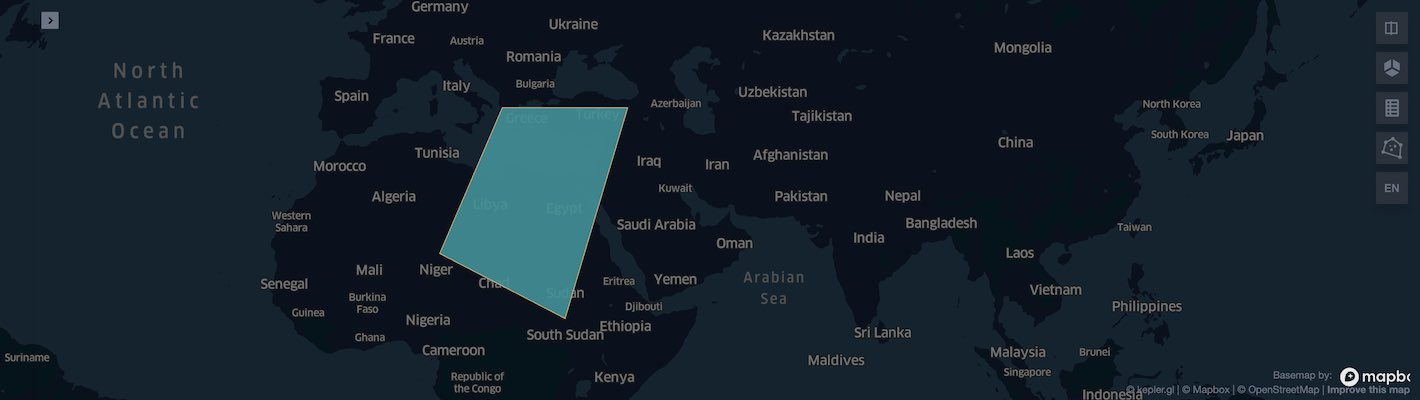

In [0]:
displayHTML("""<img src='data:image/jpeg;base64,/9j/4AAQSkZJRgABAgEASABIAAD/4QDoRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAAAAAACQAAAAAQAAAJAAAAABAAiQAAAHAAAABDAyMjGRAQAHAAAABAECAwCShgAHAAAAEgAAAMygAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAACxigAwAEAAAAAQAAAyCkBgADAAAAAQAAAAAAAAAAQVNDSUkAAABTY3JlZW5zaG90AAD/4g0gSUNDX1BST0ZJTEUAAQEAAA0QYXBwbAIQAABtbnRyUkdCIFhZWiAH5wALABYACgARACNhY3NwQVBQTAAAAABBUFBMAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWFwcGwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFkZXNjAAABUAAAAGJkc2NtAAABtAAAAepjcHJ0AAADoAAAACN3dHB0AAADxAAAABRyWFlaAAAD2AAAABRnWFlaAAAD7AAAABRiWFlaAAAEAAAAABRyVFJDAAAEFAAACAxhYXJnAAAMIAAAACB2Y2d0AAAMQAAAADBuZGluAAAMcAAAAD5tbW9kAAAMsAAAACh2Y2dwAAAM2AAAADhiVFJDAAAEFAAACAxnVFJDAAAEFAAACAxhYWJnAAAMIAAAACBhYWdnAAAMIAAAACBkZXNjAAAAAAAAAAhEaXNwbGF5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbWx1YwAAAAAAAAAmAAAADGhySFIAAAASAAAB2GtvS1IAAAASAAAB2G5iTk8AAAASAAAB2GlkAAAAAAASAAAB2Gh1SFUAAAASAAAB2GNzQ1oAAAASAAAB2GRhREsAAAASAAAB2G5sTkwAAAASAAAB2GZpRkkAAAASAAAB2Gl0SVQAAAASAAAB2GVzRVMAAAASAAAB2HJvUk8AAAASAAAB2GZyQ0EAAAASAAAB2GFyAAAAAAASAAAB2HVrVUEAAAASAAAB2GhlSUwAAAASAAAB2HpoVFcAAAASAAAB2HZpVk4AAAASAAAB2HNrU0sAAAASAAAB2HpoQ04AAAASAAAB2HJ1UlUAAAASAAAB2GVuR0IAAAASAAAB2GZyRlIAAAASAAAB2G1zAAAAAAASAAAB2GhpSU4AAAASAAAB2HRoVEgAAAASAAAB2GNhRVMAAAASAAAB2GVuQVUAAAASAAAB2GVzWEwAAAASAAAB2GRlREUAAAASAAAB2GVuVVMAAAASAAAB2HB0QlIAAAASAAAB2HBsUEwAAAASAAAB2GVsR1IAAAASAAAB2HN2U0UAAAASAAAB2HRyVFIAAAASAAAB2HB0UFQAAAASAAAB2GphSlAAAAASAAAB2ABDAG8AbABvAHIAIABMAEMARAAAdGV4dAAAAABDb3B5cmlnaHQgQXBwbGUgSW5jLiwgMjAyMwAAWFlaIAAAAAAAAPMWAAEAAAABFspYWVogAAAAAAAAgwoAAD1u////vFhZWiAAAAAAAABL+gAAtCEAAArgWFlaIAAAAAAAACfSAAAOcAAAyJFjdXJ2AAAAAAAABAAAAAAFAAoADwAUABkAHgAjACgALQAyADYAOwBAAEUASgBPAFQAWQBeAGMAaABtAHIAdwB8AIEAhgCLAJAAlQCaAJ8AowCoAK0AsgC3ALwAwQDGAMsA0ADVANsA4ADlAOsA8AD2APsBAQEHAQ0BEwEZAR8BJQErATIBOAE+AUUBTAFSAVkBYAFnAW4BdQF8AYMBiwGSAZoBoQGpAbEBuQHBAckB0QHZAeEB6QHyAfoCAwIMAhQCHQImAi8COAJBAksCVAJdAmcCcQJ6AoQCjgKYAqICrAK2AsECywLVAuAC6wL1AwADCwMWAyEDLQM4A0MDTwNaA2YDcgN+A4oDlgOiA64DugPHA9MD4APsA/kEBgQTBCAELQQ7BEgEVQRjBHEEfgSMBJoEqAS2BMQE0wThBPAE/gUNBRwFKwU6BUkFWAVnBXcFhgWWBaYFtQXFBdUF5QX2BgYGFgYnBjcGSAZZBmoGewaMBp0GrwbABtEG4wb1BwcHGQcrBz0HTwdhB3QHhgeZB6wHvwfSB+UH+AgLCB8IMghGCFoIbgiCCJYIqgi+CNII5wj7CRAJJQk6CU8JZAl5CY8JpAm6Cc8J5Qn7ChEKJwo9ClQKagqBCpgKrgrFCtwK8wsLCyILOQtRC2kLgAuYC7ALyAvhC/kMEgwqDEMMXAx1DI4MpwzADNkM8w0NDSYNQA1aDXQNjg2pDcMN3g34DhMOLg5JDmQOfw6bDrYO0g7uDwkPJQ9BD14Peg+WD7MPzw/sEAkQJhBDEGEQfhCbELkQ1xD1ERMRMRFPEW0RjBGqEckR6BIHEiYSRRJkEoQSoxLDEuMTAxMjE0MTYxODE6QTxRPlFAYUJxRJFGoUixStFM4U8BUSFTQVVhV4FZsVvRXgFgMWJhZJFmwWjxayFtYW+hcdF0EXZReJF64X0hf3GBsYQBhlGIoYrxjVGPoZIBlFGWsZkRm3Gd0aBBoqGlEadxqeGsUa7BsUGzsbYxuKG7Ib2hwCHCocUhx7HKMczBz1HR4dRx1wHZkdwx3sHhYeQB5qHpQevh7pHxMfPh9pH5Qfvx/qIBUgQSBsIJggxCDwIRwhSCF1IaEhziH7IiciVSKCIq8i3SMKIzgjZiOUI8Ij8CQfJE0kfCSrJNolCSU4JWgllyXHJfcmJyZXJocmtyboJxgnSSd6J6sn3CgNKD8ocSiiKNQpBik4KWspnSnQKgIqNSpoKpsqzysCKzYraSudK9EsBSw5LG4soizXLQwtQS12Last4S4WLkwugi63Lu4vJC9aL5Evxy/+MDUwbDCkMNsxEjFKMYIxujHyMioyYzKbMtQzDTNGM38zuDPxNCs0ZTSeNNg1EzVNNYc1wjX9Njc2cjauNuk3JDdgN5w31zgUOFA4jDjIOQU5Qjl/Obw5+To2OnQ6sjrvOy07azuqO+g8JzxlPKQ84z0iPWE9oT3gPiA+YD6gPuA/IT9hP6I/4kAjQGRApkDnQSlBakGsQe5CMEJyQrVC90M6Q31DwEQDREdEikTORRJFVUWaRd5GIkZnRqtG8Ec1R3tHwEgFSEtIkUjXSR1JY0mpSfBKN0p9SsRLDEtTS5pL4kwqTHJMuk0CTUpNk03cTiVObk63TwBPSU+TT91QJ1BxULtRBlFQUZtR5lIxUnxSx1MTU19TqlP2VEJUj1TbVShVdVXCVg9WXFapVvdXRFeSV+BYL1h9WMtZGllpWbhaB1pWWqZa9VtFW5Vb5Vw1XIZc1l0nXXhdyV4aXmxevV8PX2Ffs2AFYFdgqmD8YU9homH1YklinGLwY0Njl2PrZEBklGTpZT1lkmXnZj1mkmboZz1nk2fpaD9olmjsaUNpmmnxakhqn2r3a09rp2v/bFdsr20IbWBtuW4SbmtuxG8eb3hv0XArcIZw4HE6cZVx8HJLcqZzAXNdc7h0FHRwdMx1KHWFdeF2Pnabdvh3VnezeBF4bnjMeSp5iXnnekZ6pXsEe2N7wnwhfIF84X1BfaF+AX5ifsJ/I3+Ef+WAR4CogQqBa4HNgjCCkoL0g1eDuoQdhICE44VHhauGDoZyhteHO4efiASIaYjOiTOJmYn+imSKyoswi5aL/IxjjMqNMY2Yjf+OZo7OjzaPnpAGkG6Q1pE/kaiSEZJ6kuOTTZO2lCCUipT0lV+VyZY0lp+XCpd1l+CYTJi4mSSZkJn8mmia1ZtCm6+cHJyJnPedZJ3SnkCerp8dn4uf+qBpoNihR6G2oiailqMGo3aj5qRWpMelOKWpphqmi6b9p26n4KhSqMSpN6mpqhyqj6sCq3Wr6axcrNCtRK24ri2uoa8Wr4uwALB1sOqxYLHWskuywrM4s660JbSctRO1irYBtnm28Ldot+C4WbjRuUq5wro7urW7LrunvCG8m70VvY++Cr6Evv+/er/1wHDA7MFnwePCX8Lbw1jD1MRRxM7FS8XIxkbGw8dBx7/IPci8yTrJuco4yrfLNsu2zDXMtc01zbXONs62zzfPuNA50LrRPNG+0j/SwdNE08bUSdTL1U7V0dZV1tjXXNfg2GTY6Nls2fHadtr724DcBdyK3RDdlt4c3qLfKd+v4DbgveFE4cziU+Lb42Pj6+Rz5PzlhOYN5pbnH+ep6DLovOlG6dDqW+rl63Dr++yG7RHtnO4o7rTvQO/M8Fjw5fFy8f/yjPMZ86f0NPTC9VD13vZt9vv3ivgZ+Kj5OPnH+lf65/t3/Af8mP0p/br+S/7c/23//3BhcmEAAAAAAAMAAAACZmYAAPKnAAANWQAAE9AAAApbdmNndAAAAAAAAAABAAEAAAAAAAAAAQAAAAEAAAAAAAAAAQAAAAEAAAAAAAAAAQAAbmRpbgAAAAAAAAA2AACuAAAAUgAAAEPAAACwwAAAJoAAAA2AAABQAAAAVEAAAjMzAAIzMwACMzMAAAAAAAAAAG1tb2QAAAAAAAAGEAAAoEQAAAAA2ZNdgAAAAAAAAAAAAAAAAAAAAAB2Y2dwAAAAAAADAAAAAmZmAAMAAAACZmYAAwAAAAJmZgAAAAIzMzQAAAAAAjMzNAAAAAACMzM0AP/AABEIAZAFjAMBIgACEQEDEQH/xAAfAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgv/xAC1EAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGRoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T19vf4+fr/xAAfAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgv/xAC1EQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2wBDAAQEBAQEBAcEBAcJBwcHCQ0JCQkJDRANDQ0NDRATEBAQEBAQExMTExMTExMXFxcXFxcbGxsbGx4eHh4eHh4eHh7/2wBDAQUFBQgHCA0HBw0gFhIWICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICD/3QAEAFn/2gAMAwEAAhEDEQA/APh+p4reWUZHA9TToLdpTuPC/wA61/YV2WOaUuhmm1SEeZM2QOwHWp7eZ5W4ChB2HWqt1KZJPLHRT+Zq/BF5Me3ueTQJ7akopaBzx716JpHgNNU0u21I3Zj+0RiTYEBxu7ZzzTJSued0V6t/wrSP/n+b/v2P8a4PxBpA0PVG04SebiNJN2Nv388Y56YoCxi0UUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKrS2sch3cqe+Ks0UDTK8VtFHzjJ9TViiigLhVd7aAhiRjPJPpVis26mMh2RZIH3iKQIjkgiXLLINuOB1NVatQWplXeTgdqlFic/M/HsKDS6RQp8ZQOC4yAea0BZR4G4nPfFPS0hU5OW+tFhcyLCMroGXoelRTTpEDk/N2FVbyV1cIpIGO1UKLiUeo53aRi7dTXV+HLSyGn6lrN7bpdfY44xFDJnYXkYjLAdQK5KtnR9am0dplEUdxDcp5c0Mv3XUHI6cgg9DUSTa0NY6HU2uhv4ieO8ms47K3Fs8wFiqq0u1gowrHAbPGTxUk3g7S7RJ7y9uLiK3ihim24RphvZlZGAyu7IGCOOeaym8YSeZEsFlbx2scD2xtcs0bxyEMwJODnI4Pas6XXYRb3VpY2MNrFdpGrLGzHHlMWByepOcH2rO0iro6O08L6BdtYwi5u0k1KKSWD5YyqhCfv98kenfv0qmPDul3KWN5prXs9vdvLEUCx+cGi7jom0+p6Vm2via4tZtOmSFCdNieGMEn5g+clvcZ7U/TfFNzplpBZRwxyRwmbIcn51n+8px09iKdpBdHQXHg3TbbNxcS3UUAs5LsqwjMq+UwVl+X5DkHIxVIeF9MuLm2hs7ibGoWbz2glCBvMT/lm+BjB7EVny+KpGszYW9pDBD9lltFRC3ypKwYnJ6kEdT1zzUVtrCT3GmrdyG0TTVwksamRjhg/KjHXGPTFK0g0Kd/psNjpdhcsz/aLxHmKHGFjDYT3y3X04rFrd8Sasut6vLfRLsi4SJDxtReg/Mk/jWFWsb21JfkFFFFMQUUUUAFFFFABRRRQAUUUUCCiiigYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQJBRRRQK3UKKKKCgooqeG3ebkYAHGaBEFFKQVJU8EcGkoGFFFFIhJhU0EXnPszgYyTUNSxSeUWPcrgUymRHg4ooooAmhlER5UN/Op3vXPEYC/rVKigXKhSSTk8k0lFFA9gooopGbl2CiiimVGVwooooLCiiigAooooZMlcKKKKRkFFFFOxoo9wooooLCiiihkyegUUUUjMKKKKBrRhRRRRYpx6hWlZRAJ5pHJ4H0rNrciAESgdMCqQpMzryPZLuHRufxqxZPmMp/dP86hviTIq9gM0li2JSvqP5UuojUoooqiQooooAKKKKACiiigAqtdgmA47EGrJIHJ4qKNjLluNnIHv70DXcp2ttnEsn4D+taNFFAN3CitH7B/t/pR9g/2/wBKVx8rM6itH7B/t/pR9g/2/wBKLhyszqKKKZJ//9D4/pkjiNC57Cn1m3soZvKA+7zmu040rsqxSCOTzGG7GfzrRtZXlDF2HXpWVR71Jo1c6BT82PQ19C+Ef+RY03/r2T+VfLiuxfcSck8nNe26F450zStGtNNnhnZ7eFY2ZQpBK9xlhVJitY6/Qbu8uL2+jVnnsI5SIZ5htffk70X++iHgNx6c4zXmnj//AJGZ/wDr2h/m9dl/wsjR/wDnhc/kv/xVeceJtWg1vV21C2R0QxJGA+M5Xdk8E+tApNGDRRRQQFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFACEBhg9DSIqooVeAKdR060AFNd1jXc5wKYZogwQsMmnSKGjZT6UDHKwZQy8g8iqs90Im2KMkdfSs1XkAwrEfQ0jFidzdT60rlqAskjytufrTKKKRQUUUUDCiiigAooooAKKKKACiiigAooooAKKKKACiiigQUUUUDN/w1pUGs6qLG5ZlQxSSZTGcoMjrmrWgaLa6nprX9wWDLeWtvtU4BWdlDe+QDxVLw5q0ei6tHfyoZIwrxuq9SrjBxnjNb8Ws+HtJs4tO0g3MqNeQXM0k6qpCwsCFUDGTx1rOV76FRt1KMnha4mu5FtmSOJ757O3ErHc5ViOODkLjk+tQSeGvs9x9mvNQsYHUfPvl+4c42nA+93I7V0T+L7C9voL7UfNaSyvmlt3VRk27nJRhxgjjH061laPr1jZzak0rzQNduXiuIUV3QeYzFcNwNwIyam8h2QxvC9zBBc29xGnnxXUECyiQ7f32MYXGGByPm4I9KgvfCV/aRPIk1tcNFMsEscEm5o3dtqhhgdTx7GuivvF+mXUk0irKPNurOcbgMhYNu/ODjJxxisoeJLSKTU5owxa6vIbmEEcYil8whvTIoTkFkZWo+HLrTreS4M9tP5DiK4SCTe0TscAMMDqRjPrxXPV3fiLxHa6rayi1u7w+fIHNtKkYjXnONyjLYP3efrXCVpBtrUmVugUUUVQgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiira2N09jJqSp/o8TiN3yMBmGQPXkUXAqUVevdNvdOkSG9jMckiCRUJBba3Q4BJGcdDzVLBpXCwlFLg88dOvt9au3OnXVpDbXEwG27jMsWDklQcZPpz2ougsUaKu3en3NlHBLcBQtzCs8eDn5GOAT6E+lUu2ew4ougsFFWruzubG6azukKSoQGTqQSA2OPY5qtgnAHc4H1ougsJRRRTAKKKKACiiigAooooAKKKKACiiigAooooAKljnkiBCHr61FQODmgQdeTRUkjo+CqhT3x3qOgAooooGFFFFABRRRQAUUUUAFFFFDJlsFFFFKxKj3CiiimWlYKKKKBhRTkXe4TOM9zTpfL3/ALr7o4+vvQIjooooGFFFFIhx1CiiimWFFFFAgooooYpaoKKKKRmlcKKKKZpFWCiiikRJ3CtyEARKB6CsQDJA9Tit/pxTQnsZl8PnU+1VY3Mbhx2NT3jEzY9Bir628XlhCoPHOetA/UnooAwMUVRIUUUUAFFFFABRRRQA1lV12sMj0p3TgUUUAFJ3paaaBnSVtW/h7VrnyykQCygMrMygYPIPXP6Vi9q62HZ/wkWlZxu+zwfX7j1CNTEudI1GzhNxcxbYwQC25TyeB0JrNrXtdn9i6htx/rYOn++1ZFAHOd6WminVZkf/0fjuWRYkLtz7VjSSGRy5wM+lbbKrjawyD2poiiHRR+VdhyRdjDorbMEJOSgqCZbdGB2gvjAUd6LFcxlCte3UJhWJL7cnPYU1IEgjd25JBz/9aqluZTMEyQTjdnrgUA9TXooopmYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVK9j3IHAJI4wPertFA07GAQVOCMGkrdeNJBhxmsu5g8lsj7p6e1KxopXOk8E2drfeIEtryKOaMwytslGVJUAjOfQ1tvpFvqV8LK+isbFY7WW6Mmm4cEJt+/wBfUkDr71xmjatNot99vgRXYRvHhs4w4wTxUelajJpLStCit5tu9sd3ZXABPHfispRbd0aJqx12jeGtI1uTNqmo+Q8gjjmPkBV4HLA8kg5yFHA96kg8K6KstjZXk90Li/aaNDEE8tWhcpk7vmwcDgVhab4lfT7W3tntILg2kxnt3l3ZjZjk4A4OTzz0pX8UXT3tjfGFN1hJLIgycMZX3kN9CeMUrSHdFibQtM06wgk1OS4a5uzKIUgCbAI32AuW5+Y46dBWrq/gu302wupVe482zRXZ5PLEUvTcIwDvBGeN3WsE+JTLZfY76zgudjyPDI5YPF5rbiBjqAeQD04puo+IY9UidrqwtjduoVrtdwkO3AzjpnAwTRaQaHN0UUVqQFFFFAG1pmh3eq2tzdW5UC2XO09XbaW2r/tbQT9KrxaRqUxRYoGcyQ/aFAxkxZxuAz0zxjr7VuaR4oTR7W1toLaOQxTtPM8gyWLfL8mGGCI8rk5/Kpx4k0yOIG3guI5UtjZRlXUBYTJuBHU+YBwD0zzWbcuxVkZy+E9a8meWWIRm3CkqXQk7iV4wxHGOc8+nNRyeGdWghke5iaKRGjVY22ksZG2DkNheemevt1rXuPE2mTrPGbaY+ekW+Y+UsryRSGRWcIAhHYkc4qBPEtp9vv7ue1MyX1xDN5bkYAiYttb1Jzx2454pXkOyOcvtOvtNkWO+iMTOu5clWBHTIKkg8+9Uq6DXtYh1b7KsKygWyOm6XYGbe27OIwFGOnArn60i3bUl+QUUUUxBRRRQIKKKKASCiiigYUUUUAFFFFABRRRQAUVIkMsgyi5HrUhtnRS0hC+me9ArleiiigYUUUUAFFFFABRRRQAUUoBY4UZPtUrQTINzKcfnQIhopSGHUEfWkoGFFFFABRRRQAV6N4YvNPsfDNzc6nD58KalbllyRjCr83HXb129D0rzmnbmC7QTj0zxUyjcadj1dNO1WHxDqd8tzPIzxLcQtaiMyTxyNgbd4KgIAN2OcAVvGHVotdm1CyEn2dLSGWaCMR755ypAViBgHgbiCBxXhYllBBDsCOmCRj6elKJZVGFdgPQEj+VR7Nlcx7b4fj1jzIJ9Sa4Jurmb7TAiwiGI5xiXILfMCMAHpj8a6parbWdvZrt1IadOtkW27Bh8EAH+Pb93tXjPmSc/M3JBPJ5I6H6ijzJMg7myOnJ4+lHsw5z2HTb67W40HR3b/RrjTP30TKpDHY/XIzxj1qhBNqDeE47hDcaelnapIDiMwXG0ghgcbxI3WvLfMkzu3NkdDk0GSQrsLMVHOCTjPrjpR7MOc9rvk1uXxBqN0styI4o42tUthEXlR9u7YXBG1W5PeofEt7Po+nalqOmsIbgvasXAQtuZMMehGTjnFeNiWUYw7DaMDk8D0HoPam7327dxx6Z44o9mHOdX43SNfEcxjAG+OKRtvALMgyfxrkqVmZjliSfekrRKysQwooopgFFFFABRRRQBPHHDIAN5VvccUySJ4m2uPpUdKST1JOPWgQlFFFAwooooAKKKKACiiigAooooAKK7aw8O2t/4PuNXj3fa4JGIGTho0ALjb0yAc5q0/hGM6Bp0sQP9oX1wqbWYhVWRWZQR0B2jJPWo50PlPP6K7SLwd9rkVNNv4rkLc/ZZmEbp5bkHBwx+ZSRjIqJvCTyCE6deQ3YkuhZuVVkEcuM4O7qOOop86DlZyFFd3/wg8kuw2l7HKHmeElonjCmMFnY7jyqgdupqbRfC9jNeW1z56X9jcCZNyq8REkaFgCrHPbIPel7RD5WefUV1Z0e3ls9JaV47Y3dvJI0io8jMVYDlF5Lc8Baztb0WTRZoUMomjuIhLG4VkypOOVblSD1BpqaegnGxi0UUVQgooooAKKKKACiiigAooooEwooooBBRRRQMKKKKGTJaBRRRSJirhRRRTNAoooouRKVgooqSKJpn2r+J9qRBatbcsRK/AHIHrWlSAAAAdBS1QFKZFa6jz3HP4VdrMuWMdyHXqAK0Ubeocdxmgb2Q6iiimSFFFFABRRRQAUUUUAFFFFABTTTqaaBnSVuW3iHU7YxbTGwiAVQyKTgDAGcZ/WuP/tLH8H6//Wo/tL/pn+tQaXR09zrF/dwNbTMnlsQxCoq5KnI5AFZlZf8AaX/TP9aP7Sz/AAfr/wDWoC6M8U6minVZmf/S+PVZXUMvINOpFUKAqjAFLXacQUUUUAIKaI0VzIB8x6mnCloAKKKKACiiigAooooAKKKKACipPJl8rz9jeXnbuxxn0zR5UvledtOzO3djjPpmgZHRRRQIKKKKACinmORUWRlIVshTjg464qSC2nuWZYF3FVLH6DqaQyCij3opiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqGeETLjOCOhqaigZhOjRuUbqKZVi6x57Y9qr1JqgooooGFFFFABRRRQAUUUUAFFSRRmVwgIGfWrb2iRws7ZZgO1AmyhRS4O3d2PGaSgYUUUUAFdbpmi6PNop1jVJ7mMfafsyrbor8ldwOCM/lXJV2mkeKG0XREtbKRluRerOy7QVeIKAVJII5I7c96id7aDj5kV54Qu7e/vLaOeBYLNkDXFw4iT94AygnBw3PSol8G6yXlWY28IhlWFmmlCLucBl2nByGBGCO9a15qnh7UIdR017meKG8uUu45mjaRlbbtdGXOSB/Cen5U/XPE+m6lYy2lvvGLq3aLevWOFApJ9CTnj0qOaRVkYV74T1awgknuPI/cuqSokgZ4y5wpdQOAfXNKPCWpyeUbWW1uFlmEG6CYOFkIyA5AG3OPetifxDpMuo61csGeK/ktmjQqRuWJgXVs9MgEDNbqeL9Fhk/4+JZY/tkc6KLcRiOJc/IMcsRnr37d6OaQWRxbeF721kt3uTDNDLcrbP9nlDlXJxsY4+VvzpR4YuLu/mtbOW2iZZ3hjhnnAlYocYUbfm+vGas2OtWFvaSwSFtz6vHfDCnHlIwJ/4F7VvWHijRbec3Ilkgb7fLcSbYA7TxM2UUseU2j8fTmhykOyPMpI3ikaKQEMjFSPQg4I/OtCOzj2jzMlu/NTsYbq9ubtASHnkdSfRmLDj1wamrZbGE3rZGTLbuJCI0O3t3quyshw4IPvW45cLlBuPpWNM8rtmXqO2MUwi7j4bZ5efur6/4VoLawKPu5+tVbW42/u5DhccE1bW4id9inPGc444oFK5KwO3CYBxx6Viys7SEuQSOMjpV25uUMeyM8nr2wKzqGOKCiiikWFFFFABRRRQAU5EaRtqDJq1FaGRFdjgHt7VfihSFdq/nTsS5DbeERJyPmPWp6KhkniiOHPPpTM9xZwrQsH6YzWJWyXhnjI3cd+1VxaRNF+7O5uzdqRUXbczqKOhwaKRoFFKAWIUdTxSEYOPSgCwotmUAlkbHXqM1AcZOOR60lFAgooooGFFFFABRRRQAUUUUAKAWO1RknoK0RFFbReZINx9DVS3dY5Qz9On0pLh98zH04/KmS9XYVZlUEeWpye9RqU3ZZSV9Af60yikOxbV7RW3bWPseRVUnJJxj2FJRQFhyLvcJ0ycU+aIwvsJzxkGoqczu5y5yRxzQA2iiigYUUUUAFFFFABRRRQAUUUUAFFFFAHXaP4nTSrO1thEzmG7eeTkbXjeMxsn1wc88VdbxmTP9qELb11BbyMEjaI1j8oR9c529xxXCUVHIh8zPQLPxXpGlSZ0y2udk12LqcTMhOFyQke3jGT1aqmia9YwOtpdqVjk1Rb1pGAKqoGMEdSc4Oe3WuKoo5EPmZ65f+JdLtpk1RnjubgO0XlW9zJMpgkBDk7wAjdMY69DxWDYeKtK0lLWz063uDbW7SyN5zIZGeRCg+78oCg/U1wRJPWkpKmuoc521h4ptrWCyt5IpgLayms3kiZVceaynfGT0Ix3rL8Q61DrBsxCswFrAYS07B3fnIYsO/r71ztFUoJO4nJhRRRVCCiiigAooooAKKKKACiiigAooooAKKKKACiiigTCiiigEFFSRxSS52DOOtMIIJB6igBKKKKRk9wrVs49se89W/lVW2tjJ87/d/nWrTSDYKKKKoRS8gSXLtJyMDH41Yjj8olVJ24GMnPNEc0cpIQ9KloG29gooooEFFIzBQWY4ApquGI28gjOe1ADiQOpxnilpmwb955Pb2+lPoAKKKKACiiigApDS0negDQ/s7/b/AEpP7N/2/wBP/r1qdq6W28L38llLf3X7iNI2kVT95sDI47D6/lU6mtkcN/Zv+3+n/wBel/s7/b/Su4ufC99HZRX9r+/jeNZGUfeXIyeO4+n5VzXajULI5wUtJ3paoyP/0/j+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooA7PTGtm0SO1u+EuJnjB9GzkH8xVC5t5bTQ5LeYYZLrB9+Ov41Qe6hbRorQH94szORz0Oec1dvNWjvdHS3lP79XG7jqB3zWdnf5mt1b5FXSbW3m8+5uwWjt495UHG49h+lTzQ2V5pkl9bQ+Q8LhWVSSCDj/Gq+k3dvAZ7e7JWK4j2FgM4PY/rVieaxs9MksLSbz3mcMzBSAAMev0pu9xK1iLRbS1u2uBdg7Y4t2R1HPJFUb2a0mkDWcPkoFxgnJJ9TVrS7qC2S6ExwZYSi8Zyayaa3ZL2R1OoT239jWmLdf3its+Y/Ie5Hrn3qv4c2i5nLjK+Q2QPTIqKaezudIhhaXZNbBgEIJ3Z9DUWkXUFpLM05wHhZBxnk9Km3utFX95Msyx6feaTJeWsH2d4GVSAc5Bx1/OufrVtbmGLSLm1c4kkZCox1xjPP4VlVS6kvoFFFFUSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRUUsyQrubn2FQLexH7wI/WgdmXKKq/bIM4yfripfPhxneMfWgLMloqITRNyHHHvTmkRV3sRj1oCxk3JzO2PpUFKx3MW9TmkqTVBRRRQMKKnNtOBnaahIIOCMH3oFcSlALEKoyTUsMDzHjgDqa04bdIckck9zTE5WMl43j++pFMrfIDDDDIPrWLOgjmKDj0HtQEZXHWwUzru/D61sEAgg9DWAD3B/EVp290XwknU9DQhSXUmkgVofLQDIHy5rGroKz57Qk74ucnkUMUX3M+ilIIODSUjQKKKKACinKjv9xWbH90E/yptABRT2jkQgOrKSMjII4PQ89j603BoASrFrGJZcMMgDJqLy5QgkKNsJ2hsHGeuM9M47VeskZdzMCM4AzQiZaItxxrEuxOnWpKKKoyCqN1DJK6lBwBjNXqKBp2K0VrHGQ3JYetWcDrRRQDZUntRKd6nDY/A1mvG8Zw4IrdprosilHGQaVhqRg0VNNC0LYPIPQ1DSLTCiiigoKkiVGkCyHC1HRQI3wABgdKWqtm7ND838JwKtVRkyKWXygCVJB9O1ZU7rJKXTocVtViTR+VIU7dR9DSZUCNQpYbuBnmpGmkJ4YgdgOMCoqKRYUUUUDJoHWOVXfoKiJySfU5pKKBBRRRQMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigl36BRRRRcXMWLecQFiRnIqBiWYsepOaSihhJ2CpoYWmbH8I6mo0RpG2oMmtmGIRRhO/c+9CRBIAAMDoKWiiqEFFFMkYpGzgZwM0AZBYwzkp2Y1rRypKu5D9R6ViEkkk9+aVWZDlCQfalc0aub1N3KG2dzzWbDcyNIqyNkZrTAx+PWmQ1YY0Ydvn5UdB7+pqSiigQUUUUAFFFFABRRRQAU006mmgaOjPQ/SvW7jVG1K3bTdHiNwXj8uSY/LEmRg/N/ER6CvJa6bR/FF7parbyATQDoh4K/wC6f6GpTNWdpFqculWy2GsQmEJH5aTpl4mwMDJ6qfqK8kHTHtXUav4pvtTVoIv3EDcFByzD/aP9BXMUNgjmxTqaKdVGTP/U+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACirNpay3twttDjc2eT0GOcmlvLSWxuGtpsblAOR0INK/QdupVoq1aWc17I0cOMqhck9MCqhOBn2zTELRV/ULFrCZYWYPuQPkDHXtVEKzfdBP0GaSd9RtW0EoopQpPABPemISiirUtnNDbRXT42zZ2+vHrSGVaKsW0UU0hWaURAKSGIJyR249ar0xBRS4ON2OD0NJQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUHkYoooAwXRkcq3UU2p7nPnvn/PFPsoEuryG2kcRrLIiM56KGYAn8Klmy1KtFehan4ZsV1KLQ7G1vLa4lm8uO4uWDQyKATuG3pnHGPxrEuvDJtrdLtL62mgM/wBnmlQnbC+M4ckcj3H5VCmiuVnMUV3Nn4SAvbMmWG+t7p5IgVMkQ3ohfB43DgZBHWqtl4RmvoLWVLy2jkvojJbwOWDvjORxwMY60e0QcrOQopSCpKsMEHBHuKSrEFXbEKXYnqBxVKtG0gdG8x+MjAHemTLYv0x40k++oOPWn0UzIRVVBtUYA7ClJAGTRSEZBB70AQxzpK5VOgGc11+kw2j6FdyXUQkAv7ROuGwzAEBsEgc8+tcPZRsrMzAjHFbcd9cw2clhEwEUsiTNx82+MgqQc8Yx6VE02rI0i1GR0eoafpV1r+pMbE+TauFkdrkQRhieu7HGRwFHcc9afqGnabomm6haSBntYtUti3zfOI2iVj8w5yAfxrGuPEWpSGeV4rST7QFMsbwgo7J0cru++PX9Kx7zxHqGpJLBfbClxNHNLsXB3RqEGOcD5R09ay5JGymnsdJqGiw6bDqEsxZhHPHDZnOA+8eYWP8AeAjI/EGubqzrPiFb23srCyEot7KPYvnlS7k8ZbbxwBge1ZcN0Zn2bccZzmtYXtqZTXYllhWVNh47g+lZcsEkXLDj1HStqkIBGDyDVEKVjAoqxcQiFwAcg8j2qvSNEdx4MaVYtUFv5nmtBEEEMiRyH94c7Wf5RgdfaumudO03UdWN0wt5RHfBrssVG2H7OvDHOGAfOSON2a8gKq33gD9RmjavGQOOnHT6Vm4Xdy1I9hs7TSrtYrq8igmAtrKJPOCnJKvmMbyArHjnOR6U6z0bSfJiXUba1D+ZESVVF5ZyJIyQxZtg4bIAzyK8otNQvrDd9hnkg3/e8tiufrj+fWqbAMxdgCzcknknPqe9L2b7j5z0vT47PU7WM+TaxbbybbbhAVdUh+VQjMFLMe5IBPPtWbr0Frb6kY7NFjjMUbbExtVivzAAEgc9gcVwxAPUA/Xmt2JlaMFcdOQPWrjCzuZ1JXViSiiitDEKKqSXkaHC/Mf0qv8Abn/uilcrlZp0Vnpe5bEgAHqOauRypKCUOcUxNNElFFFAhrKrjawBHvWbc24jHmJ0zjHpWpVe6K+Qwbv0+tIqLMeiiikahRRRQBo2Ug2mI9RyKv1gqxRg69RWxDMsy5HBHUU0ZyXUmqGaBJhzwexqaimSYs8PkuFznIzUNapt1knZ5ORgYFVLqFYnBQYUj9aRopdCrRRT4yokUv8AdB5pDJPs1wbf7WI28kNs34+XdjOM+uO1JPbz2uw3KGPzFDpu43KehHqDXbpDLfeDZ0sUaZo9RVnWNSxAMQGcAE4zXSGC8XVrO3MUZS20uBr3zYfOaNV3Haq/326AAfyrNzsy1G6PJvstx9k+37D5G/yvM4xvxnb1znHPSq54616q2o3x0a4v7PTUDvqny20luX8tTCAPkwME9C3ucVqTadpWmPf3FlCm5L5YnX7Mbny0MSuYwoI2gsT834Uvadx8h4+9ndR2sd68ZEMrMiOcYZl+8B3470PZ3MdrHeuhEMrMqPkYJX7w6549xXskFlod1b2SRRsqreXb2drMhUPJjIR88qAc4BHPArnrAWUWn6Xf6nZec73V55yxxbmBBIUlB1VD/D2/Cj2gch5xHDLMjyxKWWJdzsOQozjJPYZqLIzjv6V7GWv7G11V1S2nZ7GC4i8u22FgzsPniOTnjofrVV9P8vQ7qzvUhdo9Na6Qx2xUI2AVPn5+ZvXjn8DR7QOQ8m9qK9Z1cWss2u6SLS2jisrT7RC0cYVxIFU5Ld85/KvJzwSKuMrktWEoooqhBRRRQAewq0tpMwyQF+tValE8wGA5xQJ36DZEMblCQSPSmUUUAFFFFAwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiikZt3egVLFC8xITt1zRDH5sgTOM1tKqooVRgCmgbIGt4zH5Y4wMA96rCxbPzMMewrRop2JuRxxJEu1B9fepKKKYgooooAillEKbyM9hWYyXDPt2sN3OO1aNyoaFsjOBkfWiAShP3pyTyPWkUnZXMl43jOHGKlt4DMcnhR1NazKrjawBHvSJGka7UGBnNFh8xEtpApzjP1NWKKKZNwooooEFFFFABRRRQAUUUUAFNNOpDQBf/ALSx/B+v/wBaj+0v+mf60v8AZ3+3+lJ/Zv8At/p/9ep0NNQ/tL/pn+tH9pZ/g/X/AOtR/Zv+3+n/ANel/s7/AG/0o0DUzhTqQUtUZn//1fj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigDpNCt5vIu7yBC8ixmOMDrubr/AEp2t20/2O0u51KybPKkB65HQn9azRqckenLY24MZDl2dWwTntxS/wBqSPp0lhcBpCzBldmyVx9etZ2d7ml1axoeHJ5Y3uEQ4Hkl8f7Q6GudnnluWaedtzsMk9O3tV3Tb86fOZSm9WUoy5xkGqc5heRjAhjjP3VJzgY9apLW5Ld1Y2/Ef/H7F/1wT+tWNOe/trOOT7TFbQu52CQZL889ulZGo339oTLNs2bY1TGc9O9WYdUgFpHbXVuJjCSY23EYzzg46ips7JFXV2xfEEaR6rIIwACFYgepHNak+o3Nha6ctsVXfEC2VBJwQMZ9Oa5/Ub06hdG6K7MqBjOelOur77TFbR7Nv2dNmc9eQfw6U+XRJi5tW0WdeiSLVZVQAA7WwPUjmtDUr67Oj2gL/wCvRhJwOQP89qxNRvPt9211t2bgBjOegxU7ahFLpyWM8W54gRFIGxjPqO9FtFcL6steHADfSZ/54v8A0rO0mFLi/t4ZOVZhkeuBn+lO02+/s+dptm/cjJjOOveqcEr20qTR/ejII/CnbcV9jY1XVLueSazO1YVcqECgY2njmsOti+1CyvFaQWvlzuQWcMcZ78e9Y9EVoEnruFFFFUSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZN5jz+PQVHbtAs6NcqzxBhvVThivcAnvikmfzJWYdM8VFUs2R6loniXRbS4s9NtnujB9qEzy3zpiFQjDam08DOM9qzYvEmi6UyQafBPNGb77XP5+w52gqFTbxx94E+34ef0Vn7NF8zPSx40sElsyftlwLW5knaS4MZdg8TJgbTgYLfl+VYlp4itba60Kdo5CNKjZJAMfOWz93n374rj6Kfs0HMySVg8zyDozsw/Ek06CIyyBecdyKhAJOB1NbUEQhjC9+p+tWkZydgSCGPlVGfU81NRUAuEMvlDOfWqM9yeik570tAgqKaUQruIJHTipar3X/AB7t+H86Borw3TyTbW6HgCtCsmz/ANePoa1qSHLcKjaKJ+WUGpKKZJkS2skeSOVHOargkHI4NbxAYFT0PFZVxbiEBlJIPHNI0jK+4sV5InEnzD171pI6yLvQ5BqOBI/IVRhh3+tEcPlSMyn5W6D0oJdilenMwHotU69H8J+FLXxPqE3255Y7a0h8yVocByznbGgLAgbjk5x0U13n/CsPCH/PXUv+/sP/AMapat6K5M8RSp2VSVn8/wDI+fKcql2CDqeOa+hE+GXhBHD+ZqRwc4MsP/xqrH/CuPB+7fm/z1z5kX/xujln/K/w/wAzN46h/P8An/keALYn+NscdqiktJE+58w9q+if+FfeE/72of8AfyL/AON1FL8OvCcqbC+ojPpJF/8AG6fLL+V/h/mSsdR/nX3P/I+e4LYynL5C+vrVr7KkQLq7JjvXuI+GXhJcgTamM9f3sP8A8ao/4Vl4SxjztT/7+xf/ABqi0v5fy/zG8bQ/5+L7n/keBfapxxvz74pHuZpF2MRg9cV75/wrDwh/z11L/v7D/wDGqX/hV/hD/nrqX/f2H/41StP+V/h/mP67h/519z/yPnuivog/CvwgBnztR/7+w/8Axqo/+FXeEf8Anpqf/f2H/wCNUWl/K/w/zH9ew/8Az8X4/wCR890oZl+6SM9cV9Cj4WeET1l1Mf8AbSH/AONU3/hV3hE9JNT5/wCmkP8A8aotL+V/h/mH13D/AM6/H/I8GS8lXhsN9etPa+f+FQPrzXux+F3hEdZNT4/6aQ//ABqj/hV/hAf8tdT/AO/sP/xqnaf8r/AX1zD/AM6/H/I8IF9JjBUE+tVXkeQ5c5r0Lx74X0LwytimlSXLy3KySOtwyNtRGCqRsVfvHPXsK86qVK50xs0pR2YV0fh7RIdYkl+0zGCNNiKwA5llbai8+p6965yt2w8RalpVkbPTm8jdL5zyKAWYgbQDuBGAB2FKV7aFq3UksvDk99bSTJPCssTCN4G3Bw5fYq5xtyzcDmtB/Bd/EHkkngSKNWLyvvVV2MFcfMoJxkYIGGHSop/Fks6n/QrdHM5ug67gRMf48ZwSMcZqG88T3F3FcRmCOM3UZjlKs5zuYMSAxIXkdBxU++P3S1f+FliiWayuI3CwQzSoSd6iU4L9MbAT9cVPH4YnslkmlcSIYTIjLuTlZFRgVdc8buPXrmqK+LLyJUMEEKSqkMRl+YsUgIZVIJxyRyRyelWl8WT3Mgt5oFSF96sIyzOBI6yNguTk7l4zwBxStMful2XQJzJdi3df9FZwUbcTiPr84UJnHIHBPpVXUdHn05C8ksMuyYwSCIklH27gDkDqOcj6Vfn8TXMjzGOJAsjTbNxbKpOcsCAdpPvjjoOKy7vU7i8E4lCj7Rci6bGeGCbMD2xVR5+plLk6GTLPHCQHzz6VDJcW7RkE7sjp3/8ArU+eBJsFjt296yCMEj0NaExSYlFFFI0LdnqF9p7mWxnkgYjBMbFcj3x1/GpYtW1SCV5obqZJJeXcOwZsepzk1n0UrILmomuaykhlS8uFcnJYSNknGOeeeBjmobbU9Rs5WntbmaJ3+8yOwLZ9eefxqjRRyoLlxtQv3Kl55GKOZFJYkhz1YHPU+vWpF1XU0dZEuZVZGZ1Icghm+8Rz1Pf171n0UcqC5ojV9UFy16Lqbz2G1pN7biPQnPT26U3+1NSNuLQ3MxhVSgj3ts2nqNucY9qoAEnArbPhvxAql2sLgADJOw9PWk7dR6me1/eu8kjzOWmXZISxyy+jeo9jVShPnYKmCTjAHv0rUfRdVjaRHgYGGRIZBlTh5MbF4PJOR0yPXFO6QWbMuirMlndRXh0+SMrOH8oxnGd+cbeuM598VHcQS2s7W1wuyRGKspI4I6jjI/KncViKipZYJYVR5lKiRd6E8bl9R7e9RAgjI5FFwCigEEZHNFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAU+ONpXCL/8Aqp0MLTNtU4x1JrWihSEYXqepNMlysVYtOeSaKLcP3kiR5x03sFz+Ga3rvwffW09zbI3mvFJCkO0cSiZioYHPGCDkHpj8axGvvIuonjG7yZEkI9SjBsfpXR2XivVIkkWOJGRrv7Wm8n5MuXZAccq2T9Dz7VnK9/dKi1b3jOHhPViC6tbNEFLmYTDywFO1stjjaevH51e/4RAiB5GvIMi1juQd4CDzGx8zHouOQ3f0pbnWm/suTS7S0WKB1ZQokZ2Bdw7NkgZ5AAHpzWdPr5k059Pa3Cu9pHZvJvPKxHKttxwfXn3qXzle6yG28P3cupXWlTArPawySlUG8sYwCFXHXcGGCPyqebw1Olw9qk0Ie3jR7tpWEccLycCMuc5b6DrSHxFMdXu9WWLa93C8O1XI2b0VNwYDORtyOlar6wt0sq6japN9piiS5IcxmR4TlZMgcMejDv7Ue8L3UUofCuswyoZEjVndokRpAHZlOG2g9QMZJ/u81aj0S+knS3R7YtKoeI+cNsoJIHlnHzcjHbBq1N4jvJ9QtdTaNBJatKygE7WEpGVPcYUYz+PtU9v4nltn3RwMQGR133MjMCmeCxGSpzyvTPPOafvkvkZzJBBKkYIJBHoRwRSU523yPIeN7M2P94k/1ptamIUUUUwCiiigBkkixIXboKz0uQzJ5gGQfvVbugTA2Pqax6TZSOgoqC2bdAp9Bj8qnpiCiiigQUUUUAFFFFABRRRQAUUUUAFJ3paaaBnSCuzsPDlhc2tvLNLch54DP+7QFAF7Zx970HU1xgr1fR8/2dZY+0/8eLf6v/V//t/3alGrOVOh6bJbTy2z3ivDE0o86LYpx2yQOa5KvTfn+w3u7+0f+PV/+PvGzp2/2q8yoYI5zvS00U6qMj//1vj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKK6L+ztMsoIn1SWQSTLuCRjOB78GqGqaethKnlP5kUq70Y9ce9SpJlOLRmUVctLC7vmItYy+3qegH4mobi3mtZmgnXa69RTv0FbqQ0VpR6PqUsH2iOFihGR0yR6gdazsHOO/Si4WEorUl0XU4YTPJCQqjJwQSB7gGs+GGSeVYYhudzhR6mi6BpkdFacuj6lDCbiSEhV68jIHrj0rMoTvsDVtwooopiCiikH0xQAtFFFABRRRQAUUUUAFFFFABRRRQAVFOGMLBOSRUtFAHP0VYuv9e34fyqvUmyCiiigYUUUUAKCQQw7HNbqMXUMQRnsazrSFvM3upAA4z61p00ZyYc0mBndjn1paKZAUUUUAFRyx+bGUzjNSUUAQQ26RYPVsYJqeiigYUUhyASOazjeTK3zoB7HNAJXNKqt5t8khvw+tVmvpD91QP1qy1u0u0ytnHVQOKQ7W3G2kJjG8n7wHFXMgDJOAOpNFdF4U0dNd163sJxm3GZ7k+kEXzP/AN9cJ/wKhuyuG71PYfCelnR/DdvBIpWe7P22dWGCpddsakdiseMj1NdHwiBgAST3omlaeV5n4Zzkj09B+A4pA5AxgEe9dNOHLFJ7ny+Jre1qSqf1boKVUAs/XOMCnGNQMd8VEzls57nNLvJGCBnpnvWhgSmMZwOucU0KhJxnj9aaXJ5wM+tHmHOcD396AGuoUjHemU5jk9APpTaACiiimBISPLUe5qU4yz5GCOKrUUrAWd+ZWycjBxQGXOfVcD29qrUUWAsZJbYe4xxzUb7nfZGMnhVHqeg/M0wEjocU2S9j0y3n1aUZSxgkuiPXy1yo+pbFROXJFy7GlKm6k4011dj57+I+pJqHi26SFt0NmEsoz7QDDf8AkQvXCVJLJLLI0s7FpHJZ2PdicsfxJJqOuKCskmfYO2y2J4reSYZXGM4JNQkAEgc4oBK8qSPpSVQgoqeKLzVYL94YI/rUFABWhYop3ORyDgVn1oWLAbkPXOaYpbGhRRRTMgIB4NY90iRy4TuM4rYrJvP9efoKTLhuVaKKKRoFFFFABRRRQAUUUUAA4ORXdXOo6gPAtvMbifcdQlRm8x9xURk7c5zjjp0rhalM85gFsXYxBtwTJ2hjxnHTPvUyjcadj1u701U0e9sb1IpHs7eKRGjtvKVWJB+WXPz5Bwfx+lJeWNnFeamYoY1MOq2Cx7VA2AmMkL6AnrivNYNa1CJ4/Ole4ij48iV2aMr/AHSuentSXus6hf3c15LIVa4kErqhKruXAU4z/DgY9Kz9my+ZHpOuWtolyZLBBOLjWVjvZHX5ozvXbGB2RhyT36d6kgt4Zbq+0rT7dILhrufEstsZYZEGcIHHEe3H+c15SL+9BdhNJmRg7ncfmYHIJ9SDyD1BqVdW1RI5IkupwkpJdRIwDE9SRnknv696fs2LmPTX/tDU5NFSNIFT+zhcF2txIu5VbKqBjccdEB681ZuY7NIBq/2aKSX+y7mc+bbiMM8MibGaLsRn8a8mj1LUYo44o7iVVhbdGodgEPTK88fhSyanqM2fOuZn3BlO52OQ3LDk9DgZHSl7NhzHQ+KfLntdK1MRRxS3ds7zeUoRWZHCg7R0OK5CpZJ5pURJXZljG1ATkKD1A9B9KirWKsrEt3CiiimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAq/BapJCGbqT1HpVCp4riSIbVPHoaBO/Q1Y4o4hhBjNSVBbytLHuYY5/Ole4ijbYx57+1UZWY0QB5PNlA9gP5mrFICDggjnpS0AFYtw/mTMw6dB+FbJGQR61m/YZOcEcdPekyo2KYOCCO3Natvc+d8rcN/OsogqSDwRSoxRg69RSuORvUU1GDqHXoeadVGYUUUUAFFFFABRRTJHEal26CgCteyBY/LHVv5VlgZIHqcVLNKZn3njtirNiFLMSORjFI02ReijEUYQdqkoopmYUUUUAFFFFABRRRQAUUUUAFFFFABTTTqaaBnSCuysPEdhbWtvFNFcl4YDAfLcBCD3xkc+h6ivOf7Sx/B+v8A9aj+0v8Apn+tSaXR6Edc0yO2nit0vGeaFoh50u9Rnvgk1yNZf9pf9M/1o/tLP8H6/wD1qAujPFOpop1UZn//1/j+iiiu04gooooAQUtIKWgAooooAKKKKACiiigApD90/SlooA6XxErSSW06AsjwjBAzTdbBis7CCTh1h5Hp0qha6zqNnEIIZBsHQMM4+lUrm5nu5TPcMXc9z/KoUXoW5LU20Lr4bJgJB8/95t647Zx26VzxOTmQk+ufSrlnqN3YFvsz4DdVIyD+FQ3NzLdzGecgs3XAwOPamlYTd0dfqV1Z2epRXEi3BZUUpsICEemD+tcq+Ly/PlDYJpeAe241ag1vUreIQpICq8LuUMR9CazC7mQyk/MTuz75zn86UY2HKVztLCOzttRns4fPaRI2Du5BU8Dt/KuY0X/kJ2v++P5GrDa9qjYzKOmDhRzxjn1rMgmktpUmhOGQ5U+9Ci9bg5LSx1GnyO2s3qsxIKS5BORweK5Ffuj6CrkV9cwzvcxth5AwY4HO7rVTpxTSsJu4UUUVRIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAVZLRJGLkkE0fY4NuMHPrVqigd2YLqUcoexxT0hlk+4vHr2q9dCBWVpASfb0HrVwEEAjoelKxbloZH2W4/u/qKswWjI4eTHHIHvV+iixLkwoqvLcxxHack+grPmuHlYgEhew/xoBRbNUyxDqw/OoWu4FOM5+lZFFFyuQ0vtyf3TUhvIAuQST6YrJoouPlRfF8ccpz9ad9uXH3Tms6ii4cqLD3UzHO7b7CrsNz5hVAMnHzH0rKq/ZSqP3R6k5FApLQ0aY6JIu1xkU+imZmbLZsDmHkeh7VpDpzRRQNu4V7X8PdM+w6HLqsq4l1F9kZ7iCE4P/fcmfqqivIdN0651fULfS7M4lupViQ/3d3Vvooyx9hX0uUt4VS2swFgt0WCED/nnGNq/n1/GnCPNJLtr/l/XkcePq+zotLeWn+f+XzG0UUV2HzomKWiigAooooAKTFLRQA2lxS0UANop1FACYpKdSGgBK4j4j6h9h8Jm1BG/UblIsE/8s4R5rkeuW2qa7YkAZPQc14h8VtQM2vQ6Sp+XT7ZY2HbzZv3sn80H4Vy4l6KHf8AT+keplNPmrOb6L89P8zy+iiisj6AKKKKAHxyPE25Dg4xTOvJoooEFFFFAyxBcNCcHlT/AJ4rRW5gbowH14rGop3JcUzXa7gXoS30qhcSpM4ZQRgYOar0UXBRsFFFFIoKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACraJbmD5jtf1Oat6DYR6nrVnp8xISeYI2OuOSfzAxXZaffadd+KbfSotLs4IVvGjDKnzlU3jDE/ezjJ4qZTsNRueb5x1or0KHRtKmubfUdKlmwNTW0mWdUwGJ3BkAyCO2GpH0DRSVutSnuVa71Ga0QQLHgESFQx3DgeoH4cVPtEPlPPqK9B0zwfb3V3NY3K3hMdy1v58IiEQwcAnf8xPchc4rhbqA2t1NbE5MUjxk+uxiufxxVKSegmrEFFFFUIKKKKACiiigAooooAKKKKAJ47iWJdqnj37VEAztgckmkVWdgqjJPata3txENx+8RzTJbsVUspCMuQp7d601CjAY4HAJ64Hc/gKKUEggjgggj6jmgi99zqbrR7Bw13ZfJYRRyStdxym48xUwNuz5dkmT06VFJ4cZJ7SNbgMl5OI4324+UxCQMRnr2Iqk2vam5wWjCYZWjESCNw+A29AMNnAzmlXxBqyO7iYEu28Eop2MF2ZjyPk+XjjtWXLPuac0OxZfRNCFvLcTyygDToLpn2ZKs7YLBd3ORxtPA681l23h6BdevdHuXVxbW0siSFvLXcqK6FjzgYbnNZt1rN79nOmhkMIgW2PyjcY1OQpbqQp6elVzrOoNez6gXBmuI2ikbA5VlCkY6DhQKXLIu8TqJ9IsLCa6t5pZIYdNjhFxLtLmWSboY0yAE9OavyeFzDcwWMt2onuZJEiURkqVj5Zic8fLyB68Z71zlhruqbdrMjokSQYkRXDIhyobP3tp+6TyKsSarqMtxDdSTMZYHd43wMqZDlu2OfTpjjpTUZdyG49jci8L+dcLEs7bJFXa2xSVZiRiQb8Dpn5SSQenFcq6lHaNuqMyHHqpIP8q1E1u/ictD5KZKsFSJAoZc4YDGA3J5rIaVWdnZhuZix+pOT+tXFS6kSafwi1p6JaQahrVnY3IJinl2OFJU42seCORyKxnuIU6sPoOa29K1zSdHZL57aS4vImZoWEgEYJBALL14yacnpoEFrqS6ToCapPLHBclZjNJGiGCRkGxiAGlHyDIFLH4VN6LOKW/jiub6HzoLYxOcnBJUuDgHggHv6VJpPjOCxhtPtEEzS2ryMPKk2RP5rFiXTuwzx2q2/iXRbRNLvkhe4vbO0CrtkwkchyMOMZJGe1Y3lsbWjuYOm+F/7Us2lt7ki4VHYxNBJsymcr533N3FaMXhRIN0Ud9G90bQXiweU4zHjd9/O3d7U+w8ZQ29vbmWC4eW3tmt22y7YWDZG8x93yef8A9VJF4gB1BNS8hgBYCy2EjP3du/6d8U1zA+Wxz4IIBHQ80tIo2qF9ABS1ucwUUUUAFFFFABRRRQAUUUUAFFFFABSGlpO9AGh/Z3+3+lJ/Zv8At/p/9etPtXTXGkWmjSRSapN5xZRIsMI+9/vMeAv6ntU6mtkcN/Zv+3+n/wBel/s7/b/Su2vYrPWZGutHjEUgX57XABIH8SY4PuOtc/JHJExjlVkYdQwIP5Gi4WRzIpaTvS1Rkf/Q+P6KKK7TiCiiigBBS0gpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKazKoyxAAqhNebgUiHB4yf6UDSuVriTzZS3YcCmpNLGNqMQKjoqTWxL583989c1IbucjGQPoKrUUBZByeTRRRQMKKKKACprZYHnRLlzHEWAd1G4gdyB3PtUNFAHc3/AIZ0S3tLaa11CaWW/GbRGh2hzuCYY/w8kdawU8PanJLcQoq7raZLeT5ujyNsUD1y3Ga0brV7M22giIl305f3y4I5EqPgE8HIU8iuibWvD1vPc3NrdPMb6+t7plMTJ5SRSiRsk/ePUACsbyRdkcrdeFdX09Y5ryNfLMyQv5bqzKzEDawH3Se2ePWrv/CKXwv7j7OoSC2mMQNxIiMWC52g9GbByccVNFrOnJDqaFzm61KK5jwp5jSXeSfQ47HmtyPX9FudSvXvLlZbG4uTL9kltmkLgqAGRv4GyO/1o5pBZWMEaVLKtmLf5Wubb7QWndETAOMg9hz0PNVb2xutOuPs12oV9ocbSGUq3RgRwQa6SDU9EdbNJhsa3sDBG8sRlWGXdkEr/FxxuFZuv39tqE9u9q+8RWqQs3l+UCyls4TsOeBVwlK9mZzjG10YVFFOVXdgkal2YhVUdWYnAA9yeBWpieqfDTSypu/EMgx5a/Y7f3eQZlb/AICmAD6sRXplVrDTV0TTbXREOfske2Vh0adzumb8XOB6AVZrahH3ebv/AEjwMwre0qtLZaf5/j+Fgooorc4QooooAKKKKACiiigAooooAKTFLRQAUhpabQBNbrG06ecQsanfIT0CINzZ/wCAg18lavqUmsapdatLnddzPPyckB2JUfguB+FfRnjLUP7M8I6hOpAe5VbGPP8A03P7zA9RGrGvmMnJzXDUfNUfl/X+R9HldPlo8z+0/wAFp+dxKKK2vD2krreqJpzyGIOjtuAz9xSenvSbtqeijForoU8L6w9lFqOyNYZlR42eRRu8w4AAPcd/QU6XwprUclvEiRzfaZDFG0Miuu9RuIJHAIAJPsKnnXcfKznKK29T8P6lpECXN4I/Lkcxo8bhwzAZOCPQDvWJTTvsJoKKKKYBRRRQAUVI0MyosrIwRs7WIIBx1wehx3x0pmD6UAJRS4NJQAUUUUAaumaLqOrrM1hHvFuod8nHBz0z1PB4qTTdDvdUtpryExxwQAFpJWKr83QDAOSa7nQ59N0DR9PmvLs20txcm9dVjaXfGoMaq237oIOee9N1AXOhaNrljZTsiLdwmDY3/LOY5OAO2Dg/SsnN9C1FHnMNldTyRpHG/wC9YKrFTtOTjOcYxzyakv8ATrvTbqS0uUO6JzGWUEqWHXaxABr2jVZZw81rYTrK+bUzwCdR5EUbIXKRYDAEH5snp+VYepX9xqMuv2N7cboIbm28jdjEeZsFl+g5NL2jDlR5Wbe4UqGikG77uVYZ+mRz+FKltM0kcbAp5pAVnBVeTjOSOg7kZr3dFki2w3jTP5WoW/kyXMschdd20yIF+6rDtXKLqNxqVnOdQl8022uwrDux8qeZjC+2KftGHIebzWU8U8luo80xMVZogWXjvnHT3OKludLv7RIJJomAuEEkeATlTwOnQ8dOtevQm8urjULNfNtbc3s8n263kjAB5yJVbll9MVRi/tDUTocpvJVg+xcvHIoZrhFb5Bu6OwyMkdPel7Rhyo8kME6sUaNww5KlSCPqCM0143jbZIrIw6hgQfyPNe13l3cW0C3ZLw3cek3n+tkWSRWWSMqGYcEjt3rgvFFzJe6do15cP5s8lrIJXONx2uAN2O4FVGd2JxOOooorQkKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAntbmazuY7u3O2SJw6H0IORXUnxZEL6LU4tLtIrpJfOaVNwLtg54/hznJxmuPopOKe407HQ2XiK4sovKjiRh9uW+5J++owF/wB39aLjxFcXCQI0SAW9696uCeXd95U+wP41z1FLkQczOyXxjMXEtxZW8zR3TXcJct+6dzuOAOoz0z0rlLqc3VzLdMMGWR5CB2LsWI/M1BRTUUtgbbCiiimRzBRRRQO4UUUUBcKKKKBhRRRQBbtHjRzv4J6HtWrXP1oWUnBiP1FNESXU0KKKKZmFHTmiigDDEcshJCnk8/jVtLE9XYdeg9Kvq6v905x6U6lYtyYyONIl2pwKfSMyqMsQB71ny3EUriNv9X3I70yUri3N11jiP1b/AAqgFLfdGfpWkkNsq+eAduD15qsJZpFaOJQAeuB2pFIQWcxAOBz2zVdgVJU9RxWlaxyBSZCcHgA9qigtGEn70fKvT3pWC9iMWruoeIhgakWybY2/G7ovPFaXA4FFOwuYha3iZQpHHU44zU1FFMVwooooEFFFFABRRRQAUUUUAFFFFABRRRQAU006mmgaOvsLKXUbuOzhUsXIDY7Ln5j+ArSmk+2a9MjGOISO0OZhlUUDaDjsQBxWTa3VzZTC4tXMcgBAZfQ9a0P7aupRtvlju1/6bKC34MMMKg1Gm7KNbW1ukSyW0xxOnVzu4J9vSpPEVzJdazcvIc7HMY+i8Cp7IaHc3kJbzbMiRW5YSR8HOMnDDOMc1nat5Z1O5aGQSo0rMHHQ5Of0zigDjBTqaKdVmTP/0fj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKQ57UtFABRRRQAUUUUAFdp/ZsF54Qt3tYla+QyzqFADSIsmxhnqcbgRXF1fi8R3+kvZva7N1oJRHkHlZTlg3PPOMdKiab2NKbWzO11Hw1p1yulaXGQoiM4upkA3uYVBfnud3Az0rC0vw1oOuRQX9kbi3gkaWJ0kYOwZI/MVgR2I6iubg8U6pbC2MRTdayyyqzDO4zklw4zyDnpxVpfGF7A0S2VvbW0MXmbYYkITdIu1mPOScdPT3rLlkbXRZ+w+Fk0z+3XjvHtpJhbxRB0D5VN7Ox6dOiiruqeG9E8ORS3Wqm5uEecxW6wlVO0Rh9zk9xnGBxXMaZrkmnWZ0+S3gu7cuJRHcKWCuBtDDBGOOvrV4+Lb+fz11GC2vUml87ZPHuVH2hcoM8DAxinaQXRqSeHtGivLPQW+0G+u1iczZXyk8znG3qcKDz61T1LSdEfTL290kXEbafcLBIJmVhIGcpuGPu4I6elVD4qvWjhLwWzXFsFWG6KfvlVDlRuzg4+nTio9S8SXOoWklmtvb2yTyCafyEKmRxyC2Se/OPWhKQXRzlFFFakBRRRQAUUUUAFFFFABRRRQBZju5k6ncPepPt0mfujFUqKZNka0d3E4+b5T716R8OtLS+1w6nMA0OmILjB6NKxKwjH+9l/baK8iHXk49zX0/wCD9KOi+F7S1kGJ7oC9nBGCDIuI0OecpGBkeppW5mod/wAuv+Rhiansacqi36ev9a/I6LnuST3J6n3ooorvPlApM0tNoAXNLTaKAHUUmaM0ALRRRQAUUUmaAFooooAQ0lBp8cTTyLCnV2Cg+mTjP4Um7asdm9EeQ/FnUNv9m6MhPyxveygdC0p2R/kit+deNV1PjXVU1rxTf6hEcxNMY4uc/u4gI0x7ELn8a5avOg7rmfXU+xhTVOKprorBXSeE9RtNJ1uO+vWKxLHIpIBY5ZSBwOetc3RVNXVikzsJtV0meXQluwZoLG3SK6jKnqD8wHqOmcdeldXD4s0W0EUXnCZftMjM0NuYQkTxMgwuPmKkj3I+leSUVHs0VzHb6tBYWvg6xtrC5+0ot9IS+wx5Pln+Fjn8a4iiiqirCbuFFFFUIKKKKAPWtDtLO90jR4b6ITRBL9yjeqnII9COxrP0NbPUI4tTurLT4be5uUt0i+zNKScAlV2n5ODyx781w0OranbpHHBcOixB1jAIwof74HH8Xeiy1fVNNieCwuZIEcgsqHAJHH4cdxisnTZfMj0iWy0jTJLG1/s+2uBdajcWztMm5hGs21QDnggHg+1eaanAlrqV1bRfcinkRforkD9KdJq2pStG8tw7GKQyoTj5XY7iw9yeapyyyTytNMxZ3YszHqSTkk/U1UYtbibuR0UUVZIUcDp/nPWiigDcufEuuXlq1nc3TvE67XG1AWUdmYKGI+p+uaw/6dKKKSSWwXECqOgAzx0paKKdgE2r6D8vSjAOcgc9feloosAgAHAAHfiloooAKKKKACiiigAooooAKKKKACiiigAooooAKKkjMat+9UsPao6BBRRRQMKKKKACiiigAooooAKKKKACiiignW4UUUUCdwooopCbCiiimWncKKKKBhRRRQAVJC4jlVz0B5qOnujRkBxjIzQI3FYMoZTkHpS1QsWchlJ+UdKv1Rk1YKKKKBBRRRQBDPEJk2njHINZUwUMAv8AdGeMc1t1kSQSNKQB95jjPtSZUexbtYz5BD9H6D2qeGJYV2rz3JqRQFUKOwxS0xNhRRRQIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAppp1IaAL/wDaWP4P1/8ArUf2l/0z/Wl/s7/b/Sk/s3/b/T/69Toaah/aX/TP9aP7Sz/B+v8A9aj+zf8Ab/T/AOvS/wBnf7f6UaBqZwp1IKWqMz//0vj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooyM4ooAKz75fuv+FXyQBk8AVkXE3nP8v3R0/wAaTKjuV6KKKRqFFFFABRRRQAUU5VZ2CICzE4AAySfYVYjsryW5FnHDIZjx5e0huBn7p56c0XAq0UuDSYOM0AFFWLa0uryUQWkbSyEEhVGTgck/gKrjkZHTrRcAooooAKKKKACiiigDq/BWhJ4g8RW9lcAm2Qme5I7QxfM3/fRwn/Aq+mZpnuJXnk4ZyWI9M9vw6CvPPhppH9n+H5NWkXEupvtQ/wDTvCcf+Py5PuFFd/WmGje9R+h4WbVrzVFdPzf/AAP1ClzSUV1nkC5pKKKACiiigAooooAKKKKACiiigAopaSgAqjq2oto2i3+soQHtbdvKJ5/fSfu4hjv8zZ/Cr1ec/FLUDa6DZ6Whw17O0744/d242qD9ZGz+Fc+JdoW76f18rndl1Lnrx8tfu/4NjwXAXCjkAYH0HFFFFYH0wUUUUAFFFFACZHr2z+FL15r0bwqunHSoft2PMOpMLffjy/N8j5BJnnZu9P4sU2PR0ezXVNQtw7R21494zH/l4RjsDYPX0A4Pbis3Us7Fcp53T1jkcbkUsOnAzXqdzofh2COS5WJGWFGvmXPWB0YRp17OAfWr+n6HaQCzeVESVJEHmwhkDh4HJ+Ysd3P8QC88Ue0DlPGyCOtJXY69Es1hpk0UEcamwiZXjB+ZhncpOT93j35rjquLurkvR2CiiimAUUUUAFFFFABRRRQAUUqqzMFUZJIAA7k9KuXGm6jaJ5l1bTxL03SRuo/MgCi4FKipYIJrmZbe3UvI7BVUdST0A96kjs7qW6FjHGWmLmMIMZ3A4K+mc0XQWK1FPeN4naKQYZSVYehBwR+BpZIpYiBKpUsocbhjKnoR7HsaLgR0UUUAFFFFABRRRQAUUUUAFFWbSzur+YW1lG0shBIROTgcn8qRbS5eCS6SNjFEVWR+yljhQfqelK6Baleik3LzyOOvPT60BlOcEHHXnpTAWirFlaz6jcpZ2K+bLISFVSOSATjOcdAagIIJB7HFFwEooooAKKKKACiiigQUUUUDCiiigAooooJbsFFFFAwooooBuwUUUUjJu4UUUUzVbBRRRQF+gUVJJE8RAfvyMVHQS3bYKeCXYB2wOmT2FMooGr9TXt44UXdEc54yas1mWSsXJ/hx+tadMiW4UUUUyQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApO9LTTQM6SlwfQ03tXeamb7+zUEC3hi+xR5Mfl+R93ndn5/rj2x3qDU4TmivRL/wCzXM2ozJhJre1eF1/vqyqVb6jkH8K87NDQHOd6WminVZkf/9P4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACk6UtFAEYdgheUBcc4HOBUnvRRQAi5A+brULXMCdWB9hzTbuTZEQOrcCsikXGNyxPcNMcdF9P8ar0UUi7BRRRQMKKKKACiiigDsvA9j9p1k3r7QljG05LkKu/G2MEngAsc/hXafYbgeJ9E1i4ZJJLiJ4rh4mDKZoonBII/vD+VeQx3dzDby2sUhWKbAkQdGxyM/Q1YttV1KzjSG1neNI3MiKuMK5BUsOOCQSPpWcoNu5Skj0nStM02Hw7aalcafHcq1vI8o+ztNK8mTsKsuQq+x6DrUeo2Ph2wtFtJ44v3liJUljt5GlMrLkP5wyoXPG3GAPauYsPF9xYW9tGlsjS2aGOGTzJFABz96NTtfGe9ZH9v60LRrAXcv2dwQ0WQVIbqORkA+gOKjkZXMj0ZYtK/4TE6Fb2FvFFCjuWVfnZvJ3YJ/ujdwPUZqnouk2U2mR2mow2jSzacbpCkD+cBtyrmfO3OeoxXno1XUheHURO/2hhgy5+Ygjb1+nH0qeLXtahtlsobuVYUBVYwflAIwR9MHp0qnTYuZGOp3KGPcA06gcDAorUgKKKKACtLR9Luda1S20m04lupViVv7u7qx9lGWPsKza9m+FOkFReeI5R91TZ259WkGZWH+6mFB9WNTK9rLdkzmqcXUlsj1spbQhLeyUJbwIsMKjoI4xtX8+v40mDRUrAlEx6Gu6MVFKKPkJzc5Oct2M2t6ds02rIwAcD+AUmFJGQBuH61VyCvRU4XBAwOBk5psoAII7jNFwIqKKKYBRRRQAUVKiKV3HPXHFII89OMnAzSuBHRT/LOQOuaURE9xz0ouBHS08phNxPOcUwUABz/AAjJ7D1r5++Jt+t54tntYzlLBI7JT6mMZc/i7MD9K+hVuYLFZNRuv9VZxvdSf7sQ3fzwK+Rb17iW6ee6O6WVmlc+rOSzf+PE1yV9Zpdj3cop2jKo+un6v9CpRRRUHrhRRRQAUUUUALk4xnigknqc5/pSUUALub1NbULLJGr4HI5rEqeCdoW7le4oJkrmzgDpWRcxFJCwHynkHtWojrIodeQafTITsc/RWlPab23xYB7is4qy/eBFI0TuJRS4PYHmrMlq6R+ZkEDkigLlWiiigYUUUUAW7D/j/tv+u8X/AKGteq69qVrb6jq+nfbZbqe/K20do6MIoXYqASzErxnPygV5CrMjB0OGUgg+hHINSTXE9zO1zcOzyudzOx5J9SfWolC7KUrHtFvYWgkjd44PtFjqNvEHgtmtwNz7WUEk7x6H8fSsuTT9Pi1HTltUS5hvNUm+0zunzbw5/c4OSFAyf9rGe9eeSa/rcpUy3k77SpXc5OCpypHuD0PWq8WqajBu8meRN8nnNg4zJ/f/AN73qPZsfMj0G1trW6tLqx063t1u0lumb7Tbs6yIkjbfLl6JsAwB61f1ATX2rW+ILVYodMjujJJb+YMBeQqggtt/hUdM15mNa1dbZ7NbqYQyEl4wxCksctn6nk+velj1vWIViWK7mUQAiIBj8gPUD29ulHs2HMj0+9stMtbW41dLS3kk/s6K4CvDsj8zzCN/lE5UkdRntXCeKI7ffYX0EMcBvLGO4kSIbU3tnJA7ZrIl1fVZ1dJ7mVxIu1wzE5XO7Bz2zzVSa5nuBGs7s4iQRoCfuqOgHoB6VUYNO4nK5DRRRWhIUUUUAFFFFAHY+BHaPxEkiHDLbzsD7hM11KnStT8PT6xDtjjvruy+1wDgRyCQeZ/wFgdw+prymKWWFt8LsjYxlSQcH3FIskixtErMEbG5QSAcdMjocds9KzlC7uUpWPcpktf7YSwuLSVljvYxbsbZY4Y06FRIOHVl9c8/pjva32pWjQ38ENpNFqiQWLvCIxsycjHG9doz6GvNrTWtTs7iG4jnkf7OweNJHd0BHT5S2KgutRvbyXzbiaRyGLKC7EKSc/KCfl/Cp9mx8yPaYIxJeaXczJIZo9RlhEksCwOU8iQ4AXquRwa8Mk/1jf7x/nVhtQv3cSPczswOQzSOSDjGQScg44+lVCSTk1cI2FJ3CiiirM2wooooDm8gooopCtfVhRRRRcXNYKKKKLjUmwooopjQUUUUDSCiiigTskFFFFIjfQKKKKZoFFFFAeYpJPU5pKKKVyXLsFKqs7BVGSaStKzhKjzW7jj6UIld2T28Rhj2t1JzxU9FFWIKKKKBBRRRQAc5ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACmmnU00DOkpcn1NZX9pY/g/X/61H9pf9M/1/8ArVFjTmRqZNFZf9pf9M/1/wDrUf2ln+D9f/rUWDmRninU0U6rMz//1Pj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKa7bEZ8ZwCcD2p1FAHTy+GpALnyJS5iliSEEY8xJAhL/wDAfMHSq8vhvUGMxsGSVEeRIt5Ku4ibYzYxtADA9SMgZp1r4h1CGWzaKJZDZwNCFAZt4O0bnA5yNo5rOOu3AtY9MeE3LAvsKySq37xtxBRDh8nOARxWHvo3tFhJ4WnUXn2u7gE1qqEorMfmd9u05UY5+7jqcdqa3grV0Lb3t1CBjIxkIWMoASGJUdAc5GRweeOSfxXcSRGze1URCMRhWkkZ1KvvVvMb5jtYcA8dqS78WXF557SW4ElxC8MrCWQqfMABKxsSqHjPFHvl+6VLjw1dwWz3Sz20gSH7TsSQlzCDgyBdv3c+9c7W5/bs3kiDy1wLA6fnJ+4Tnd/vfpWH15q436ku3QKKKKoQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUASRRyTSLFCpd3IVUHVmJwAPckgV9Y6dpkeh6Za6JGQ32OPbIw/imc7pm/F8jHbFeKfDDR1vddbVp1DQ6YgnweQZmJWAfgwLe20V7tyeScnuT3qqMeabl2/P/AIb8zyc2rWjGiuur/T8fyCnB3AwCabRXYeCO3MOQaAx3bm5+tNooAdvbduzzSElupzSUUAFFFFMAooooAlRlCbSSOc8VIhXbgHv64NVqKVgJ1IVSc5wfloDIFUt2z0qCiiwEhcMpB65zUdFHHegDl/HV8bHwrLCpw+oTpbD/AHE/eyfgQFU/Wvn+5i85M/xDkf4V6Z8S9REms22iA8WVsHcf9Nbg+Y4PuqhMexrzuuFS5m5d/wDhj6nD03SpQh5fnr/wDn6Ks3abZzgY3c11SeH9IttFtdU1Se7U3aF0MEStGmDgB2I4J/ClKVjrirnGUVup4evZLF76KW1k8qITSxJMGlROOWTHGM880j+HdTjub2zKoZLBBJMFbPBAI28fMeRxS50PlZh0V2r+EJbHTNRu9Ski860hV1iikDMrE9JFxkcdP51h+INPj0rUns0Vo1VEYhmDkblBzkAChTTdgcTGorrtX8Mrpehxan5rNMPL+1REDEXmqWXGOT6HPeoLjwlqloEN3JbQ+YRt8yYLwV3bjxwuOpPfijnQcrOYortdO8IyzXTQ3MkMiSWc1xbywSho2aIqMF8DABPzcVDaeFrhb+K3vAk8c9vJNE9tKCjCMckPjseoxS50HKzCsiPLbnnPNTwzibdgYxU9poV7LZNfW0ttJiAzPCkoMwjxyxjxkY+tULFSAz9jxVxknsZyjbVl+j60U1mVFLMcAVRmKSqLk8AVEp8+E9t2RWbPcNMcdFHQVds3DRbO69aRTVlczmilQ4ZTUZ44PFdBSFVPUA0WHzmBRW40MTjDKKhFnBnv+dFh86Mmitn7LB/dFOMEJOSgosHOjEordWONPuqBVW4tWkfemBnrRYFIzKKKKRYUUUUAFFFFABRRRQAUUUUAFFFFABRRXpug6HZ3Wg2d3/ZqXss9zJFK7TGEoivgEcjOB6c1MpWGlc8yoru4vC+m3mr3ljDLdxpFc+TFtt3kABxgyNxgZPfnHzdOaIfCFkvkR6hfGCW5uJrWNViLgvFJsyTnhTx780vaIfKzhKK73TPBS3qL9ouHR5LiW2XyojIqmEkMZGyNoOOKS80XTXj0iCPegniuC8sMRkkkKSBVO1epx+Ao9og5WcHRXfy+Cobd2urm6eOxS3FwzvCRKNzbQhj/AL2f/wBVWrnwrY3rWf2CTFvHpyXM00URLyksQGEY53Nj8MUvaIXKzzaivQv+EGSMyzzXExt1ijlTy4GaciQkfNF1Xbj5v6U6Dw/ol9p2mQtcfZ57qW4ijcQkmUrJtQucjaAOMHnn2o9oiPZt7nndFTXELW1xJbv96J2jOPVWKn9RUNUZtWCiiimOLsFFFFMtNdAooooG3YKKKKRk3cKKKKAsFFFFBXN0CiiigE7BRRUsNvcXL+VbRvK+M7Y1LHA74UE0CSuwhUPKqnoTW3US2r2WEuI3ikYA4lUoT9AwHFOuWa2jDyDG9Q6Z/iB6Ee3FUgfYfRVK2uGk3NKwwMe3WrmRnGRk0xNWFooooEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFIRS0UAMxSYqSigdyPFLin0UBcQCloooEf/9X4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDqPDck+J7ZMpFK0fmTxTLDLFtJww3feQZyw/nW3ptppFulvMz28zrLDLHdBY0ZiZcPkg7ydv38jHpXkt3Ik0gAwwXocd6q7VyTgZPWsZQu9zojKyPTrePT71ob/ybVZgt1vhSOP8AebJVCHDkLu2knJOSM1PqUGiQ39pYWMVkkdzcyrJKyK+xBtZVHOACSQO2OOleVEA8EA59aMD0pez8x8513i6CyiuLV7SNImkgJmRNgw4YjkRkqGx1xXJUgAHAGPpS1olZWJbuFFFFMAooooAKKKKACiiigAooooAKKKKACiiigApR15496Sus8E6GniDxHb2VwD9mTM9yfSGL5mH/AAI4T/gVKUrK4LzPcfB2kf2H4YtbaRds91i9nzwQZBiND3BSMDI9Sa6OpJZXnlaeQAM5LEDoM9h7DoKjrrpQ5IqLPksTX9tUlU7/AJdAooorUwCiiigAooooAKKKKACiiigAooooAKKKKACpYI0mnSKThGb58/3Ry3/joNRVheKtQ/srwrqV4G2vJELOI5x89wdpIPXKoGNZVp8sG0dGFpe1qxpvq/w6/gfOmuaq+ta5d6wxYfarh5lz1CsfkH4JtH4VYrAOM8DA7CtCC7BwkvB7GuSKUVZH1VS7dy6yI42uARXT6HqulaFAHlvbpg0bCWwMe6J2II4Y/KBnnPB9a5qql4AYcnqCMU5RuTCVmdr/AMJJo0emS29rK0Yk08262ogAVZiOXMuMtuPv9afN4l0GG5vtas5JpLm/SJTbvHtWMptyd/Qj5eMV5lRWfs0bc56DqGr6BImtXFpPK82rRALE0RURsDkgvnBzzyOKy9Y1LStW8Tpfuz/Yz5IkO07tqKAw29TnGPpXJUU1Cwcx6PceLdJ1NtUtru0S3jv4mUXEe53Zk4hLL04Hp0qpLr2jz+K4tVuAz2y26RfMm4q6pgNtPUK3IHfrXB0UezQcx6efE2juIYLu6mnC2d1bSziDYWadkIIQYGAFP5c9arWXiDRdMeys4JZJoLWC6DTGMqWkuOQAhyQo9685opezQc56VYeJNGs9OSBJXjH9nm2a2WAY84rgyGXqdx7fnXnEUjw4KHtj2plFVGNhN3Jzczk53fh2qN5ZJPvsTTKtWVjd6jcrZ2MTTSv91F6nHXrgD6mquTYq09JHjbchwa1dT0DV9HVH1GAxrIcK+VZSRyRlSeR6Vj5BIAI5GR9PX6UrobRorfL/ABqR9KuoyuodehrB9T6DJ9hVm3naJtmMg8kenvTuQ4djXoooqjMKKKKACiiigCBookBkVAWGTWQ7B2LABc9hW9WfKLNGO4HI/hGaRcWV2uS67WRTxgHHSq9SSyGV92MDoB6CmojSNtQZNItDaKKKBgSAMniiun8GRpL4osI5VDK0jAqwyD+7c8iukttD8OyS6ZaXcU7T6qJcSJJtWMox529+3HSolOzsNRueaUpBHJFen6Jpej6Tf6OLqOWe7vZWdZFfaiBG2gFP4s981BJpv2y0sovLluFk1K8BhVwgAUsSQ2Pl9ye1L2mo+Q82orrvE2j2Fha2V/p4CLciQOizeeoaMgZWTuDnn0rkatO6uS1YK6uz17TE0m30vUtPN19lmeaNvNaP5nOeQAc4rlKKHFPcE7HejxwZpJJr203uboXcYilaMBgoUK2Bl1AUdao3PioXFxZz+Rj7Jdy3eN33vNk8zb04x0zXIUVPIh8zPU9M8S6U9h5V3LDEHuZ5riKVJWYrLJuAjaMjJxkc559qxF8WWttNBFbWzG2t4bi1VfMKuYpnDAhgMqygAf1rh6KXs0PmZ3jeMoJYhYy2RazNv9nePzmLkB9yMHIzuHeo18YxxyxpFZ7bVbQWbQiVgSitlSJAMhhXIw2plQsTj04qrTdNEOo+h2Nv4i0q21AX0dnc5TaYz9rk3Ag5O4nqrcZHt7mmzeK2nu7C8kgUNZ3MtwQpwG82Tfjpxjpnv1rkKKSghKbZYu5/tV3Nc42+bK8mPTexbH4ZqvRRVkSeoUUUUEhRRRQVF2CiiigcncKKKKBRVwooopmjQUUUUrEqPUKKurZOWwxwuM5/pVgWUIxnJ/GnYLpGdFE8zbU7dSa3dNDWN1DNHIyMJE3OrFfl3jdyO2OtRoiRjagwKfTsTzdjvLK8sptavrq8ukeI3e0LK6FWhJOSDIGO0ZxtTHrVOOfQhOtvK0PlRWkEynI/1kMjkpnuzKQCO4rj6oTWzPMGH3WPPtWTpeZoqh6MJNIS9Q2U8SBYJJ/+WYDPPIG2bnDKDGo6YzjgVNdXejJdJZ2xtTazLdmUgKeeDF83VeSduK4EAKAq8AUtHsvMPa+Q1clAW64GfrTqKK2MQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//1vj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKZKSI2I64NPooA5+irV4ipL8vcZNVak2TuFFFFAwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvoP4a6QdN8OyapKMS6m+E/694Tx/33Jk+6gV4FAkcsyRSyCFXYK0pBOwE4LYHJ2jnA64r68VbM2sU2ktHLp6IsFtLCwePy4xtVdw6H1Bwc5pRs6kYv1/r8/kcWYVHCg+Vb6ei6/5fMbRRRXoHzAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeU/FjUDHb6boqN94PfSj3b91Fz/ALoc/jXrCI8rrFH95yFX6scD9a+bfHuprqviy/niP7qKX7NDzkCOAeWMexIY/jXJiXdxh8z2Mop3lKo+it9//AX4nH0UUVme4bkL+ZGr+oplyheFgOvUfhSWn/Huv4/zqxVGOzOforRms85eLr12/wCFZ3Tg1JqncKKKKBhRRRQAUUUUAFFFFABXaeCGDX93aowWe4spooCTj5zjgH1P9K4ujoc0pK6sCdj2LwvYXOi2Vtp+sReRJcamjQQuVJ2rEdzYBIA4NV4/EGq/2da3PmjzG1n7IW2JnyM/c+792vKTLKzb2diw/iJJP5nmk8yTpuPXPXvWfsy+Y9z0u0ms9Sf7K87Wsuozo8MIi8mNQ2P3u8bsN1AB6dKq291NZ3+iaZbFUtrhriOWPapDKsjBQSRnAHTmvJLVDKjNIzYJ9TzjufWr44x7dKPZEuqh8ihJHReArso+gYgUyiitkYMKKKKYgooooAKr3EAmXI4YdD/SrFFA0zAYFTtYYPoavWkMgfzGGBjHPetDAPJpaVinIwGBVip6g0lSStulZvUmo6RZe03ULjSr6LUbTb5sJLJvGRkgryMjPBNX18RaglxY3K+Xv07d5GV4+c5O7nnn6VhUUnFPUd2dNa+LNUtEiVEtpGgdpIXli3vGXO5gjZGAT2qODxRqtt5PkmMeTNLMoK5BabO8Nzypz0/WudopciHzM19R1q61OCG1ljgiityxijgj8tV39eMn0rIooppW2J5rhRRQAScCmFwrRgtY2RZH5zz7VWS2ldtpUqO5NayqEUIvQcU0TJ9iD7JBnOD9M8VKIolGAox9KkopkXYdKxbiPy5SOx5H41tVBPAsy+jDoaTBeZjUVLLDJDjeOvpUVIuIUUUUmTPcKUKzHaoJJ7DmkroPCn/Iz6d/18r/AFpPa4RjcwCCDgjBHakrrLOz+2eJ7pDFFMiTXMrrOxWMIjtlmK84Geg6111xomgJZf8ACQRW8MqJYyTeREziF3VwobnDBQOoqOctUzyWivT0s/CyRWuo3UVvbyX9oXhgnZhbCRHwxJHIDAjHauD1q2ey1W4tZYUgaN8GKMllXgHCk8kYOR9aqM7uxXK1qZlXoLTeu6XI9BUtrblD5r9SOBV2tLGcn2KjWUR+6Sv61QihaVyq9B1Na7yJGu5zgVRSa3jlMilvm7Y4FAJslSyiU5YlvY9KspHGn3FA+lPopkthRRRQIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/9f4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDNvYyHEvY8VRrSvj8ir6ms2kax2CiiikUFFFFABRRRQAUUUUAFFd34Ci0+W8vf7TRXhW1JbeAduWALDPQjPWtjTPD0Gj6Zq41RFa4MVwtvvwT5duOZR6biw5+lQ520KUbnllJuU4wRz05616A3hiyfQbi7aC4triGzNyHklQh8DP+rB3KD2J59a0vEMA36+0bFFiWz+RQu07sDnjPHXgj3pe07Bynl1FFFaEhRRRQAZGcevSlUF22ICx9ByfyrufB76dHYau+qx+ZbeVAkmOqq8jKWB7Fc549K6e30RtNuNB02V+Td3RE0RwWRlLIwYeo/wAKzdS2hSiePdK2NH1/WNAuDc6RcvAzffC8o/s6HKsPqM+hFdpZ6H4dTTINR1VPklWaSaaSdomUoxCqkY++GIxnvTLvw94fs7MQ3UkUFw9mLgTPc4PmsNwQQngp2Bzk0nNPRoai1sdjoPxM0nUCLfX4xp8va4hDNAx/2k5aP6qWUd8V6RtzClwjJJDKMxyxsHjcHurjg/z9q+bPFdpomlXbaXpsMqyxlWeV5Cwwyg7QvtkHcee1ZuieJNa8PTGXSbhog5zJHw0cn+/Gcq2fXG70IrSFScdVqvP/ADPOxOW0qmsfdflt93+R9R0VwOg/EjRNUC2+sqNMuTx5oy1qx9+rxZPruUetegtGyKsnBSQZR1IZHHqrDII+hrqp1oz06nh4jB1aOs1p36f16jKKKK2OUKKKKACiiigAooooAKKKKACiiigCtfakNF0y81putnbvKgPGZCNkY/F2FfJGMfLnOBjPrjv+NfQHxO1H7H4bg05Dh9Qud7Y7xWw7/wDbVh+VfP8AXBJ805P5f18z6fL6fJQj56/18kFFFFB2mhZzIq+Uxwc8fjWhXP1qWk7SAo5yR39qaM5LqXKy7yPbJvHRv51qVHLEJUKHj0NBKdmYdFPkRo3KN1FMpGoUUUUDCiiigAooooAKKKKACpYoXmJCdupNS29sJlLE4AOOK0YolhXavfnmnYhysJBEYY9hOec1NRS4OM449aZAlFFFAgopwRipYAkL1OOBn1oRHkYJGCzHoAMmgBtFFFABRRRQAUUUUAYs6hJmUeufzqGrl6mJQ394fyqnUmy2CiiigYUUUUCCiijqcCkSroK0LS36TP8A8BH9aW3tcfPMMnsKv1VhSl2CiiimQFFFFABRRRQBUuoHlwUPTsayq6CsOZQsrKOgNJlxI6KKKkJLqFT2tzPZXMd3bNslibcjDsfXmoKKAV+h0z+MfEsjpI945aNtynag5IIPReQQcYNQ/wDCU6+biO7N03mRKyKdqYCuQWXbt27TgcYrn6KXIik33OhHirXxdNefaSZGQIcohXapJAClcDBPYfWsae5mvLprq8cySSNukdupPqar0UJJCba3OgorPs5TkxMf93NaFaEMybst5xBzjtRawl3DsPlH6mtUgMMMMj3penApWHzaBRRRTJCiiigAooooAKazKgyxAHvTqzr4ncg7YJpDSNEEEZHSisWBgJVDHC5/CtqgGrBRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//0Pj+iiiu04gooooAQUtIKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKMDOaKKACikzyOKWgAooooAlggnuZVgto2lkb7qICSfwFPu7S7sJPKv4ngbG7Egxx6/StPQLqe0vXkht5LoNA8cqQkiQRtjLKV5BHHIrr7bSLa0SbUEa4kka0Sa3iuo/PngBch/3ZPJxjHpzWUp2ZrGndXPHrxwZjkjCgd6qkgDJIA9TXrOo31rYaRfazp1mqTpLbg/abfZ87KQ7LG33Qw/rWnLYWFnc6peWUSpcKbdgEtxcGNZEBYrFkcM2ckVPtPI0UDxMkDqQM+tG5chcjJ6DPWvc9Ns7KcXF5plr5Sm8XzongUuyCNS0exyDGGJyPrmotGtJpJ4o9RhHlX81wfs4tVOxAWAWWUfdYcYx6d+tHtR8h43cWdzaxwy3CFFuE8yInHzJ6jHb61WrrvE67LDQ1HbT8c+z1yNaRd1clqzCiiimIKKKKANCy1GewiuoYQpF3AbeTd2VuTj0Na1z4r1S8cyXJRybNrHkH/Vvjcev3jgc/pXM0UnFMd2dRN4rvp7eSGSG23zWxtZZxHiV48YALZ6gD0qC88SX16L3zljH24RCXAPHk/d288e/WueopciDmYUUUVQgooooAu2+oXNra3FnCQI7oIsuRkkIdy4Pbk1o2/iTVrZbJY5FP8AZ5Y2+5c7d4II68jB4HasGik4od2eh6Z42jsbK2t5EuSbZWUxo0fky7iTmQMpYdedtc9J4n1KazNjKtu8ewxKzxAyIh/hV+oA6DgkVztFTyIOZl3UdQudUu3vrwqZXxuKjA+UBRx9BVKiirQgBIORXRaB4p13w7Jt0qcrG5+e3cb4X/3ozxk+q4b3rnavaXNFb6na3E/Mcc8bvn0VwSfwHNTJJrUF2Pp/TNXS+t0bV4BpFy5VfLkkV4mZzhQDnfGST0cY7ZrYmgmt22TKVJ6eh+hHB/A14Lf6Jqcfi8a68Ya0kv4nS5DIQyu6hcc7u+OnFdXo/i/WbUaoklyjxJqkUKR3Ch4lR5ShwoxgAc5BBzzmlCvOHmv6/r9TgxGV06mtP3X+H/A+X3HpVO2nbu98UyDWNLuci5zp0v2jyY47p1KyE52lJATgNjgPjnjNXLiKeEeXcqUfOcN6eo9R7iuynXjPZnh4jCVKD/eL59CpRRRWxzBRRRQAUUUUgCkJwM9cUvXpUsUkFuxu7o4ht1a4lJ4ASIFzn24x+NTOSjFyfQuEHOShHd6HgPxR1A3PihtPVspp0KWoweN+PMlP4s2D/u15xVm7upr66lvrj/WTyNNJ/vSMWb9TVauGCaWp9jZL3Y7IK2NP0afULaW8We2gihdY2e4k8sbmGQAdpzwKx66/w7r1rpVhc2k0lxC80qSCS3WNiAqkEEScc59KJXtoNeZmQ+HtSmO4oViIYrMFLI20FhtI6hgCQfTk4qyvhvXbW5jVrWRi8audgzgOMjPuO/b3rQHiKzjv7aVDM0FvYvahWxkswYbsA7edwzUN/r1rc6bcwwGWOe6tbWBuBtUwH5sEHJDD2HvUc0irRGjTNSIiItpv3/8Aqvlxv4zxn255xxzVeeCe2laC5Ro5F+8rDBFdK/izR7uTzJ4nCzENNEYoyu9U2K27OXweQGxx17CsjV76LULxbiFWVVhjiwwUHKAjOFyADnoKuMpN6oxnFJaHPXsYKCTuDj8Ki06SyivoX1JPMtg485QSDsPBII5yOv4YqxeAmHI7EE1ljg5qmhweh6Bf+F7fSop4pV86e8ult9O+bA8tsEynHUAMF57jNL/wgbPOsEF0zFJ1gnZ4HjUFsgMhbh1yMcH36Vzt5r0lx/ZbRKUfTIUjDE53FGDbvbOORW83jCxN/Fqi2tyJlmEzo1yzxZ5yFQ8AEnjI47VjaRroRL4U0oxx3B1UeU9x9jz9nfPn+gGfu+5p9v4GmbcLy4aItcPbReXC8oLIdpZiv3Ez61ijXUFnHaeUf3epfb92ev8Asf8A163H8Z29150V9bTmJrh54vs87ROvmHJViOGGec0e+GgkfguASW1pd36w3V35iQxeUzAvExVsuCABkcGuFkRopGjbqjFT9VOD+orsY9fY3ulXSWz7dMMhwz5LiRt33jzx0yevWufe182eSaQ4Duz7R/tMTjP41cObqTJxIo7LIDSHHsKtrbwKMBAfrzU1FaGDbEVVUYUAD2paKKYg6cmuyNjcf2UbHyjtEAm39vNzuI/LiuOBwQfSrw1O8F59u3fvCf8AgPTGMZ6YqZJvYqLS3LFqtnHpr3k0XmuJgigkgYK55x6VY0q1hlWP7TFEUlkKB3cq59QgHHFY/wBok+zm142F/MxjvjH5YqzbandWsaxxbCEbehZQxUnrg9s0NPoCaLtoY7ezvxIglVHRdrEgHDkDOKnS0t11mBIgUjliEm0McjcpOM9e1ZEN/PB5oUIwmOXV13A8k9Pxpf7RujeC+yPMAwOOAMYwB6YpNPUaa0LOmQxshlnihaMuqbpXK8nsuOpxVhLS1hu79JI/MS2QsikkdCMZIrMtr+e1jMUYQqWDYdQ2GHQjPQ0NfXDSTyEjNwCsnHY+npTadxXVifUooE8iaBPLE8IkKAkgHOOM1mVPLcSTLGkmMRJsXA7dagpoTCiiimIpXwJjVvQ1mVvOodSjdDxWG6FGKN1FJmkX0G0UUUiwoop8Sh5FQ9CaBBGjSNsTrWlbW7Qks5BJHGKsqiJ90AfSnU7GblcKKKKZIUUUUAFFFFABRRRQAhOAT6VglixLHqeTW/UbRRsdzKCfWkVF2M+G0diHfheuO5ovItknmDo3861Kq3gzAfqKBqWpk0UUUkOIUUUUFhRWjpOnNq2ow6bHIsTzttVnzjOCQDj1xirdloU92t5JI4iWxKrIWBJLM5QIoHVsjpScktw5bmH7itOC7D4SThugPrVyTw5qkl/cWWnQTXX2ZtrME2npnkE8H2zmpB4W1ltMTU0hcq0pjCYwwx/Ec9Bn5fXNLnSI5HtYZRVqTTNXs4Fm1G1lhVm2KzLgE9APY/Xr2qxNo2r27RrPaTIZm2xgr95uuBg9fY4quZdyeV9jNorVGg64zKgsbjLLuUbOoHf0H0PPtWWysrFWBBBIIPBBHBBFNNPYTTW4lFFFMQUUUUAHQZrKu3DupU5G3itX61guuxyh7HFJlxQ6KJpWCqOO59K3OnFVrTb5C7fx+tWaBSdwooopkhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//9H4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAJIppoJBLbyPE46NGxU/mCDStc3bSm5E8omP/LXe2//AL6znHt0qKilZDuzLuL2+mLx3U8sm45cO7NkjpnJOcdvShNQ1COb7THcTLLjG9XYNgdsg5x7VUb7xz6mkqbI2udDa+JL6CD7PcxwXiiTzlN2plZXIA3BtwPbvVO41zV7meSd7qZTK/mOEdlXd6hQcCsqijlQ7slknmmCrK7OEG1QxJ2j0Geg9hUVFFMQUUUUAFaGm6dNqlw1vC8cZSN5WaVtqBUxuJODjGfSs+t7w7qkOkag13OZArQSRBogpZS4GGAb5eMd6Ur20Bb6kN7oeoWTDKrMjLG6ywtvQiUkJhuPvEEDirFn4X1q6nETQPCpLAySDCgqG4PvlSOO9dFN4o0m8dorqO6KFbcmYCPzXe3dnG5QQoBBwMdO9RS+LIJdXstQZJFS2+0l4+DkzFiuBnBxuGc1nzS2LsjmINFv7i2+0JG4JETRptJLiYkKR2HI79e2aU6BrQuFtDaSiV1LqhABKjgkZOMDPPPFdRb+K7FLlr6aOTzZjZvKqgbQ1sSW2ZPCsMbR2OapQa7pRt47e9hdzGLra5VJNpnkV1IRztOACDnoTxmjml2CyOSmhmtpmt7hCkiHaysMEH0IqKtbXdQi1XV7nUYVZEmZWCtjIwirzjjqO1ZNaLbUhhRRRTAKKKKACiiigAooooAKKKKAFyQAB0HIFGSetJRRYA9fcYPuK7Lw74517w4gtYJBcWecm0uMvH/wD+KM+hUgD0NcbRUuKe4X6M+l9E8beHNeKxLJ9guWwBBdMNjE9o5uFOT0D7WNdZLFJC5imUow7MMH/wDV718ef1rufDvj/XdAjWzZlvbJeltcksEHT92/3o+P7vy/7NXGrOG+q/H+v6uebiMrpz1pe6/w/wCB/Wh9D0Vzug+LdA8RssFlKba7bpa3RCsx9I5OEf2Hyt7V0jo8TmKRSrL1Vhgj8K6oVYz+FniV8NUou1RWJI2G3bnac9aUp8yhupJz+dRq7KMA0CRxwDV2MCZQqsoA6nrVHUxZNpMtje4/4mbfYkGWDEFTJJgr/sqOuBVgSOBgGvKviR4p1TTb+z0bTZ/J8i3E8u0KW8yc7gDkHG1AvTrmuXFP3VFdT08qp81bmfRX/T/g/Iw7LTtElm0zSp7GN3v9PE8lzuYOsm1jlR0GSvPrmvK0JKKx7gGtdNb1SOeC5SYiS2j8mJsD5UwRtHHTBPWsoAAYHQVhCLW59HJ3CiiirJCiiigAq1bXHlNtcnaf0q3Hoesy2Y1CK0le3KlvMUAjA6ng5wPpSRaNqMzKkMYdn2bVDLk+Znbjnvj8O+KXMgcblhwJYiqn7w4NYdXIZ2t3MLjIBxgdc0jWrE7kZSpOQc9qdyUrblSjNbEelyxFnmU/IiSEHA+V+FOCcnPtU+1R2FC1BysZMVrJIM/dHvV6C2WLlvmb19Ks0U7EOTYUUUUyQooqJJlkOAGH1GKAJaKKKACiiigArRGmy/Z1uJJIo9670R2wzL6ge/as6untoJbiyVdRiXyEiJjuMgMo6gdefoamTsVFXOcSGaUExIzBeTtBOPriiOGaY4hRnI67QT/Kul0x5P7NiNrG8kkcxZ0jkCH2LeoxxVayjaZ7qeNZN4kBEMUmzgscknuFpc24+XYwCCpKsMEdQaStXW8HVJivcg8f7orKqk7q5LVnYKKKKYgooooAKzr5MMsg78GtGq90heE46jmkOO5j0UUUjYKfGSJFI/vCmUqgswUdSaBG/RRRVGIUUUUAFFFFABRRRQAUUVHKSIzj2H60ASUUUUAFMkUOjKe4p9FAHP4I4PBoq1dlTN8vpz9asWIG1j3zUmidjNoq7JaTNIzLjBORzVMgqSp4I60FJkkE8ttMlzCcSRMHQ/7SnI/UV6L4h1XSisS6VMrf2hfR310FI/d7Qg2N6Hdlq81oqJRvqO7Wx7BPrOlXT38NvNZeZ/aH2mNrmV445F8tQGV06lSOhzWbc6nb6lbwyS3lrHNb6uLmVFchXjO0Fo8/eHc/ia8xyaMmp9mCqa2sekSanY3MmtxT3W+K5vbd4sOWLRrNl2jBJ6Jzx7V0ttqOi2R8pLizSMX8UsflStITEuRvkLdGx1/WvG7TJnH4k1sZNP2V+oOpY6YaoP7O8v7SfM/tnz8bznyc/e6/d/SszW5obnWry4t3DxyTsyMvIIOORWXRVxhZ3M5TurBRRRVkBRQeBmugHhjVHCCN7VpJIhOsAm/elCMghCo/nScktxqLexz9VbmNmQmMDJ+96kCtu50q9toYrgxu8UsCXHmIjFVEmcBjjAIxzUQ0SS+VPLkUMbSS85VhhYyMrk8MTngjip50UoO5hw+bbwszLkdR6j61KlyyjE4wTjGO+a0lsbgRw7A87SQrL8kbkqHOMHjn0yODUU1hcMTaNBMsijOwRtvA9duM4pqS7jad9URhskrzx/WnVYtrC6M5srsNDIsbyfvI3yQvI+UDPPr09aattdtB9pEE3lBQxfy22gHkHdjGPfNHMiXFkNFSi3uDCbkRSGJeDIEbYPq2MfrSvbXUcSzyQyrG/wB12Rgp+jEYPtTuhWZDRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB/9L4/ooortOIKKKKAEFLSCloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCCS3ilO5s59RWQylWKnsa3qgnhEycY3DoaTRSfQi0zS21HzpGmjt4bdA8ssmSFDHaowOSSeABUjaLdPKqWBF3HJL5EUsfAeTbuKgMQQQPX86fpl/BYxXdhqMUjwXiIjiJgrqUbcrKTxwex4NdKPF+midJTaTYt5lntwHQfMsQixJxyDjPy81k3JM2VramCPC+rylBZxGbdFHKfupt83O0fMwznHB7+lVF0HV3t2ult28tCysSVBBQ7W4J3YU8E4wK2ZPE0MlrFAYW3Ri0ycjB+zFif++t3Hp3q5L4xhniKyRTAh5SFTy9jxyuX2SblLYwSp2nkUuaQ7xOTvtK1DTQhvYvLEudh3KwO3qMqSMjuKz66nxDr9vrFvDb28UkYhlkkG/Z0cDCgIAMLjA74rlq0i21qS7X0CiiimB1HhSKzlvblr5Imjisppv3yeYilCmGKDk4yeBW7ZaJp2tGWdo41SRpI4JbcPCuY03EiDawAz13MM9q8+jlli3eUxXepRsHGVPUH1B7ip4L++tozFbzyxoxyVR2AJ9SAcVm4Nu6KUtLHdyeHNIS0k1OCGaa3hgMgUSMJJXG3IZSgMe3dk7c5GK5LxBp8Ol6rJaW5bYFR1D8su9Q21vcZqt/a2q+ak32uffGNqN5jZUHsOeh7+tUpJZJpGlmZndjlmYkkn3J5NOMWnqwbQyiiirJCitXQ7KHUdZtLCfIjnlCNt4ODnpXSXfhSKym1MSM0kMFm13aSr0cA4Gfp0Yf41LkluNRucNRXaXfhjNwzB4bGCG0gnlkkd3UebkKemcsR90cDtTJ/B1xaSSi9vbWCKIohmkYhC8g3Kg4yTtwSegB+tJTQcrOOorrJ/CN7Z2kt3qNxb2qxvJEfMbq6DIC8fNuHI9utSX/AIftY9VeykuLfTgkUbgSyPIGLrk4JGT6nsKOdBys4+ir2p6fPpV/Np1zjzIW2sVOQcgEEH0IIqjVp3EFFFFABRRRQAUUUUAFFFFAB2weQex5Feg6D8R9d0iNLO8I1C0ThYrgncg/6ZyjLr9DuHbArz6ipcU9xPVOL1R9S6F4m0HxKRFpk/l3J/5c7kqkp/65kfJJ0z8pyO4rcZWVirgqw4IIwR9QeRXx+CR/OvR9D+Jmt6cq22qganbqMATMRMg9Em5b8H3D6VpGtOO+q/E8zEZXCWtF2fbp/mvxPfYIRcTpAeA7BSemB/EfwGTXyv4n1Y674gvtWzlbid3TjH7sfLH/AOOKte46h428Py+GNQ1DSLv/AEk25hjtph5c6PMRHuA+66oGJLISK+ceBwvAHA+lTKoqk7rZf0/0NsvwsqEJe0Vm3+C/4dhRRRQdwUUUUCJXlZ0VDjC+lRUEgdeKQkDqcUAej6XqGl28Wj3818iNp8Eqy2yhjI5cthQAMYORnJq/b31jpNzbw6gywyRwacWXrt8sOZBxnkZGfwryqjp0rN07l8x6gdbszB5LahCb8wTrHejIVA8isiFtuQdoIzjjpV6TVtFuby3vVuIwtpNJI+VOZt8ATdGAMHL5649a8hBB6HOOKnhuHhPHKnqKPZoHNnod5qkN1ZS+bcCRpLG2jSM5LLIjDzAeMAnGevNcrWXJeSOMJ8o/WoDPMV2lzg1cY8pnK8tzY8yMZO4cdeaiN1AP4v51j0VVxchoS3oIxEDn1NXImZo1Z+pGTWH14FbyLsQJnOBigUkkOooopkBRRRQAUUUUAFHtRRQAUUUUAFFFFABRRRQAUUUUAFFFFAGRdQ+U+R91ulVq1rtN0JP93msmkaxd0FW7IAzEnsOKqVp2tu8Z8xj1HSgJPQu0UUUzIKKKKACiiigAooooAKQgkjnoc0tFABRRRQAUUUUAZV6u2UNnO4flirttH5cQz1PJqrKu+8Ct0OK0qRT2Cq1zErxM2AGHOfpVmimI5+iteW1SVi2SDjHtWXJG0T7G6+1TY0i0MoqWGIzPsBxxnNaUVrHGc/ePqaLA2kQWcThjIwwMYFaFFFUZt3CiiigQUUUUAI33T9K7rUNbtbC6srmztoprqOwiVbgysQhKsCPLHyllyepzzXDUcDpxUyjfcqMrbHoNlqYXVNPgkuv9HGlBJFL/ACbyjZDDO3dkDtmqlldW621gGkQFdBniYFhw5K4U+59OtcDhpWBX5VU5Bx978PSp8D0FZ+y8zT2tj0TT3knszFYzKky6BHGH37dj7jwWH3SP0qxBJcSOLJLlGvbfR545pRLkK7OpQGX1UdT2zXmyySRpJHG7Isq7JApwGU9j6iqMVw8DNHZuVjMZjcLwGDHlT7HvS9kxqoj0+K5S3urK1v7lJLiDTrxJn8wPguVKIX7tj3qvpepbL3Srd7nbbjSFSRC+Iw3ltkMucbsgdea84wkkRtsqXA9OM1ZRdqBWwcDn60/ZA6p6JbX2NHsriwSGSOHTxBNHLdtGEbaQ6tDjDE5yD1NUdcZ7rShe37rHdbolSOG5MsUygAFvKziMqOeO/wBa4sqpOSASO9AVQSQAM9cU1Ss73JdW6tYWiiitTIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD//T+P8AryKKxIpnhPynjuO1bEciyoHXoa7EzjH0UUUxCClpBS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAVbtA0JbHK8ismt9lDAqwyD1rFlieJiCDjPBpNFx10IqKKKkgKKKKClfoFFFFM0CitXT9IutRikuUeGGGEhXluJBGgLdBk55Ppinz6FqMNkuoKnmwHzd0kWXVfKbYxZgMAE8g9xzU8y2GkzHorTOjauvl7rSceaCU+RvmAGeOOeKF0XV3ne2W0mMsQDOgQ7lB6Ej0Pb17U+ZBZmZRSkEEg8EcGkpgamiXsWm6xaahMCyQSiRgvUgZ6ZrftfFIj0rVNIuFLx3Ym+zNxmMysSQf9k8E471xlFS4p7jTset6T4jsrm7uZ4SiSGztreNJ5RDvMZbfh8MOhBwRz7VDc+JNMsZ7iwW6uitwyXLXFs6Ssku3a8e5gAygAYIHX6V5VRU+zQ+c6nXtbg1TSo7GN55JEuJZTLPt3MrptGdvGR7DGK6GTxhpstzeSqLm3NwkAWaAJ5o8pcFDu4Cseh/OvNaKfs0LnNrxFqUOsazPqUCsqTFSFfGRhFXnHHUVi0UVS00J5rhRRRTC6Ciiii4uZBRRRSuLnCiiprcQtcRLcEiMyKHI6hdw3Ee4GaLgpENFeqan4ejvp4LLSLC0S0uJlSHULdzIQuMnzPcgHr34zWZZeEdK1aRf7Lu52jS5+zTmVFVgdpIZMcEEjGDzUKojXlPPqK7vw14f068ktrm/Z2SS/Np5QAKtiMv8xPODjBxVpdO8Mvo80k0k8UY1LyVlWJTL9z7ncBAcn8PWm6iDlPOvajp1rpxpVhpnisaTq8mbWGcJLJ93KldwPt1APpzXT3vh0Xt6lo1hb2EBjlljurJt6yiNchSTxnv2NDmkHKeY0V2Wj+GLbUdLt9WuLh4YnW4lnwobYkBA+X1Jz3rQudH0a4tNIisftDx3H2jdJHEPPfawwCvQ7emegHNHOg5TzqQkRsR1Cn+Vet+JxaafE0cSaVHF9ljZkKgXZ3L8xTtnuprMn8FWEAaa5uLiG2+xvdESRr5qhGCurAHbnngipvFerW2y2lFnaXUd7aAxTyxETKo+XB+YjI7YrOT5noEVbc1biz0G31e/t44ZY0j0lnk27DwVQgoCOH65J71l2Oi2Md7Be6XJNHBeafczBZAjOpjwCucFSD64z6Gucn8V3VxveSCHzZbRrOWUAhnQgAE84yAOKjtvFF7ax28aRxkW1vLbJnPKzEFieeoxxRyyK5kbkHhjSGlt9Ele4GoXFoLkSrt8lWZSwTafmI+U5PWp18MaDJcppKPdC8mslu0c7DEpKFtpGNxzg81gxeLb2G3jVYLc3UNv9mjvGUmVY8YA64JA71pX/jFcp/ZdtEsgs0tftLr++XAw4U5xg9j1FO0hXRMdIS8GlieO4ukbTEmKQmKPZk9C7bQFHqSWz3rnvE2kwaNqKW9vv2SwRzhZCpZd+flJX5TjHUdang8VXcUcdvJBDNClotm0UgJV40OVzg5yD3FZWq6rLq08c80ccXlQpAqxDaoVM7cDJx1qoqSeom0ZlFFFaEhRRRQBPbxGWUDsOTWzUMEQijA7nk/WpqZlJ3CiiimSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAjAMpDdCMGsqeyu7bBnhlRT91nRlB+hYDNdDYT/Zb6C6EfneVKr+XjO7BzjHP4V3sdpDr95bX0txcXVjJdSLJa3gwY3MTsNnYgdBjpWc52ZtTV0eT2thLNC13tbyo2UMwHAJPGT2yelXLjclu0hU7T8obB259M9M+1dPutLvQtQvYLWK22SWqRrFnABc5Jz1Yg8mobyKWXwVEsSM5GpMcKC3/LI9hmkpg43ZytnMzjy35x0NXsGux8O6RZNFaWeqQWm+8ilkjHkubjCg/MZQdqYOMAj9asWFrpk89jpkllb/6Tpa3Dz7T5okKFsqc8cjnjnNHtQdI4hopUCM6MokXehIxuU9x6j3pmDXeG0s5dDs7+ULcT22jI6WrKSMZ5lP8AeCddo5/SoItLs0024s7uO1+1Rad9qUxROJl4BVnmztYnuoFJVQdI4qiiitjEKKKKACiiigAooooAKKKKAMZ5GW4MncNWjbymZNzYyDjio57UMu6MfMOfrVay4mPOOOnrSLdmjVooopkBWe8DTXDE5CjHP+FaFFA07EccUcQwgx796koooEFFFFABRRRQAUUUUAFViWuMqPlj6E9z9ParNFAw6cCiiigQVWEMcUplzgHsfWpJpDFGXHJ6Ae5qnJBcTSASYx6joKRSLrGOIFzgdz71Qe6/fh484xgg96gnEqvtlOSBx9KhouUonQUVHC2+JW9qkpmYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB/9T4fqeG4eHgYIznFQUV1HGtDdjkWVdyU+ufBI5HFKWZjliT9adw0N4UtYCsw6Ej6Grcd5IvD/MP1p3CxqUUxJEkXchyKfTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUdeDRRQBn3Fp/HCPqv+FUCCDg8Gt+qtxbiUbl4YfrSaH6mTRTnRozhxg02pKi+gUVYS1mcZAwPfipRYyd2FMu6NjStQ0wac+l6q0safaUukkiUPyq7CrKSOCO4rabxNpiTxC1WSOBEvV8sDA/0gkx/KDjjv6VxhspR0INQ/Z5t2zac/pUOmmUpno0XivQ7aExWqSoCSwATBUmBo8FtxLHcc7vT6VS0/xHpURtZLlZGngt7aLeU8zJhZmcAEjBII2v29K4+OxOcyHj0FXUijT7igUeyQnVKl5HJdXs9zEpCSzSSLu4OHcsM/gaiFlKepUVqUVolYzc2ZMlpLGu4YYDriqtdBWRdRCKT5ejc0DjK+5WorT0Wzj1HWLSwlOEnmRGPsTz+Y4rotQu4b/Un0G206GKBLkxR/ZYh9owjlTh2OCWxzkY9fWocrGiRxVFepDwRp0sls/+k2yTNLG8cjRO6mNC4YFMrg4wQf0qjZeH/C98mnzRS3yrqjPFCG8rKPHwWbA5B7AVPtES6be553RXpll4HtXtYftbzeZcByJUMYiiCkhdwY7m3Y5x0qovhfR2udP0rzp/tl/FHMSApjjUgs/oSSFO304zRzoXsmefUV6JYeFtG10JNpUtzFFHcmCcT7C20RmTem0YyQMYNJpnhrQtcSC8097qKB5XgkWXYXBWIyqykcYIHINLnQeyZ55RXS6rpulLpFprWkNP5U8jwslxt3BkG7OU4wR2rmqtO5Eo20YUUUUyQqSJ1jlSRlDhWBKnoQDnB9j0NR0Uhnaw+MF09duiWEVlumSaXEjybynRfmAwPpSR+MDZMp0iyjtB9p+1SjzGk8xsEY+YDauD0FcXRU8iL9ozsD4tED2x02xitY7e5N2UDs++QgqclgCBtJAA6fhiqF3rsdxaPZW9qsETXYvMCQuQ23aVyQMg9c9ulc9RT5UV7Q3LvWVvtdk1q6tkkErh3gZjsOFC43YzjjPTrWzD4y+wiCDTLCK3toneRofMZ/MMilW3MQCOD2FcVRT5ENTvsdlH4uW2ENtZ2EUVlFFLCbbzHYOs2C+XI3Z4444oi8Wrbtbpa2KRwW8U8Plea53JOQWy5G4HIyCK42ilyIfMzsJ/FpksW06CzSGL7JJZqBIzFUkYNnLDJIx361h6hqbX9rY2rIEFlCYVIOdwJzk8cGsuimoJA22FFFFUIKKKKACiiigAooooAKuWcYdy7dF6fWqgBJwOSa2oYhDGF79SfemiZPQlooopmQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQA+OSSGRZoWKOh3KynBBHcVoTa1rNxLHPcXkzyQkmNiR8pIwSAABkgkZxmsyik0nuNNrYkSaZIHtkciKQqXQdGKHKk/Q9Ksw6vrOn27RabdywLnftTGCe/UGqVFHKhqTFi8ReJSpjivJwCxc8j7zck8jvnkdPap4ry9iaKVZnEkUQhRhjKoBjaOOmCRVeilyobm2Wo769heKSKd1aCPyYiCPlj/ujjp9al/tbVPsosftUvkBPLEeRt2kY29M4x2J47VQoo5V2FzPuFFFFUSFFFFABRRRQAmBnNLRUcxdYmZOoGaAJKKz1vuPnXJ9q0dNeG/v4LNtyiaVIyeM4ZgDj3pNlcrErNu4dp85OMnn6+tegP4Y2+KBoYkb7OR53m8Z8nHJ6Yzu+Wsm40KK51C50uK8t4WjuDDElw+HkIOBgAdzxn1qedFKDRyaXkoYb8Fe/HNaSurjchyKv3OgQQ6ZYvK6W9xNc3EE0kz4jXyWKjPXHTHHU1JH4ZvomDWlxb3MckElxG0TEiRYiA4Xj7wz0NJVEN02Z1FbFnol1ewQ3KPCkc6SyhpGI2xQkBnPB4yRjHWmtp0a2FzdRyQTrFNDGLiKU7AJDjpjB9yfu+9N1ESqbMmitW60p7ezF/DcW91D5nlM9u5YK5GQDkDqOhrKqk09iWmtGFFFFMQUUoGSF9SB+ddReeFp4JRBbTebIZ/s4R42i3NtLZRmJDDA5xUuSW5Si3sctRWodHvhLFCvlOZzIEKSBlJiGXGQMcfz4pLjw/rIKxwLE7l0jZUkDOhkG5dw/hBHOTS513HyM5ue7dZCseMDj8auQyedGHAx7VLP4fuLSxnvJyrLGsTRyQsHiYSOUPzdSQR279eKw4vN34hzn2oUrg423NyioojMR++AB9qlqyBrLuxkA4OeadRRQBlXiMJS+Dg45p9qkcsToR83r7VpU0KqkkDG45NIrm0sKAFGFGAKWiimSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/V+O/D50xb131VVaIQvtLo0kaycbWkVeSo5zXUXPhWI6haRXKrEbmWZZFtv9Uqxxb0KZGRu4Jz61w1nf3unTefYTPDJjbuTrg9uasjW9YCzILubbcEmUbj85IwSfqOOO3HSt5Rd7ox5ktGdgmhaRHcXenwmVpI7aN3aQIQDIY8BOMggMeail8M6UZWNqbgx211LbXHmuijEUZk8wNjCrjg5B/OuO/tPUPNefz33yKFds8sFxgH6YH5U+PV9Uik82O4kVzIZtwPO9htLfUjg+1TyvuLnj2O5XwjowliV5bgrdzrDCYyh274vMBJK/NjBHGMiq8PhnRJLX+1nmlitfKVikrorBjIYyS+CuOMjjqcZrj21rVnZZHuZSyP5iknkMBjI98cfSiDWNVtSjW1zJGY1KrtPQMckY6YJ5570csu4+ePYZdqlhfTQ2coljRyqSdmXsavo29A/qM1iyyyTyNNMxd3JZmPUk9zWnaPuhA7rxW0fMyeuxZoooqiQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBGVWGGAI96YsMSHcqgGpKKACiiigAooooAKKKKACiiigApkkaSrtcZp9FAEcMaW8qTw/K8bBlYdQVOQfzrpJPEb/AGldTWzs4rtHErXKIQzEdcjPAYcGufo69alxT3KU2jb/AOEouLGJPsVpbQRRO8ixxqwGZUKMTk88H+QrCstfuLGLTooo0I0yR5Yt2fmLnJDe30pJCBGxPPBrCqXBFe0Z048TNJbi2v7K1vBGztC06ktH5jFiAQeRk8A9KqnxDei/stSiCpLYxRwxnGQRGCBuHfIYg1hUUuRC9ozrx4wu4HiOm21vZpHMbhkiBIkcqVO7J6YJGKWLxhPatCNPs7e1ihZ5PKjDbWd0KFiSc8KcAdq4+ilyIPaM0X1KV9Hg0baPKglaZW/iJYbSD2xis6iiqSsS23uFFFFMQUUUUAFFFFABRRRQAUUUUIuKCiiimaBU8ihYYz3OSagqRXGwxv06g+h/woEyOiiigYUUUUAFFFFABRQAScCtK2ttn7yQc9h6UCbsOtbfyx5jj5uw9KuUUVRk3cKKKKBBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFACMcKT6Amun1nw61gLA2TNL9uVUG7HyzMAQvGOCDn6A1y7DKkDuCK7lfFkMTyssLSBbaL7NvA+S5jRkL/Qg9fbpWc29LGkEtbmZrOh2mm6uNOS8ijj8hJTNdOFBLFgQuBz04HpUcuhta2t99ow88BtTCYm3I63DlQR0zntnoavQa7ZrPvYzxN/Z8Fqtwiq0iPGSWIDcENnGetLf+I7e5aeWFZS7pYhPMC5LWsjO27acDORjFZ3maWgVp/DwstO1K4u7iF57OJG8uCTc0blsESDA7dPfNVdU0eSyN3OiqkVo0SyJ5hkZfMUENkgZUk/geKu6jqmkTW+rGz+0+dqiDKyKoSMht2Mg5PJPNSnXtPl126u7mOR7K8hWKWPA3HYq7TjOOGB79DTTluJqNrGafD95Gz/AGqWC3SKKOWWSVyqJ5udik4++ccgdKWTw9eW6SSX81taoknlK80mFkYqHGwgHIKnOTitGz8S/vtRN080AvpRKssCqzRleANr5BGwAVLZa/a291LPdXd9cxsfmhljiKzKFwAw6Ic9x2xReYWgcYORmijjJIGBk8ent+FFbIxYUUUUxBRRRQAUUUUAFFFFABRRRQAUUUUAZ89oSd8I69R/hSaXcJY6nbXcwO2GZJGA64VgTj34q+C2SCOOxqldwZ/eoDnuB/OpauUnqdyvjGCS2aBVbzjeFllOM/ZTN5pT69sdMd6vW/iWximnmH2iEvfNdZhVCZUOMI5b7uPb+deT1oWtyP8AVyt9Cf5VHs0aub6HcL4o0yG5tmnikYQ3V5MflBKi4YlGUHgsueQad/b/APaOoaUumzPLNYvIzy3hSMSK5Gc44Hy5GDzXFXMDTKskfPHHoR7GssqeVYdOoNL2a6Aps9JvNSsU11WsLia2tLOL7PbSWwViAOScNwVYk59cA1NeeINOmE4jtmIluLWUhgq+Z5BBdmA4DPjp09a4e2l81NvdRg/41Ywar2SJ9o0dfrOv2t/p8tlC9zKZLlZ1MyooRRn5FC9h2z1rj2JAyoyfSlxRVRjy6IiUuZ3YUUUVRIoOCD6EH8q6p/FsouGu0tVQtKJpN8zyAkKwAUMAIx82Tgc9K4ee7MTlFAJHc1SkuJZRtY8egqJJPcuLcToLLxELC0itktlkktvN+zzF2XZ5wwxKAYb1GSKtReL7m3vbi+ggUPPLBIQWJA8ldmOnO4dT2964+ip5EP2jOnv/ABGby0uLRYXVbgRD95O8xXy338bgOvQ/nzWPa26solfPXiqFatpLvTYeq/yqopITk2W6KKKsgKKKKACiiigAoopjyKhUN/EcCgB9FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRT44pZwxt45JQn3zEjyBcdiUBAP1qMFWUMhDKehByD+IpXHZi0UUUxBRRRQAUUUUAFFFFAH/9b4fooorqOIKKKKBiClpBS0Awp6SPE29OtMpyMUYOOxzQioo3RyATS1Viuo3HzkKfSrIIYZU5HtVktC0UUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKOaKAKl47LFgfxHBrKrRvnICx9jyfwrOqWN7G/pWhf2pbPdNdR2yrOluN6s255Pugben1NNbw3rI8wrDuWKR4yQy8mNtjEAncVU9TjirWh+JZtCtWhtwd73Mc7NxgogwyH/AHh37VqReK7dYUtUW5iWKRwjK0bZjkfcRKWUscZI+U5YdeaxbkmbJRaMOXwvrsBAltipO7+JDgoNzA4Y4IHODziprTwrql7YfbIVG5vLMcZKgukoJVgSwA6EYPJNbk/ivTba9m+wQSPBPdSzzF2ALCSMx/Jx8vBz83OeKq/8JRpLQx2EltMYbf7P5QEieZ/o+SN/GPmLc47dKLyDliZP/CPzi0FwzHcYJ5jGF5UwSCNlPPcnqOnTBqpc6HqtpcRWk8BE05wkYKsxPTBCk4PPQ1vHxaSTN5P70x3Kg8bQ08wlBx3C4x6mqMmtWMeuxa9YW8iSeebiVJGBUs3UKQAccnrzzTTkDjGxLaeENTlmdLzbbpHE0pfKOCFIBC4YDOTg88d+1cswCsQOQDXVy+IbFLGTTbG3lSFoLiMeaylt9wysTxxtXbgDqe9cmTk5pxv1InZaISiiirMwooooAKKKKACrEkkYTyYRx3Y9TVeimapBRVqK0kkXfkAHpT3smVSVbJHbFAcyNKz0Ka/0htRtiXl+1paJCB94uoYHPbr/AFqzc+GZzqkulaU4unt1BuJOEjRu43E9AeM9z9DWhoPiY6DoUi2kmLo3yTeWRw8QQBgTjAyRj171owal4btrzUYLeWNbXUkjkQzwmVYpFYsySJ3XJyCOBWTbTNUkc3H4Q8QSyywi3CmFgrl3VVG4ZU7icEEdCM1RudC1SzjuZbiLYLSRYpskZVn+7wOoOeCOK6bXNYtbrQLvTBcxXEpeBYfJiMSeXGDwAem3PH6Vs29xDr3ia7itt0un3dmlvcuONgCcOd2MbWBx9aXPLcOVHEQeGNXuJFiVI1ZoknHmSKnySZ2k5PU4PHWsm8s7nT7qSyvEMcsR2up7HGe3sa7oavomoX+p3V2YI5XZEtJLiEzxrCnylQo7sBkfWuf8WX9rqeuzXtk2+J1j2nBXogB4PTmqjJt6iaVtDnKmhheZsLwO5ohhaZsDgDqa2FVUUKowBWplKVhkUMcQ+Qc+vepaKKZmFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABUZlAl8puCRkH1qSkIBIJHI6UAZ97Eq4kUYycGun8FtdCa5itopT5qxoZ7cx+ZD8xOQJOCrdG9hWLLGJYyh4zWNLEY32OAfQ+xqJxuaQlZ3PT7yCztNNlu5xFfS20E7q0hJR3FxtztBHBHJA4q62i6Qr3ZS1imInZYYmILsPIRwsRZlxh2JP3uOK8grRtdX1Syha2s7mSKNiSVUjGTwe2R+GKy5H0Zrzo9StfD2nqEWW2geVSygxKY1lHkFwf8AWMWG8feOO4qqNLttoaOxhkvfKtTNZ87I/MZhIwXdwcAdzt61wNhNJEgmhPlttKbk4O08EfiKcEjwBtGPTFUqb7kuoux372GgpqVpp8cMbxzee3mliWJjdhGmdwGGxg/3sAVzGswRW96I4oTb/ukLxldo385Krufap44zxWRsQgggYPUYpQAOgA+lVGFne5Eppq1ipdzNGAqHBPOarreyj7wBqS+UYV+/Ss+qbEthzMXYsepOabRRSE0FFFFBIVPBO0J6ZB6ioK2bdAkK47jJNNIq1tyVGDqHXoaSSRIl3P0pxOBn0qrHbpIgklyxbmqETLPC/wB1h/Kpar/ZIP7v86a1nCemR9DQGg6acR/IvzOegqdd20buvfFQxW8cR3Lkn1NT0A/IQnAJ9KowXBIVcFmZiT7VeOMc1Vt4UXLKTkMQfwNA0W6KKjMqB9hzn6GgkkooooAKKKKACiiigAooooAK6uDQbebT4rk+fuktnnLqYyoK7sL5f+sbOP4fWuUrVi1i7hjiWOO3DwxmKOcxZmRTnO1yePvHt3oGvMup4Z1B1jZWiIkJGQWOCE38fL8/y/3M88U0eGdTZJXQIwjLAbSx37Bltvy4GOnzY5yKSTxJqMoxKlswLbjmLqdu3J+b09Me2KbL4j1SYOJTE2/OCUyUyoU7OeOB3zzzQGhL/wAI3d7zGJ7YuJDFtDtnzAu/Z93GdvPp2pkPh2+ngguInhKz4wSxAXKGQZbbg/KDnaTg8VUGsXwn+0gpv883P3eN7R+WeM9Nvb15rStfFF7HIhuUikRQM4TDEqhRSSWxwDyMAEZ4oDQowaTv1G0tJJEeK7I2SxHIKkkHG4DBBGCCOKVtEuvK8+3eK4Q4CmJicneIzgEA/KxGfYgiq41S6Fzb3SCKNrUAQpGm2NcEnhcnqTk881etNelt7hbkoqGGORYY4EVI90v3i4JJIzg8c5A6CgNDKurX7JIYjJHIwLK3ltu2lWKkHgdxx7V6v8FPhzB8RfFxttUz/ZmnxC5vEHBlDErHECOgZgSx/ujHfjyJ5C6IhCjywRuAwzZOcuf4j7+lfRn7MvivTtA8a3Oj6k6xDWbeOGCRjgedCzOqHPGXDnb7jHcVE9tCoWvqe7+IvihN4Y8QS/D34YeG49RfSbcyXkcYaGKEKgkESCNGy2w98ZJCruOQPKPiFovhr4n/AA5n+Lnhyw/svVdNkdNVtdoUsISFlDjC5eMYZGIDFflYA8DQuPg38aI/iDrPiXQL2009NSu5y0/2l/mglLKu6JE+ZlQ5UE/K3II6103jfTtD+DHwRvvB7XRvNQ1wTQh3zvnnuB+9lwSxCIozkkngAksecF5G78z5d8MfDDxN4r0f+39PksILIXhsTLe3QtwJhgBeUP3mYKuCSScYq5qfwe8caPpmo6jqENojaUhnurVbpGukgBI8/wAoD/VHBIYkEgEgZ4rIvvEGmT/COLweu9r9dfl1AoUOwQtAyKd5G0tuOMdR1r0TVviB4Uv/AIj+LPECvOLHWfDculwSiBxI07wRIMrjcoJUjc3HHPGK1blczSicrpHwc8cazYWd7bRWUT6ioks7W5ukiuZojj96sJUnYAcnnOOcZ4pbT4O+MruG8uv+JfDb6ffy6ddT3F2sUUUkI5YsyfcJICkckn7oGSO6Txp8NNe13QPH/iO51Kz1PSorSC40+2tjJG72p+SSKYcJH8xZkHzMBtxkkHe1PUfBPib4darfa1e3lnp+o+M7qWzuobdpSH8revmwcMVKhuOqnB4xU88iuSJwnhn4P6vNruv+GPEFmWv7fQpL3SxBPiKWYsFikWQFVeM+jYHXI71xPib4ceJvC9pa6jcrbXtpdy/Z4rjTZxdoZx/yyJRQQ56AYOTwDnAr1/T/AIn/AA/tr86PJ/aX9iaf4Yl0G1nEZF1O0roZHwv+r4UbN2AOemRXKv4y8I+B/Dlp4f8AA09zrEn9s22s3M15bm0jH2QqY4UQ85bYNzAEDk+goUpCcYnk2u6FqnhrVZdE1qNYbyBUMsSur+WXUOFYrkbwCNwBOPWsiun8aX2jar4q1DV9ANwbS/mN4FugBKkk/wA8sZxwwRyQrZORjk4rmK2Wxi9z/9f4iZHVQzDhulMo7Y7UV1HHbsFFFFFilHuIKWkFLQDSQUUUUA3bQKtPOy4jhbCqMZ9aq0Ux6bFuO8lTh/mHv1q5HdRSdflPvWRRRcLJnQAgjI6UVnQXKRxBXJJ56dqmS8iY4bK/WmTyst0VGssb/dYHFL5kZOAwz9aYrD6KKKBBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAGNchxMQ5z6fSoK17mAyqCv3l/WsjkcHipY3qb3hgQt4hsUuEV0aZVIbpz0/WuyezsLu0trC6s/KkePUHQhnVojG+4cH72SB97t0rzAEg5HBFSG4nY7mkcnnksSeevOe/espRu7mkZpKzO18UaRpOnaeTYRSiVCnly7ZCkismSS7fITnkbfpW5cafPdatHpRtwNG2q8JjQKJCItwHmj5tzvkHn8K8tMsrIImdig6KWO0fQdB+FAmmCCMSOFU5C7jgH1AzgH3p8jNOZHo50fRobCPUruwKSyC332rSSL5ZlkZCeu7kAEA9CKtp4V0mK2lZoWlxNcR7wzFl2y7EbAYDaq5L5BJxmvLmnnYlnkdicElmJJx0ySecdq0Itb1WG2+yRzkR4YDhSwD/eAYgsA3fBqeSXcXOux0HiPSbOys3litGtHivmtk3MzebEqFhJ83v3HHOK4qpHllkAEjswUYXcxOB6DPQewqOrirbmU2m7oKKKKogKKKKACiiigaV2FFFKDgg+hpmpvDoO3FQXMipEQerDAFRG+jyRg47EVTuJUlYMuenOadyFHuQUUUUjQKUMQCATg9R60lFABTkQyOEXqadHG8rbU69ea14oUhXC9e59aZLlYdGixqEXoKfRRTMgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCJpNsqoRw2eff0pl1H5kRwMsORVikyAcdzQMwKKsXMTRyE4+VjkVXqCk+hdgucBYWUEZxmtIkAZJxWBVsTJMFjnB/3s/zFVcbiavXkUVUtpCP9HYfMvf2qdpo0cRseW6UyLCTRCZNp69R9ayJYzE+wnP0rcrMvUxIHA6jn8KTQ1roUq0YtLvJtPfU4lDQpKsBxy29hkAKBk8Gs7Br0zwfJGmkIHZQf7Zt2wSBxsXn6VnNtIuEL7nnMlvcQqrTRugb7pdSoP0JAz+FaA0a+GmzapKhjjgaNGEgZWPmHCkAgZHvXolnqq3cV1Jrc3nRW+tx+X5hB2IHI+X/AGQMZ7Yq3PLqENpeHxHMHiOqW8kQaRXHkCbOQAThduKz52WqSPJ1sLrK+bFJGr/dLIw3f7uR834Vp+S8CKGR0XHyl1Kg49CQAfwr05G1GC5u31ycSQz6hbtZAyKwwJs7kAPyqExnp0/GqH9pfaYr86tMZooNWgZA5B2oJiDtH93aOcdqpVGJ00cVa23n31taXKyRpcSbdxVkyME/KSOd33QR3NdPqGl20dndkWX2T7IoeOXoJR8vAHU5yQC3cdeoHQ3t7qdveb4rQXIa7EtvJNdI6E4Yfuh1QFDj0B9e+fqJkisdSjmuZyZdLdja3EqytC27AG4E7tw5Gcmj2rH7NGMnh2W7srC6i/dfakij+6Th2LlnkzjAKgBQOrccCopfD9hbRHUJLu4lgAjAESxu2ZHKYOPlwCM5H0610960lppOowiaaSPyIWt7iS5D+aQQS0ca/c2k44xXFrrmqoJSLiQvLszIWO4BM4APYHPNaQlzETSjob7eGrZUAuZhEISySOu0F2aYoh+c4GAOR17Dms6fQYory106OZnmnbDNs/dqu5lB9STt4H4daxIr6+gcSQzyoyhgCrkHDHc3fueT789aI725jkWQuz4KEq5LK2xt6hhnkBiT16nPWrM9Dan0nT10aS/j811kX5BcKFZCkwjJ+Xj5gap2tpa3N3ptvjCTW0ZfbwWP7w9fVtoXPX8cU3UdavNSKiUlUVSuwMzA5bccliSeQMZ6dqz5rkyCENhfJjWJSDjhSSD9eaAOr1bT7NbWeSO0+zeQwCSqV2ygsq9ASfmBJGeRjr1FLDo9pPBpl4qDy44Flv1HVlYFkbr/ABMpTj1rk7m+uLxVju52kA+6Gb9fr79aRbidI/KWRwoVUxuONqHKj6KeQOxoGdBP4Whu5bjdM8LiWVoosJtESTeXwCd54PDdO3NFnoemwpfzeZcSQWa3MMgkRQ4kiCsHjAOCMZxnp3rGOsajDsY3cyqsm8qXO1iTkhhnkMetULrXNQmvGvBe3HmfPsKscKHO4qvPC5x+AA7VLRSaOrTQLUpbyvNPsvXjS3xGpYGRN4MozxjuF579Ko32jiz0+HUfNdhM2wIV4DDO4lv7px8h/iHNZNrrF+3mMtzMJJR+9becv25P0/LpUd1ey+UwmdnDhVKk5DBPuA+y9vSqJOlgsrW51i3t5gBGbWOQqONzCMHHHPPU45IBp+s2dqlk9zFafZHjl2LgrtlBLDgKeuAG6dPUc1w13qNxdyxzHEbRIiKYyQR5YwDnOQfpTJ9Rv7ple5nkkK/d3Hgfh0/HGaXMGh6CtnZ/botJNshhkthI11hvMGYjIZQ+doQMNu3GPXmnJ4Zt57ySxgnlVrdohK0qKFIkQv8Au8HJIxjB+tcQNavTZNp8ksvkMCpRWIXB68f06VpXfiS61C4E008iYYOiAkKhACgrzx0/U07hY6P+wNOURSm6leO4kijiMYRjmXcPmOdpA25yvUdOacbCxFobUwxieO182UMrLMSpyZY5MlGQjkIce+DXNyahfTv5ss8jtuVwxYnlfukfTtihtQv2tzZtPKYWzmMsdpycnj0J7dKBXOqn8O6dJfNDBNLEHnljRSFICxKHY5J9DhffrxmmL4Xs3VJRe/JOVWA/IfmZS3zYOGH+51HIrmHv76SRJZJ5GeM7kYscqcAZB9cACpP7U1PfJILqYNKMOQ5yQOBn6UBodQmj6ZNHc29sjGVra3aFnI4ldWbjH9/bg/Xinz+HtPMdqu8xiONo7iVNvzTeYqclzgYYkAdTjA5rjVu71USPz5Cse3YC33dhyuMdNp5HpUsWo6hB/qbiVM7vusR987m/M8n35oHdG5P4ft4SbfzpTOUuJF+QeVi3Yqdx+8CQO3APXtWS0cZ06zfaMvNKGOOSAUwD9M0XWtanc2y2ss0hQAq4DH58sWJfnnr+VVGuXa3itsACJncHvl8Z/LbxQI7688J6bJqUsaTPbiSeSKGNEDKvlxBzkk5wefxrOTwzpz28d8tzcmGb7M0WyNTIPtB+Utg4G0jOR+HNcwdT1FnEhuZSwYtncc5YbSfqRwfarNvrmqWlobO3mZFJTDKSGVUBAVTnhcHpQO6PfNN+JXxJ0O1h0VPEMkpEczDzreOd1itmKMEdvmZjxt3bj1yTXnWq2WpeMNSOr61qtzeXDxRTu90BvjtpAx+4MKm1l+6oCnrjNedi9vFeORZpA0OfLYMcrk5OD2yevrStf3zSSTNPIXmXZIxY5ZfQnuPakopdBudzotT8NQ6fpn25LnfIBE7RkAArL0wQc5HfPB7VoxaRoI0cXs6ygHTmuHkwCQyuAWUZxu6gDpiuLe9vZLZbOSaRoU+7GWJUfQdOO3pS/br37N9j86TySpXy9x24bqMdMHuKZJ20nhSyQG3ln2KlxIDPsw5QRK4BJyqj5upGBWUNHcarL4dnuZ1tYFe7AySNwQHcI9xTcVONw5I744rDGq6oHEgupgwbcCHOckbc/kMfSoPtl2Z3uTM/myAq77juYMMEE+hFAX7HYf8ACJ2czCOzuZnfFu5DRr/q7jOMYPLDac9qJ/CljbwvePczvAsSygRojyHc5Qj5flPrkVyS6jqCNuS4lBwgyGI4j+4P+A549KvxeItZiSVRcyM0oUb2Yll2tu+U54yetMNCpqtidM1KfTy2/wAl9u7GMggMOOxweaz6c7vK7SSMWZjksxyST3JNNpCP/9k=' width='50%'/>""")

_Uncomment the following within databricks for actual results. Hint: you can toggle layers on/off and adjust properties._

In [0]:
# SedonaKepler.create_map(df=sdf, name="MySedona")

### SedonaPyDeck

> Sedona also has a pydeck renderer [[1](https://sedona.apache.org/1.5.0/api/sql/Visualization_SedonaPyDeck/)].

In [0]:
SedonaPyDeck.create_geometry_map(sdf)

<iframe
 width="100%"
 height=500
 frameborder="0"
 srcdoc="<!DOCTYPE html>
<html>
 <head>
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 <title>pydeck</title>
 <script src="https://api.tiles.mapbox.com/mapbox-gl-js/v1.13.0/mapbox-gl.js"></script>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css" />
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css" />
 <script src='https://cdn.jsdelivr.net/npm/@deck.gl/jupyter-widget@~8.8.*/dist/index.js'></script>
 <style>
 body {
 margin: 0;
 padding: 0;
 overflow: hidden;
}

#deck-container {
 width: 100vw;
 height: 100vh;
}

#deck-container canvas {
 z-index: 1;
 background: none;
}
 </style>
 </head>
 <body>
 <div id="deck-container">
 </div>
 </body>
 <script>
 const container = document.getElementById('deck-container');
 const jsonInput = {
 "initialViewState": {
 "latitude": 10.0,
 "longitude": 30.0,
 "zoom": 21
 },
 "layers": [
 {
 "@@type": "GeoJsonLayer",
 "autoHighlight": true,
 "data": [
 {
 "coordinate_array_sedona": [
 30.0,
 10.0
 ],
 "geometry": {
 "coordinates": [
 [
 [
 30.0,
 10.0
 ],
 [
 40.0,
 40.0
 ],
 [
 20.0,
 40.0
 ],
 [
 10.0,
 20.0
 ],
 [
 30.0,
 10.0
 ]
 ]
 ],
 "type": "Polygon"
 }
 }
 ],
 "extruded": true,
 "getElevation": 0,
 "getFillColor": "@@=[85, 183, 177, 255]",
 "getLineColor": "@@=[85, 183, 177, 255]",
 "getLineWidth": 3,
 "id": "e8b44890-279d-4cd5-bf96-1bdcec8aeb47",
 "opacity": 0.4,
 "pickable": true,
 "stroked": false
 }
 ],
 "mapProvider": "carto",
 "mapStyle": "https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json",
 "views": [
 {
 "@@type": "MapView",
 "controller": true
 }
 ]
};
 const tooltip = true;
 const customLibraries = null;
 const configuration = null;

 const deckInstance = createDeck({
 container,
 jsonInput,
 tooltip,
 customLibraries,
 configuration
 });

 </script>
</html>"
 >